<h1>Visualize Them All</h1>
Use the data that is done formatting by the iPython Notebook 'Medalist Analyzer'

In [2]:
import pandas as pd
import sys

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [4]:
# data = pd.read_csv('generated data/formated-all-1896-2012.csv')
data = pd.read_csv('data/1896-2012.csv', encoding="ISO-8859-1")

In [5]:
# data = data.drop(['Unnamed: 0'], 1)
data.head()

Year    City     Sport Discipline  NOC            Event Event gender  \
0  1896  Athens  Aquatics   Swimming  GRE  100m for sailor            M   
1  1896  Athens  Aquatics   Swimming  GRE  100m for sailor            M   
2  1896  Athens  Aquatics   Swimming  GRE  100m for sailor            M   
3  1896  Athens  Aquatics   Swimming  HUN   100m freestyle            M   
4  1896  Athens  Aquatics   Swimming  AUT   100m freestyle            M   

    Medal  
0  Bronze  
1    Gold  
2  Silver  
3    Gold  
4  Silver

<h1>Cumulative Gold Medal Counter</h1>
This visualization plots the cumulative gold medals received by each country in each sports
We can know which countries have been dominating which sports and also which countries started to rise as a power.

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1900.0, right=1900.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1920.0, right=1920.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base

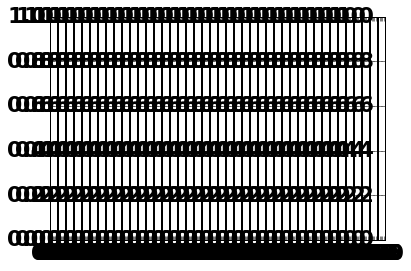

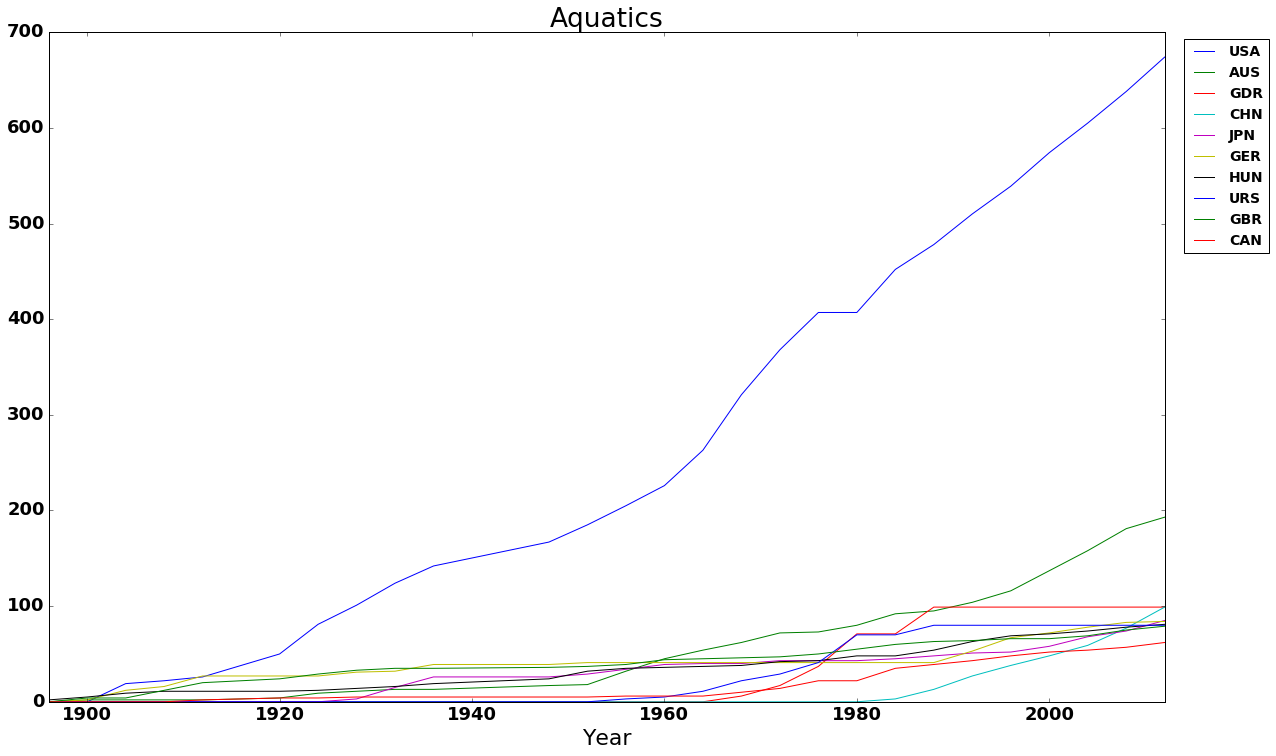

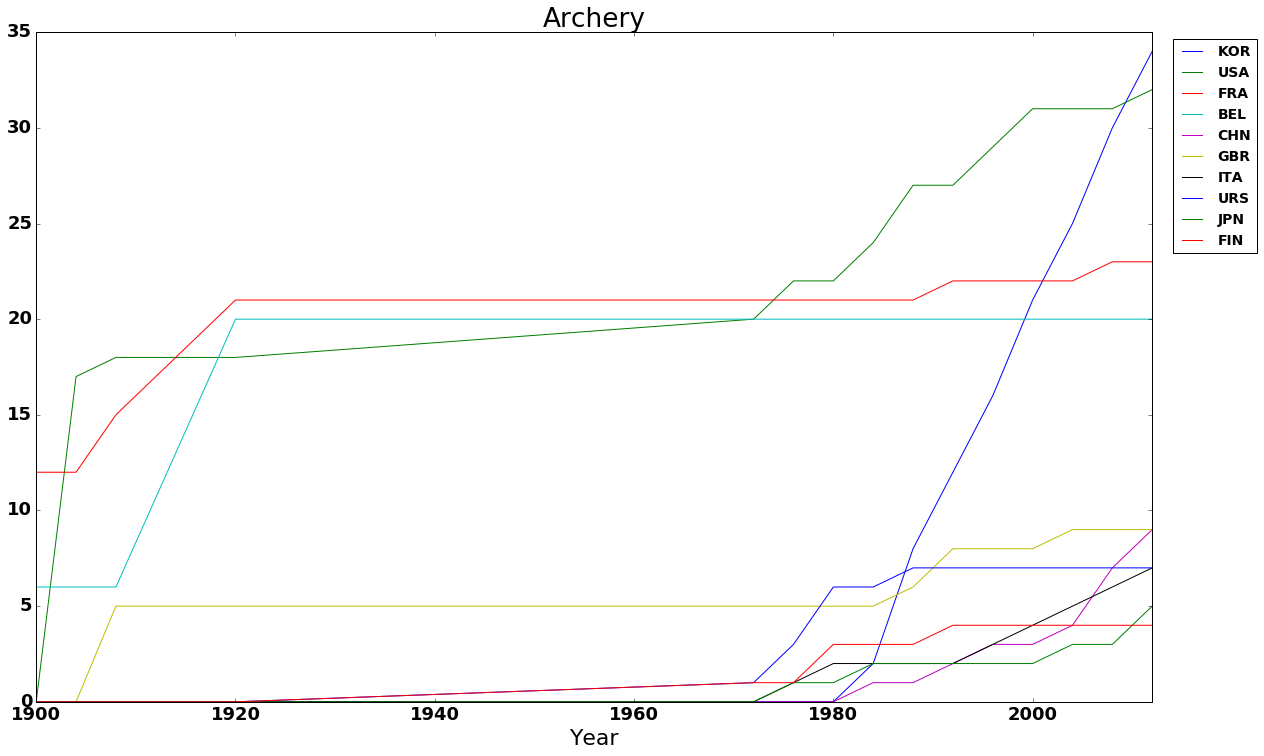

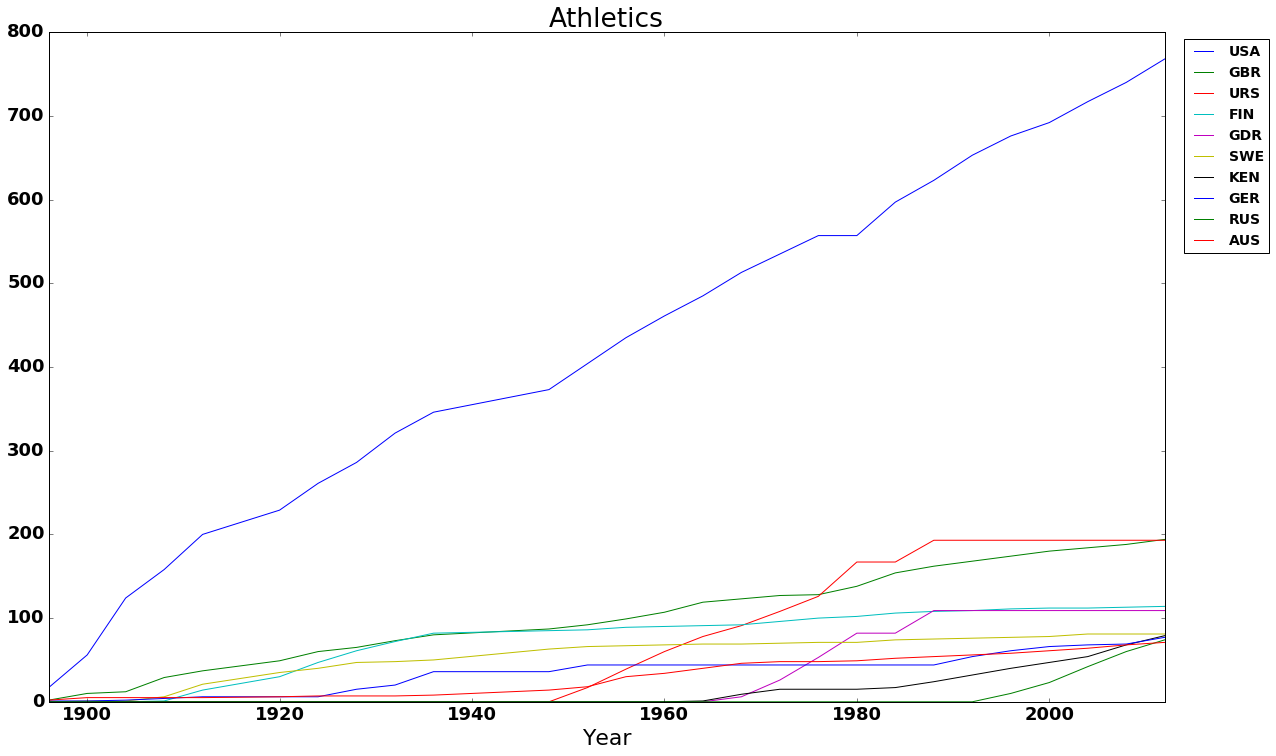

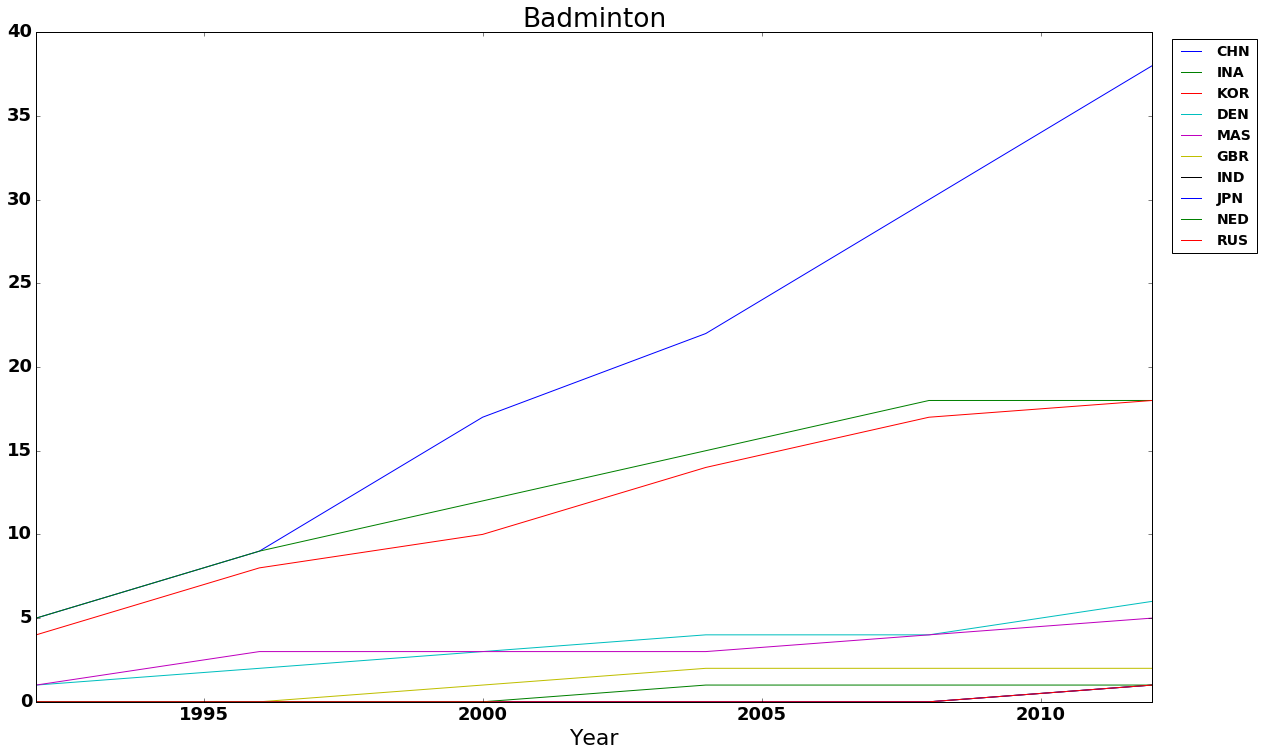

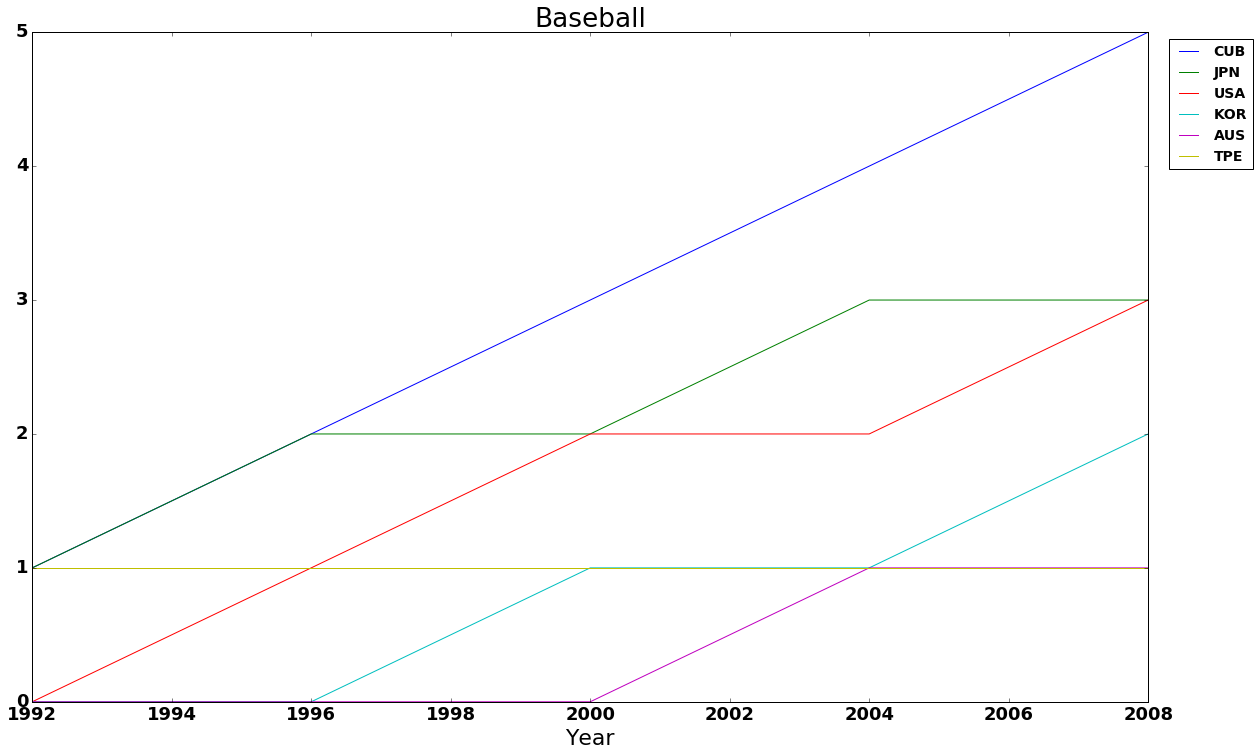

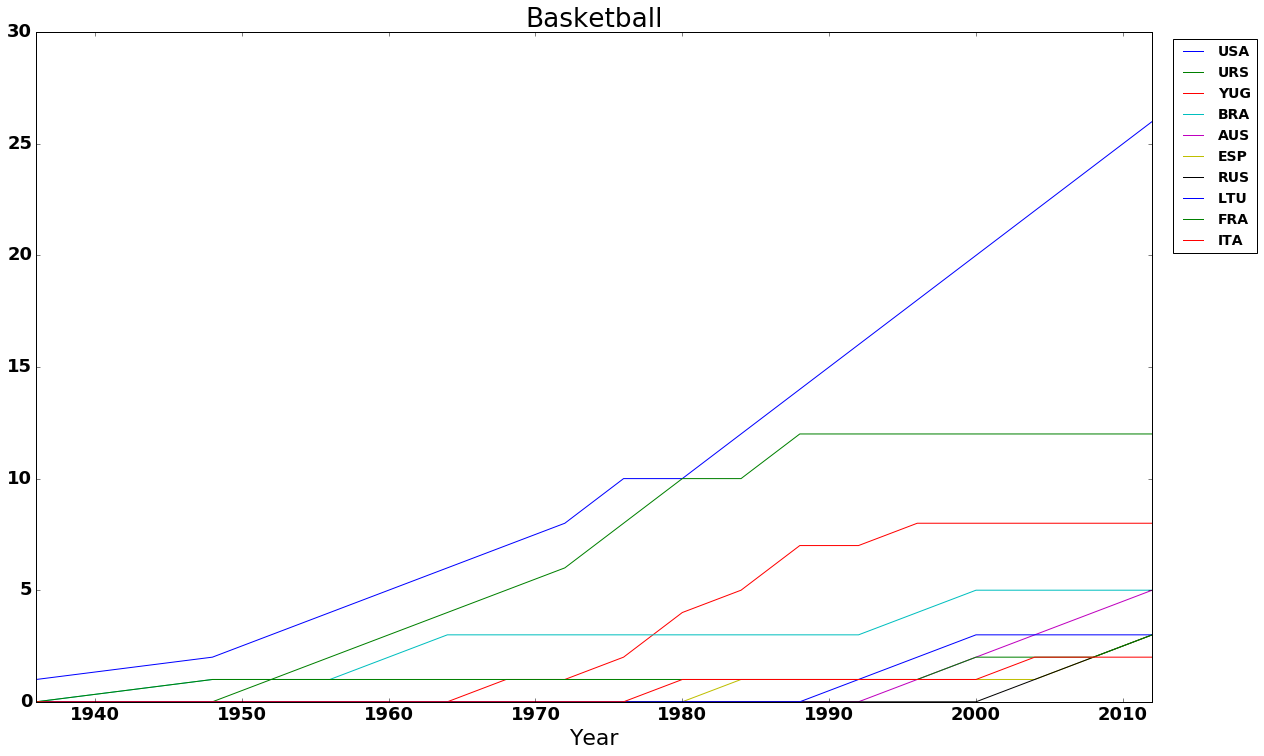

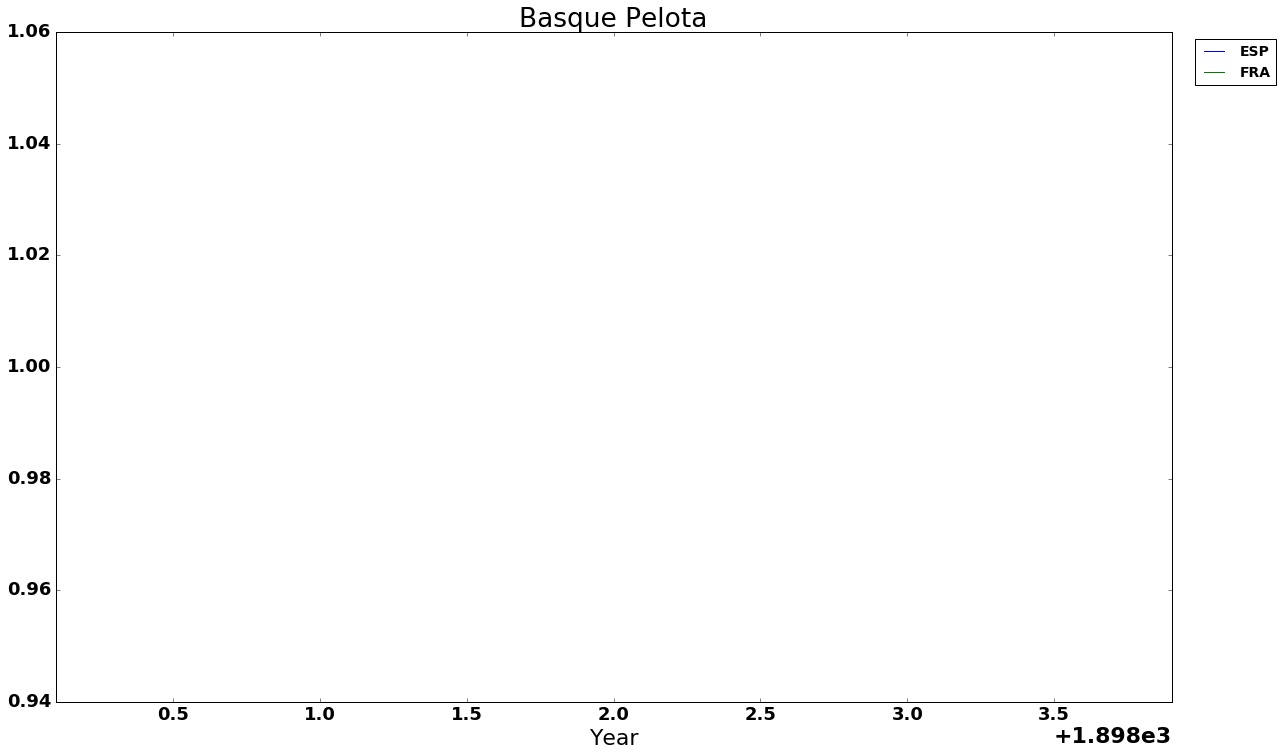

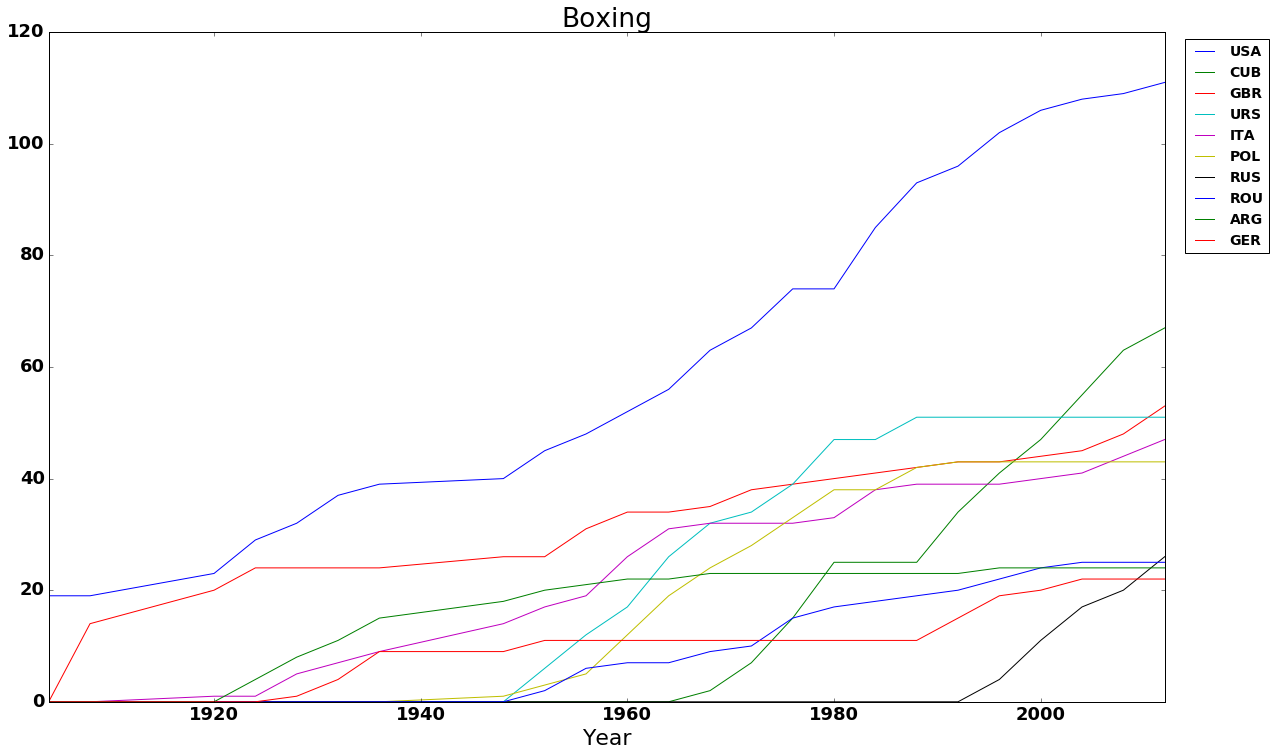

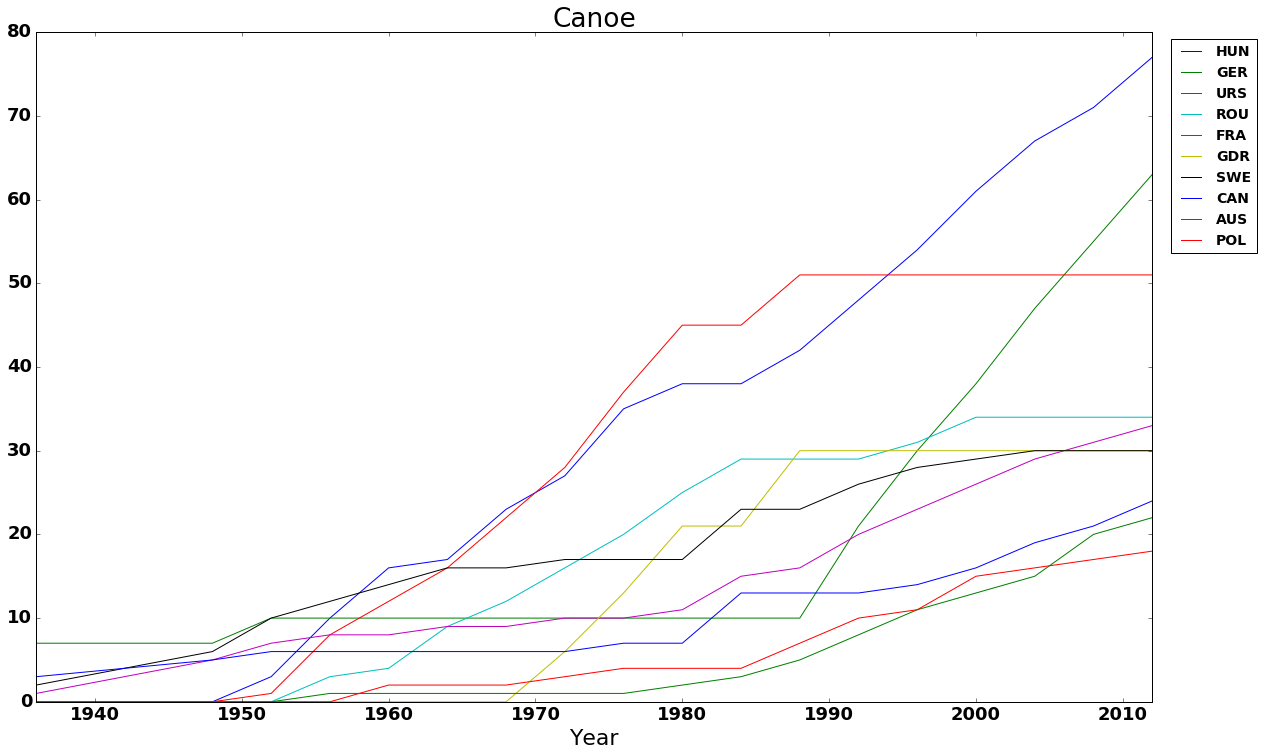

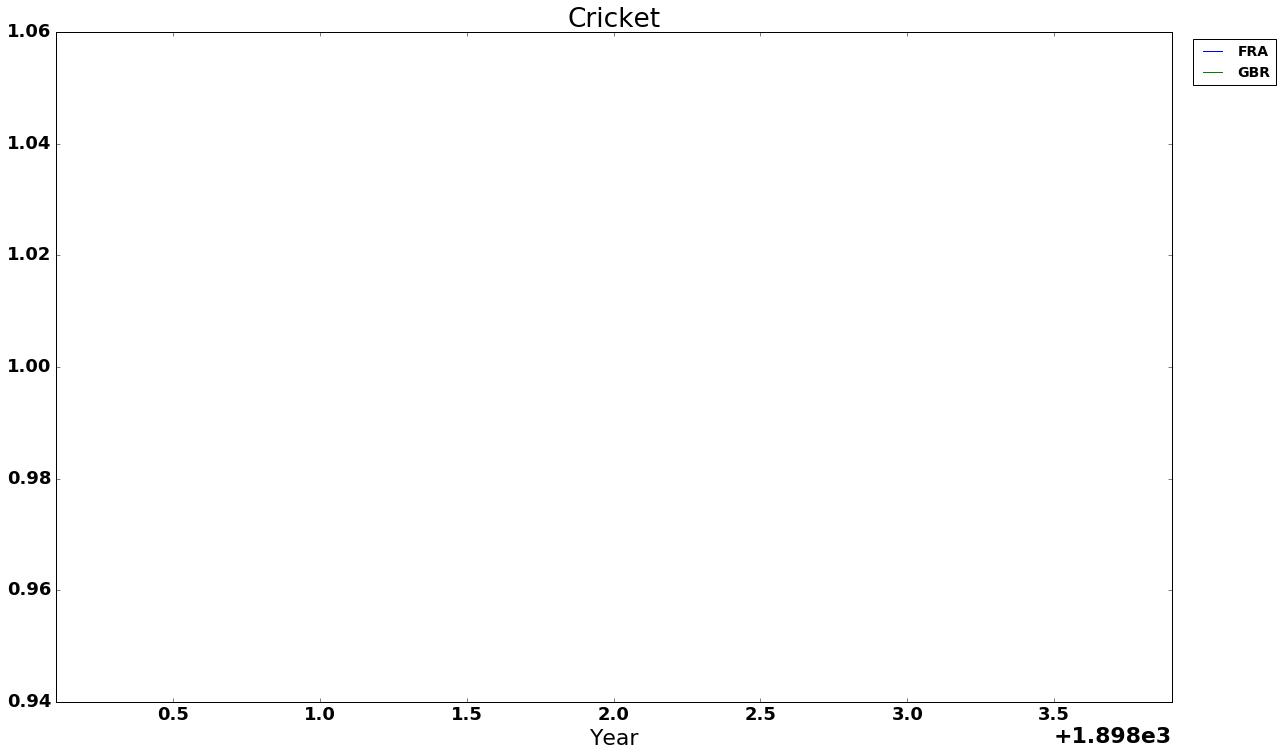

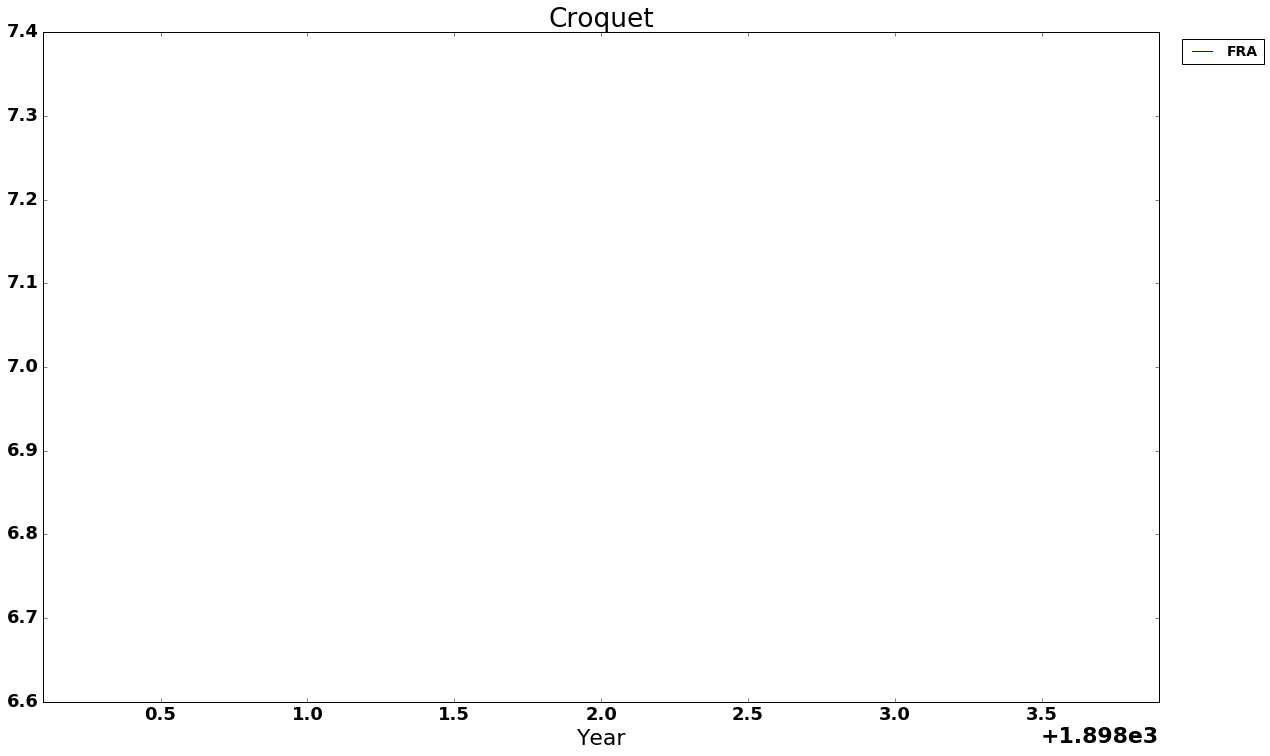

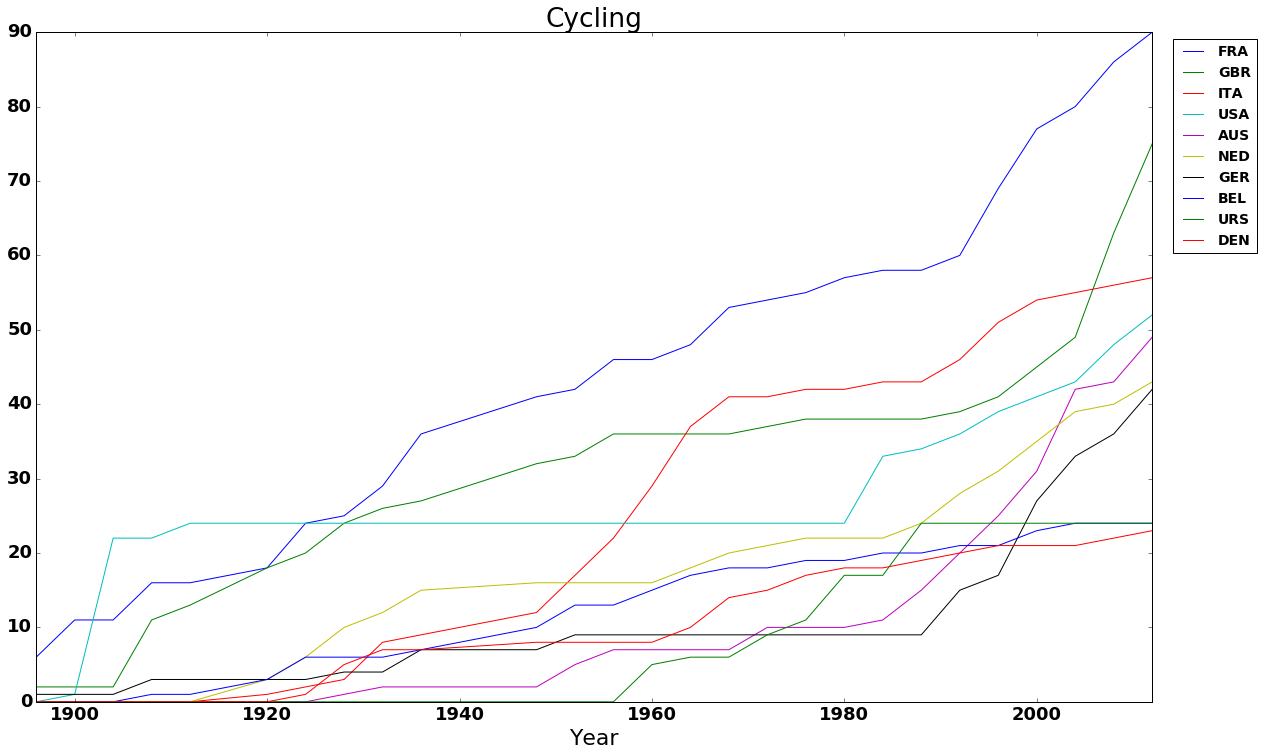

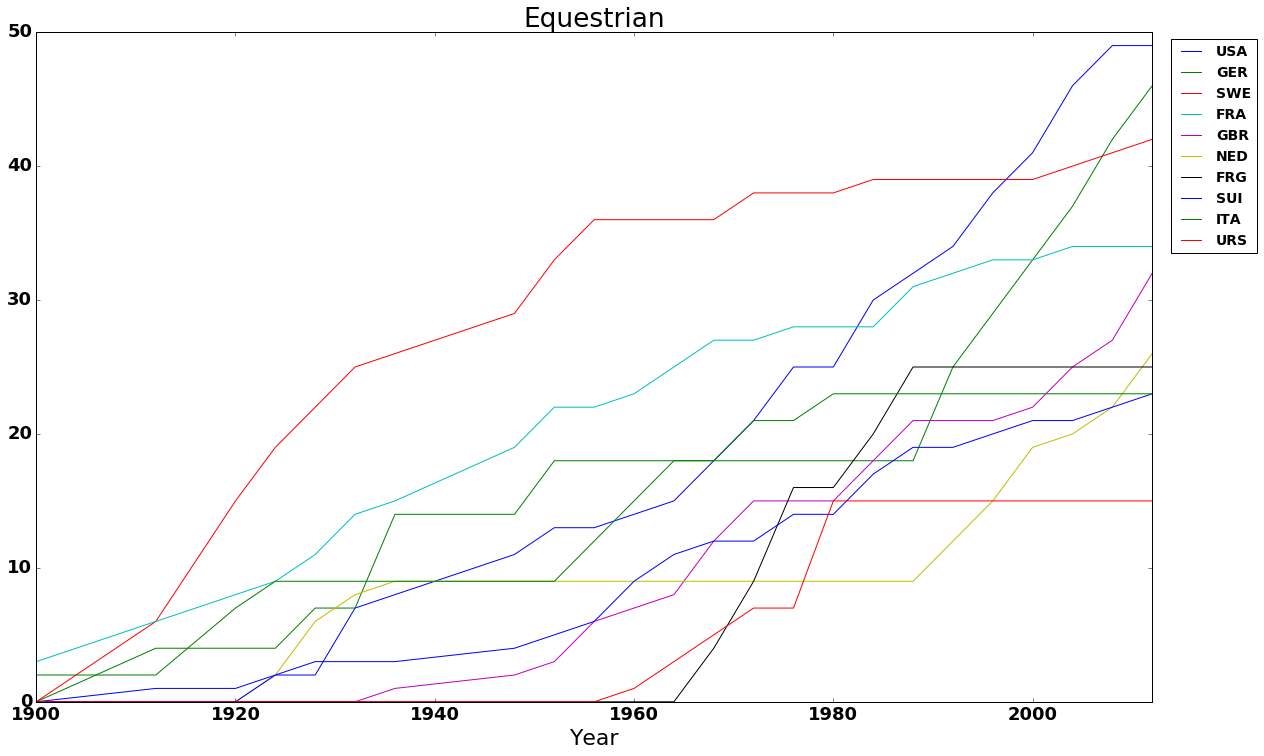

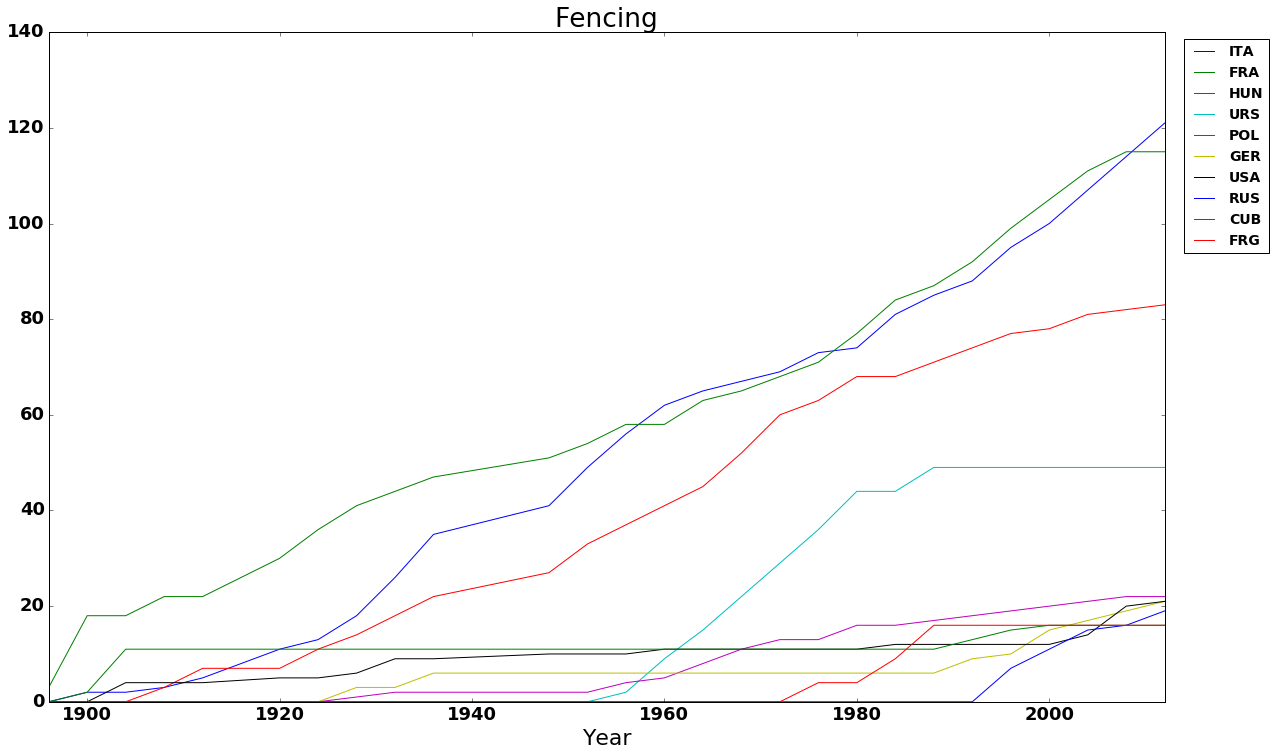

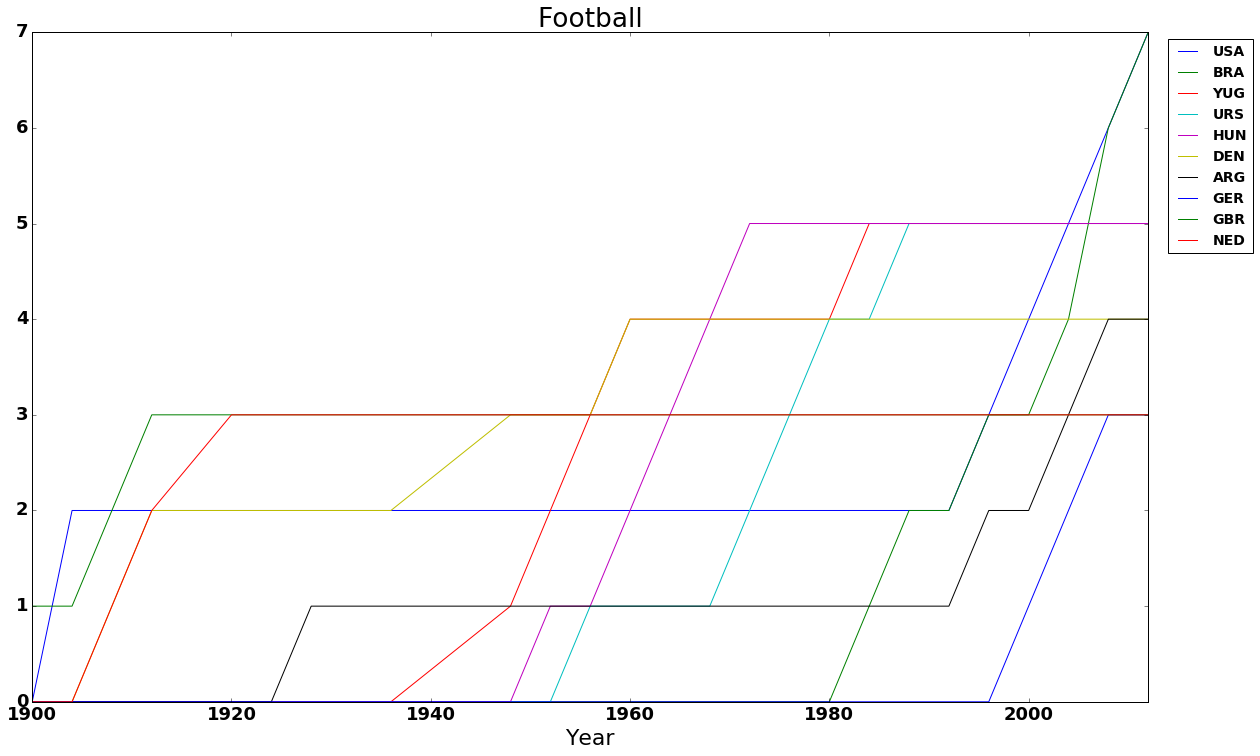

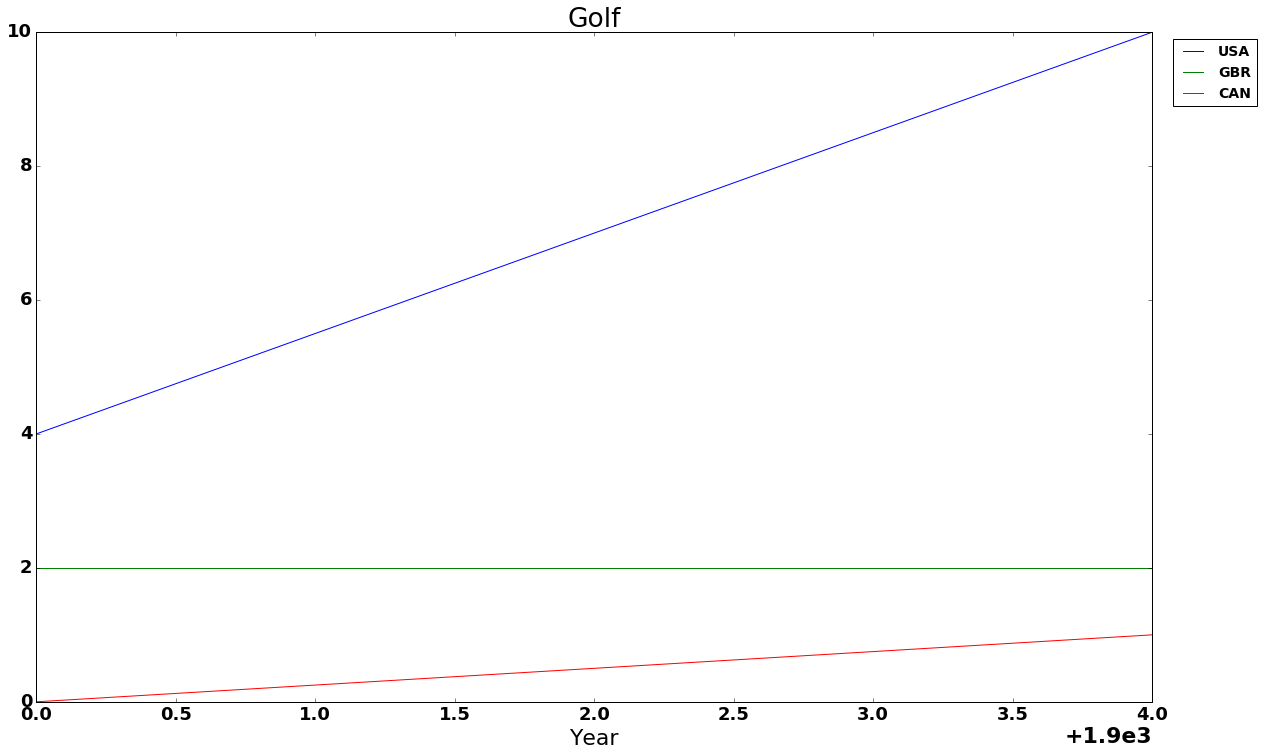

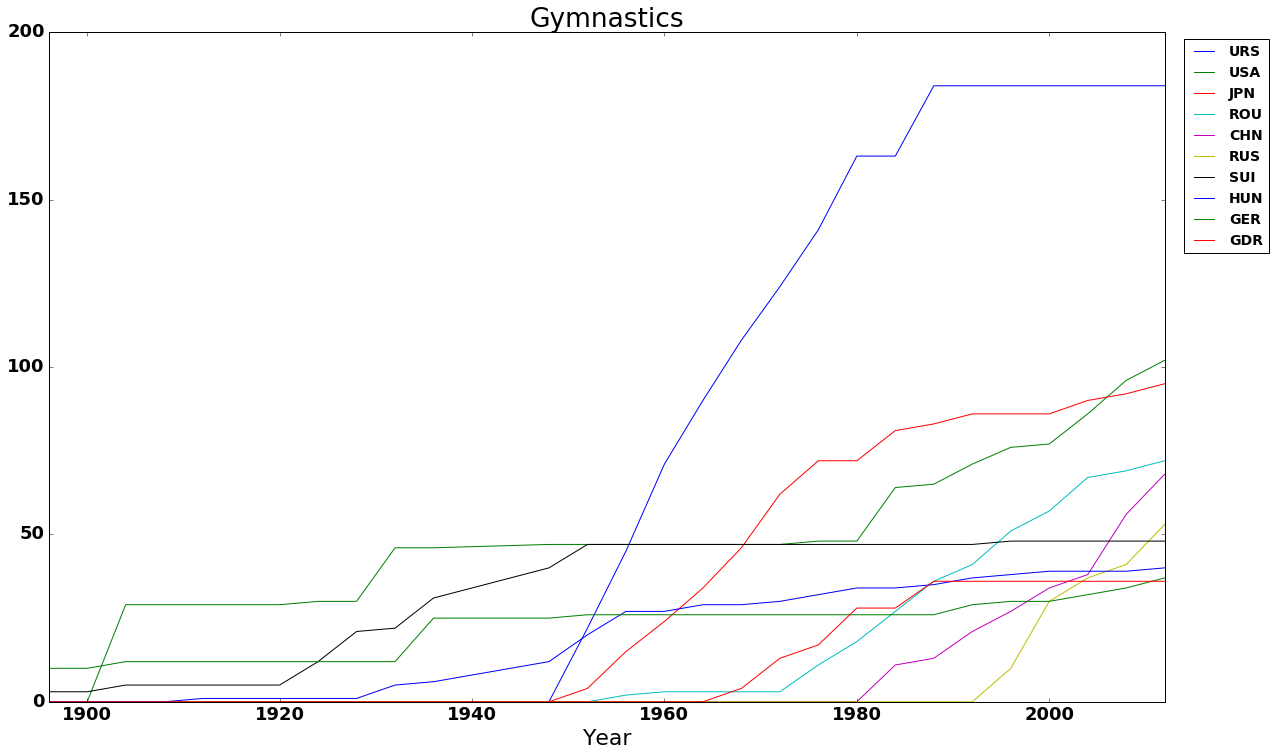

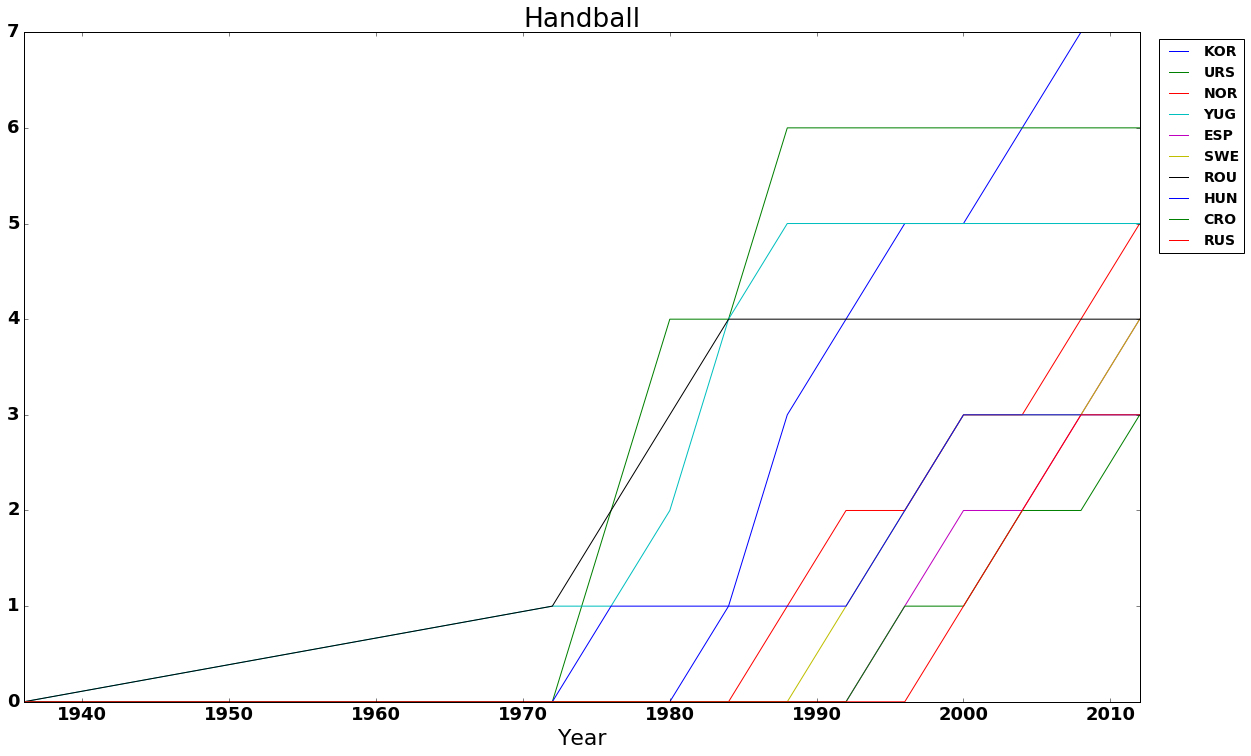

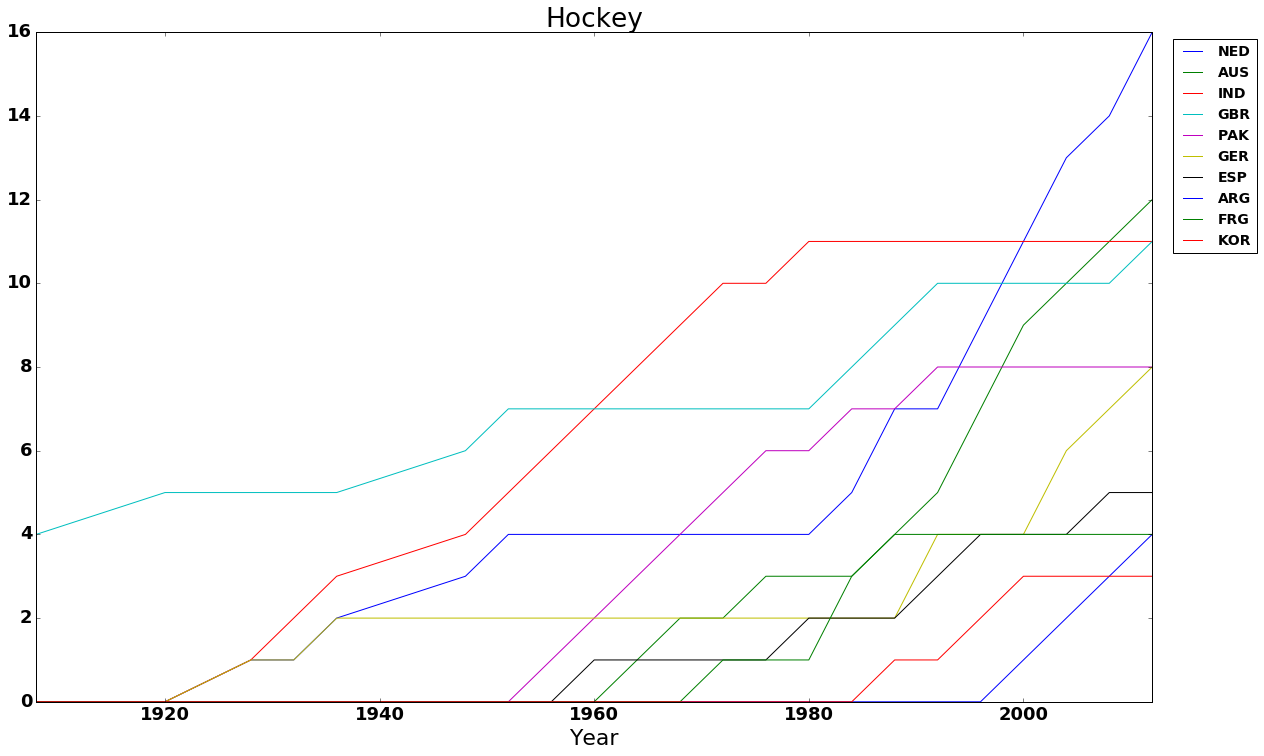

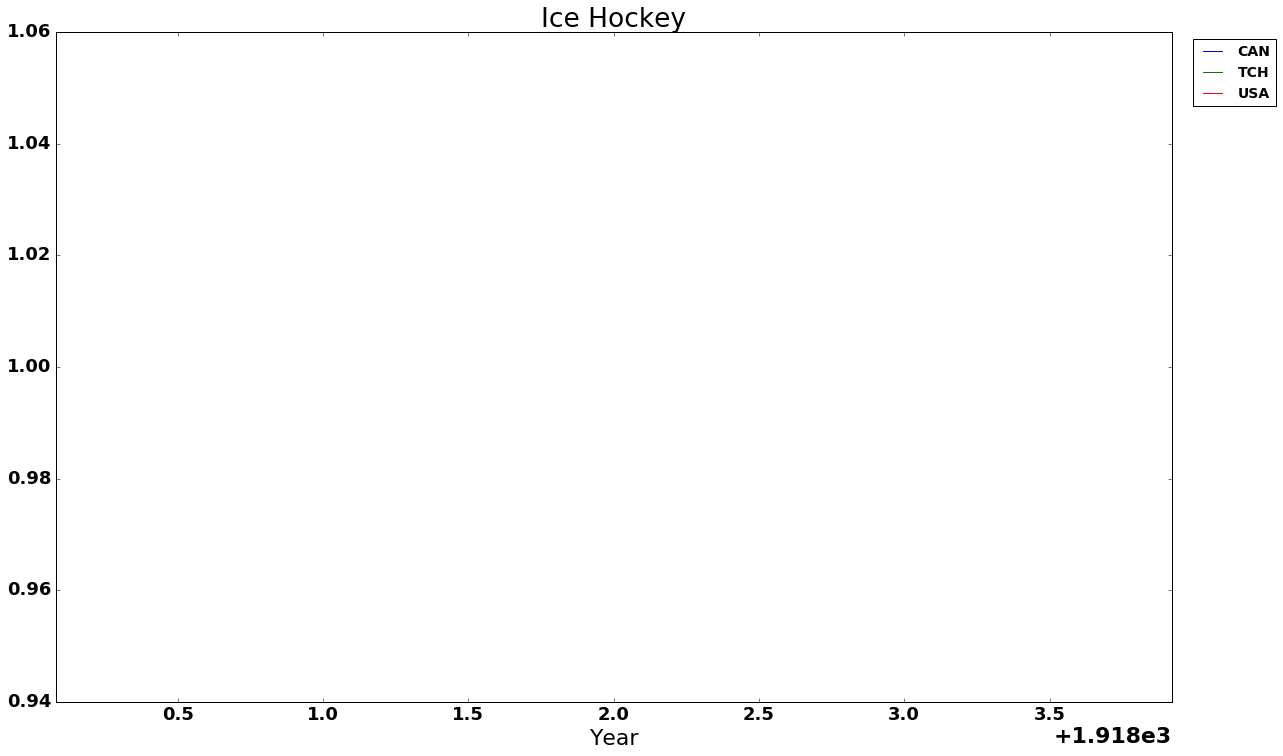

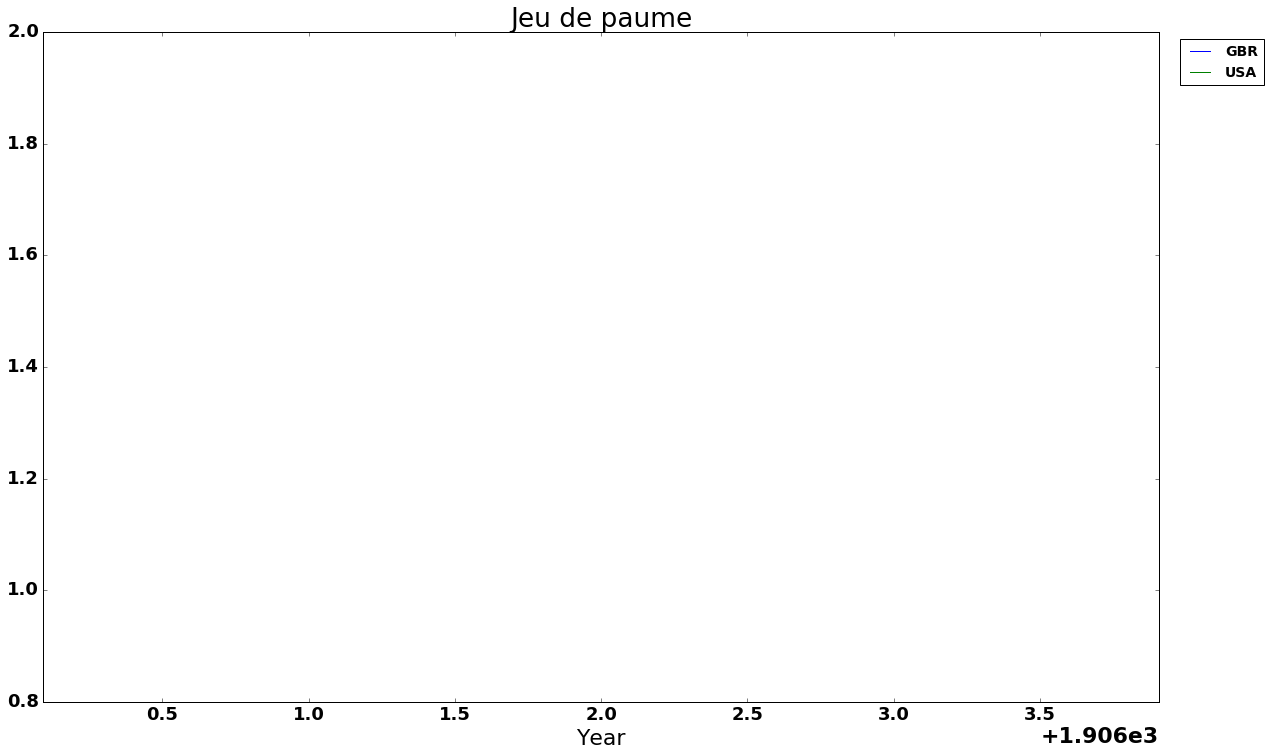

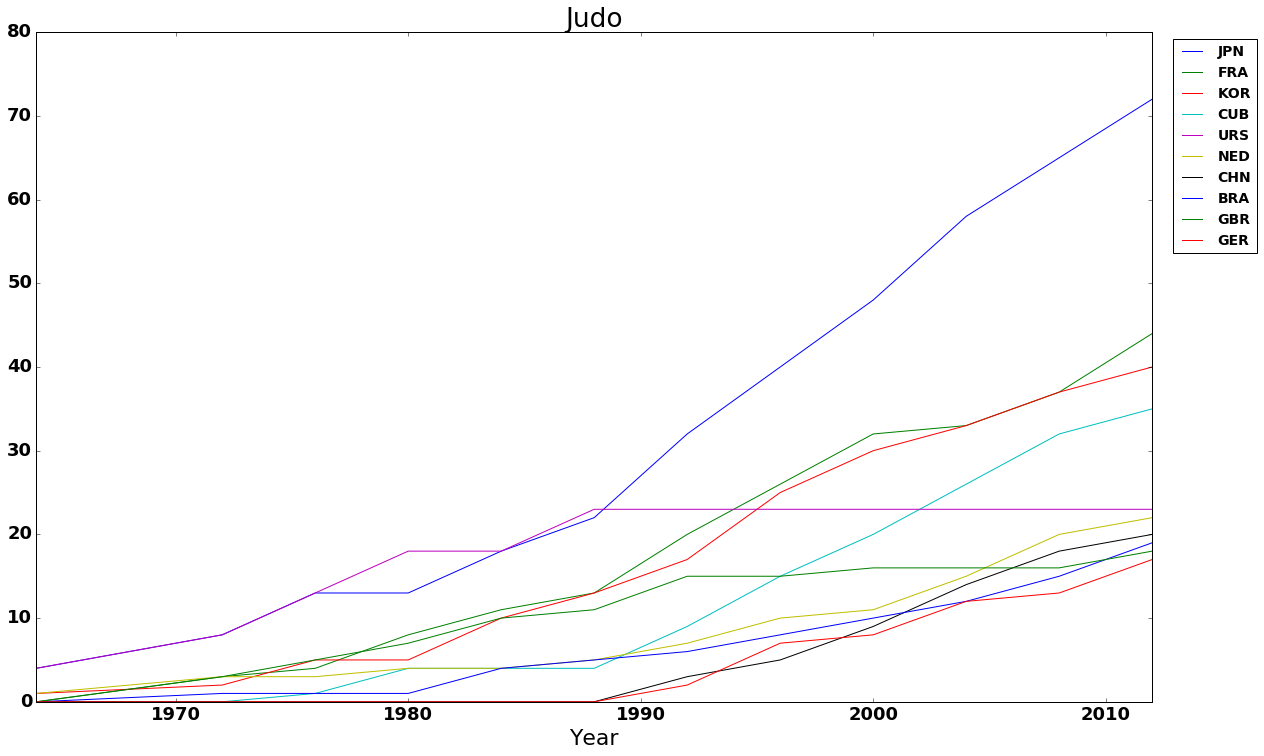

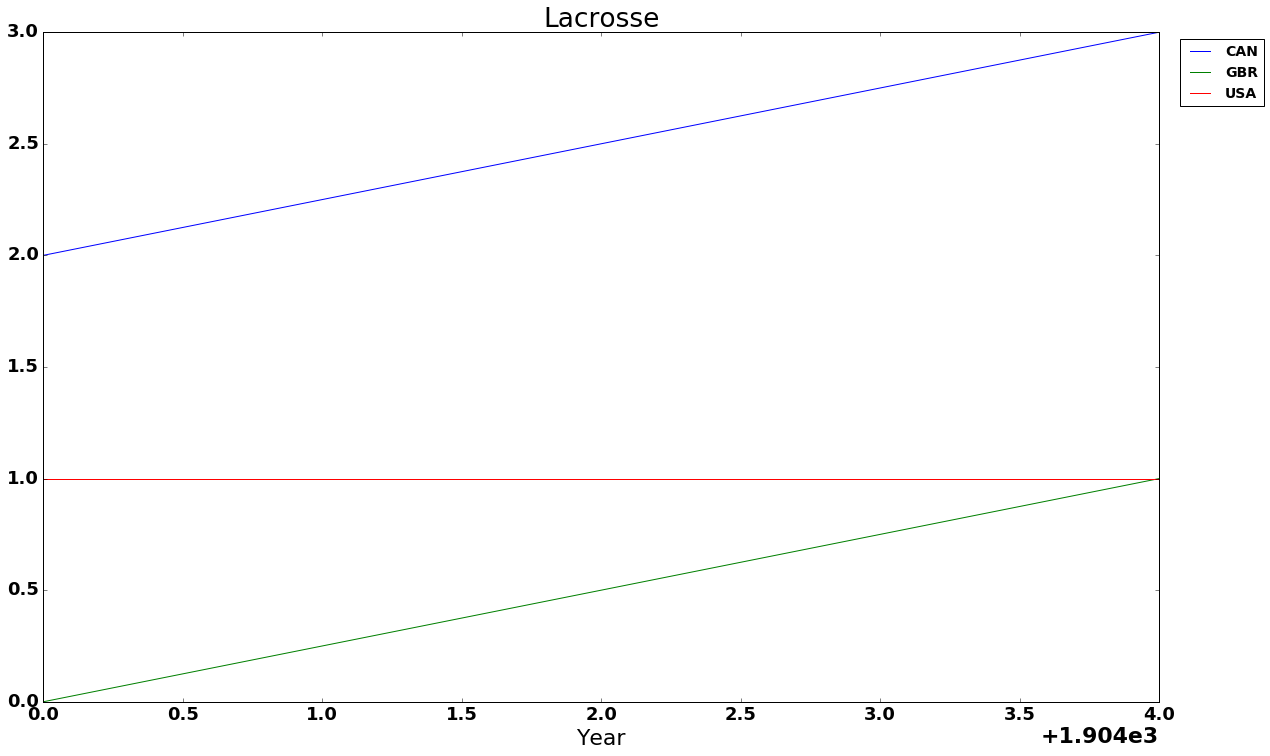

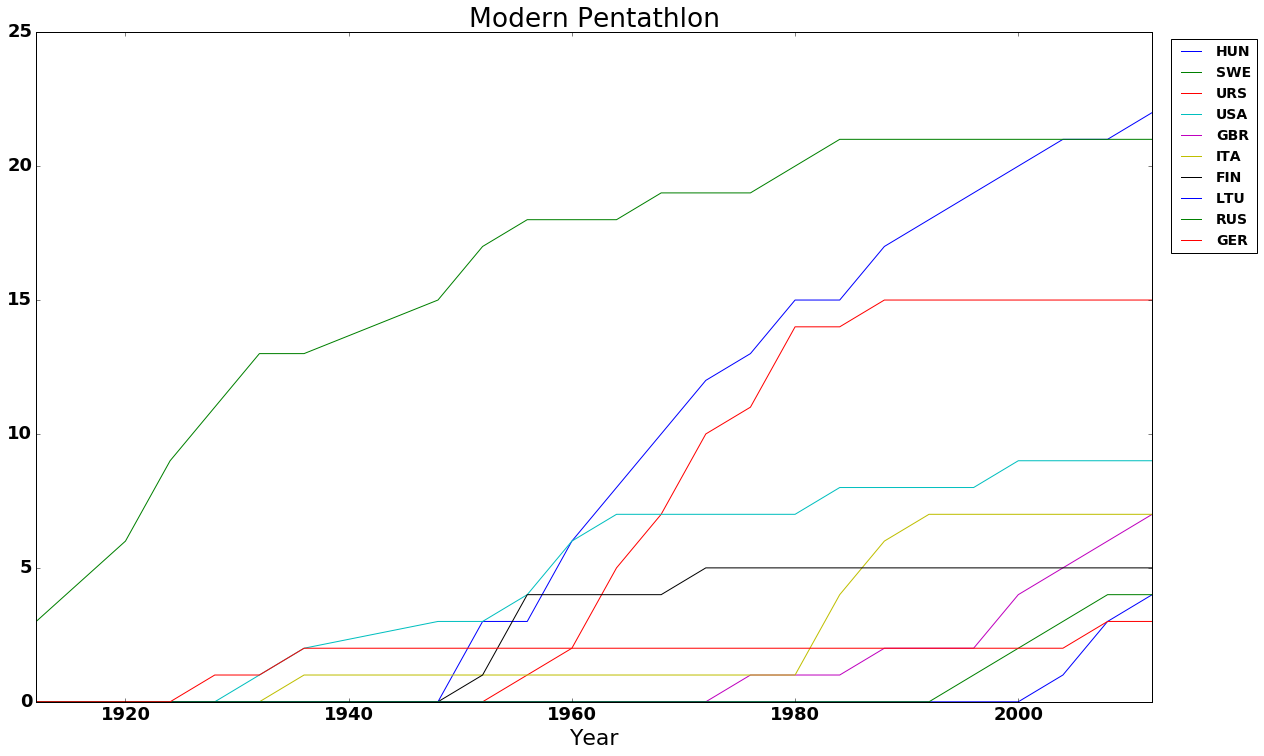

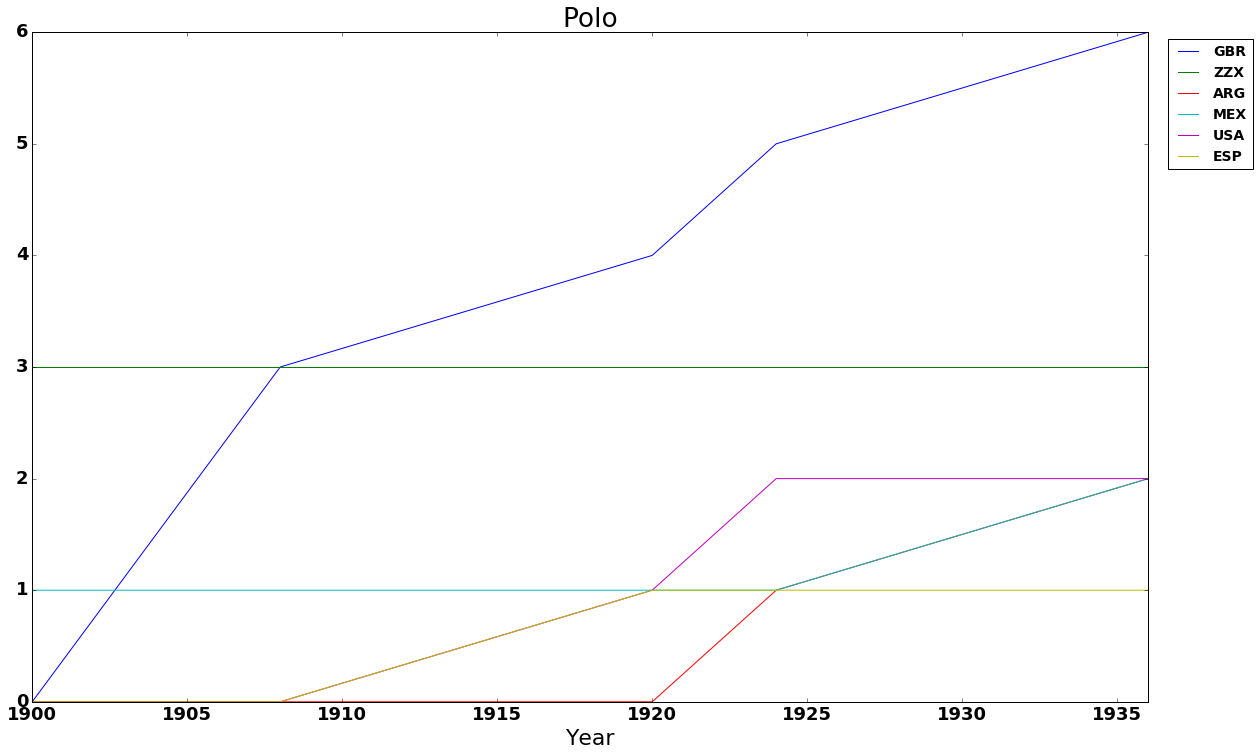

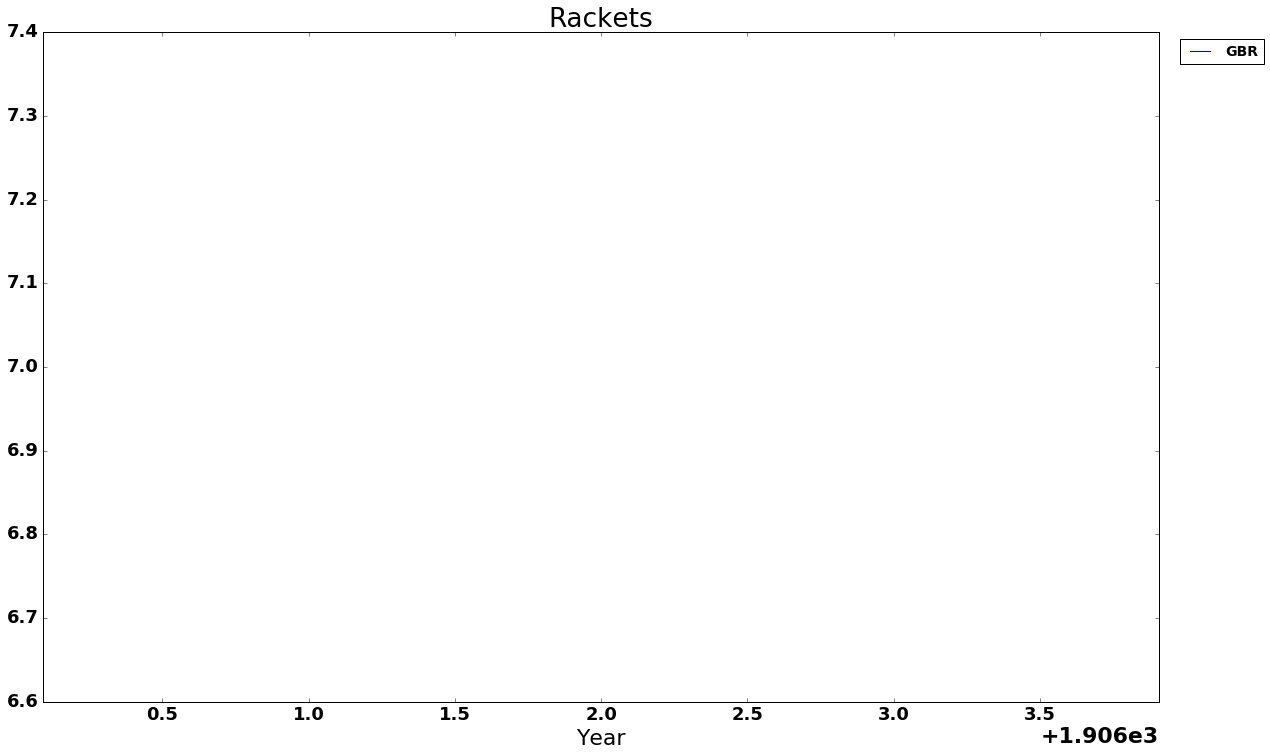

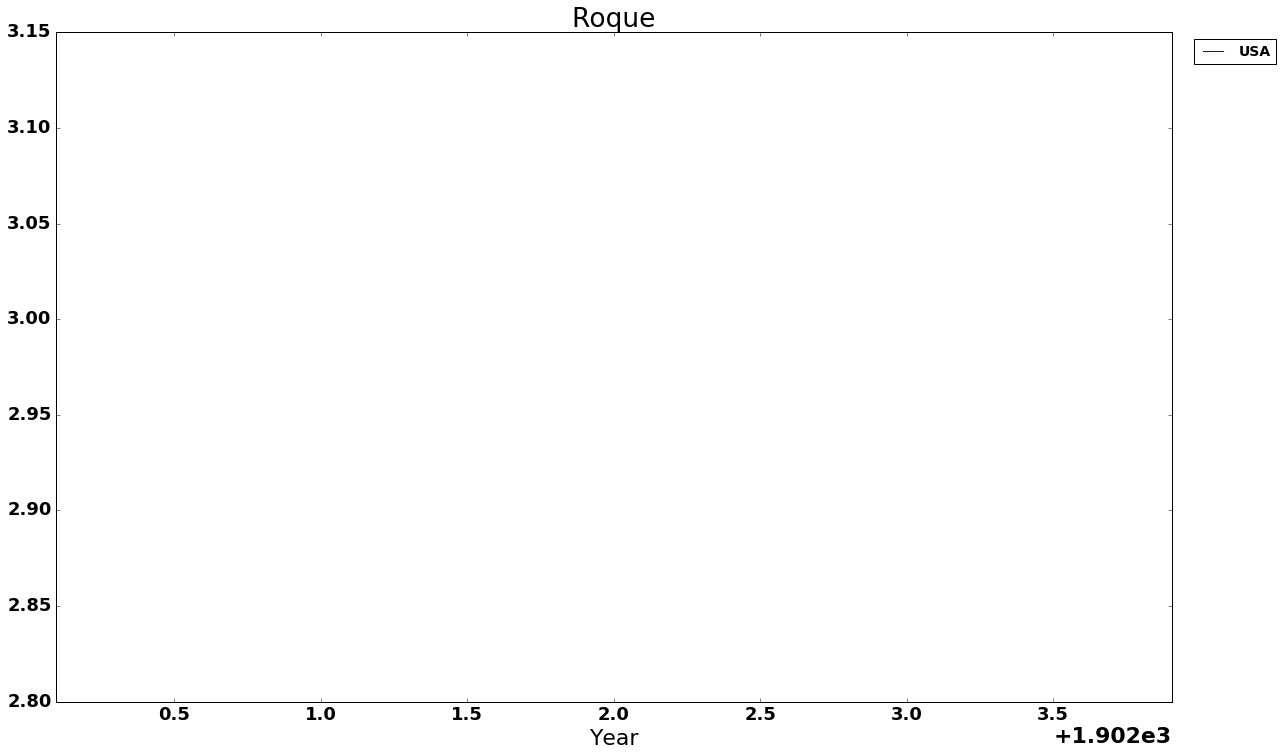

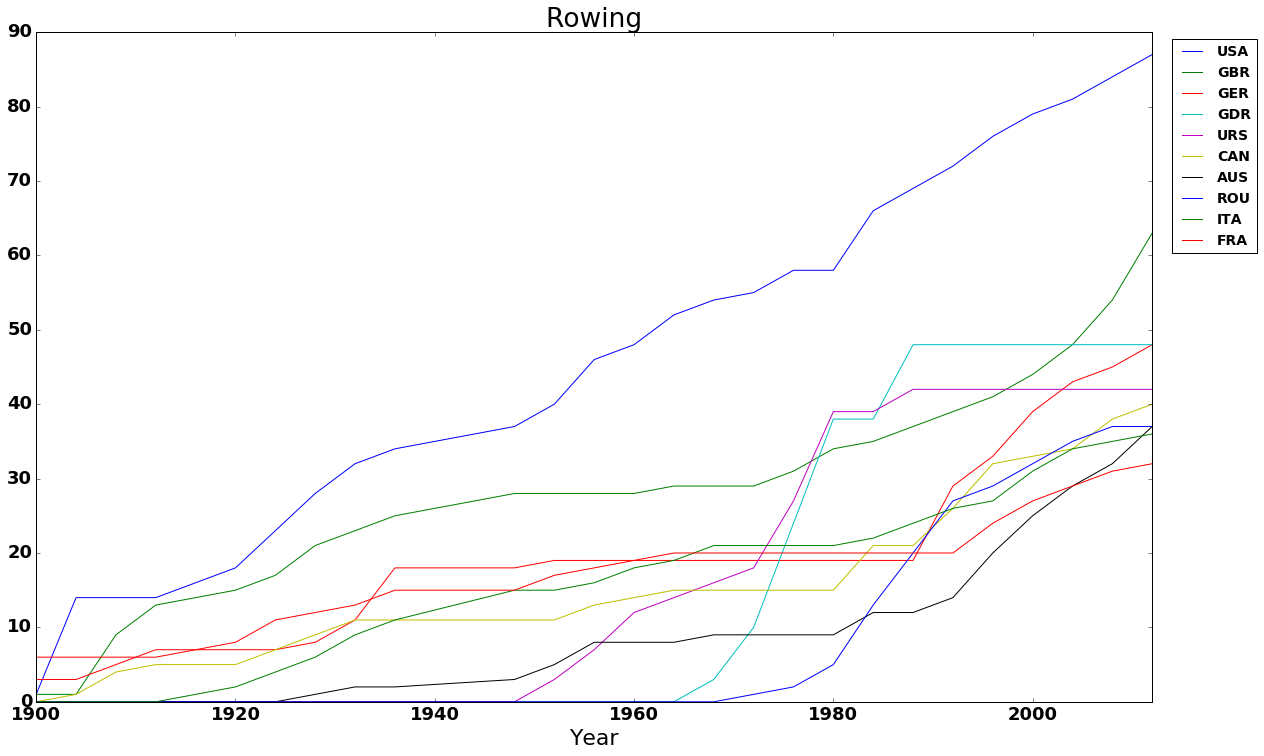

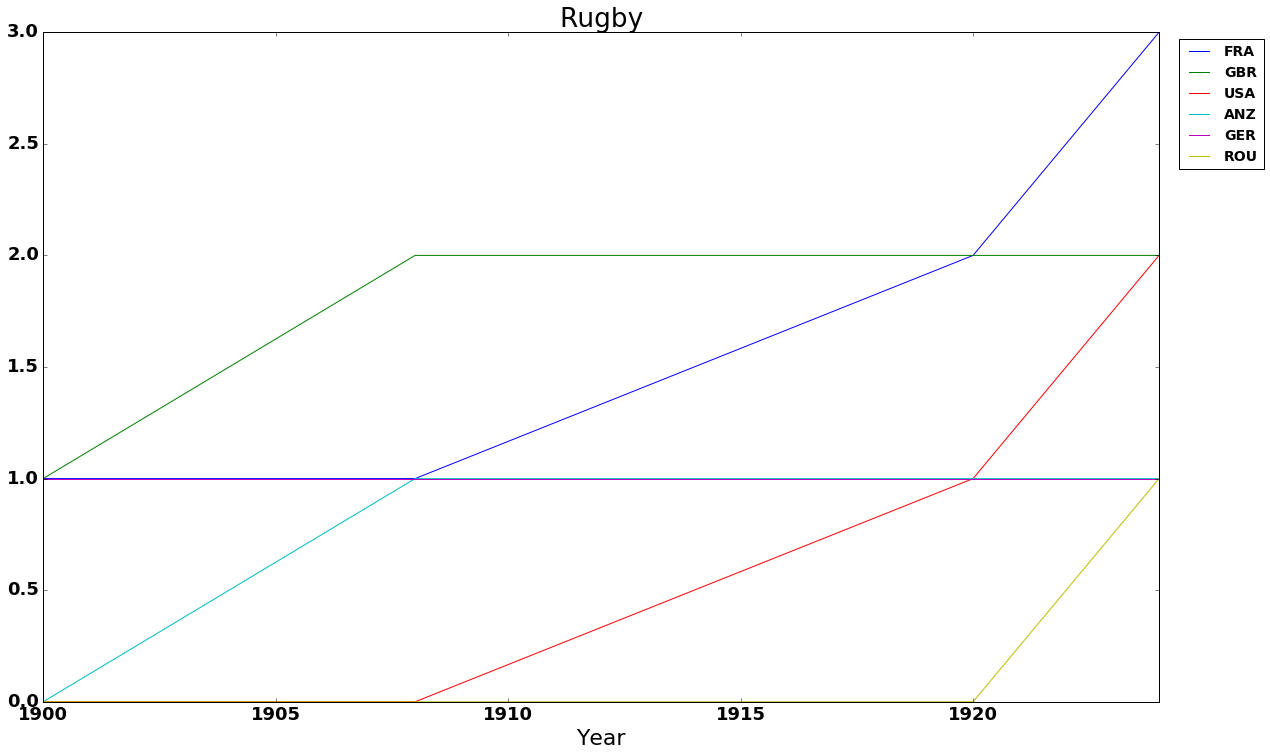

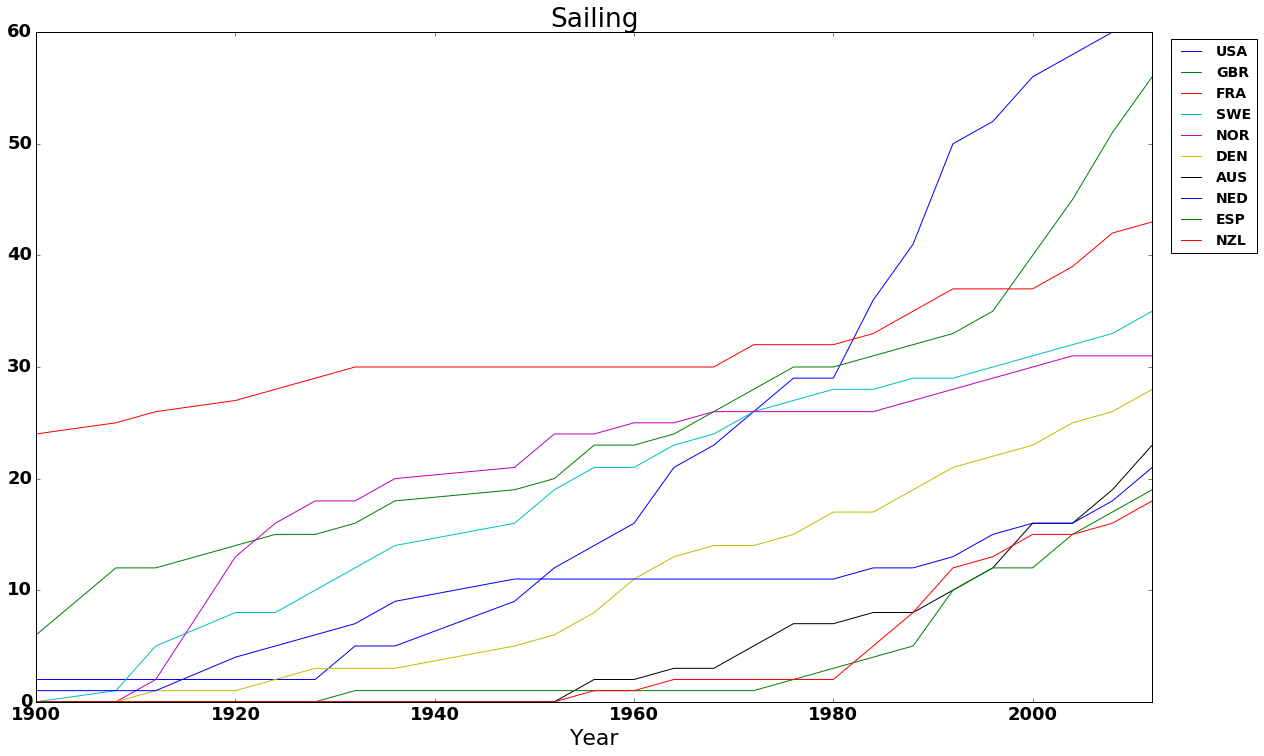

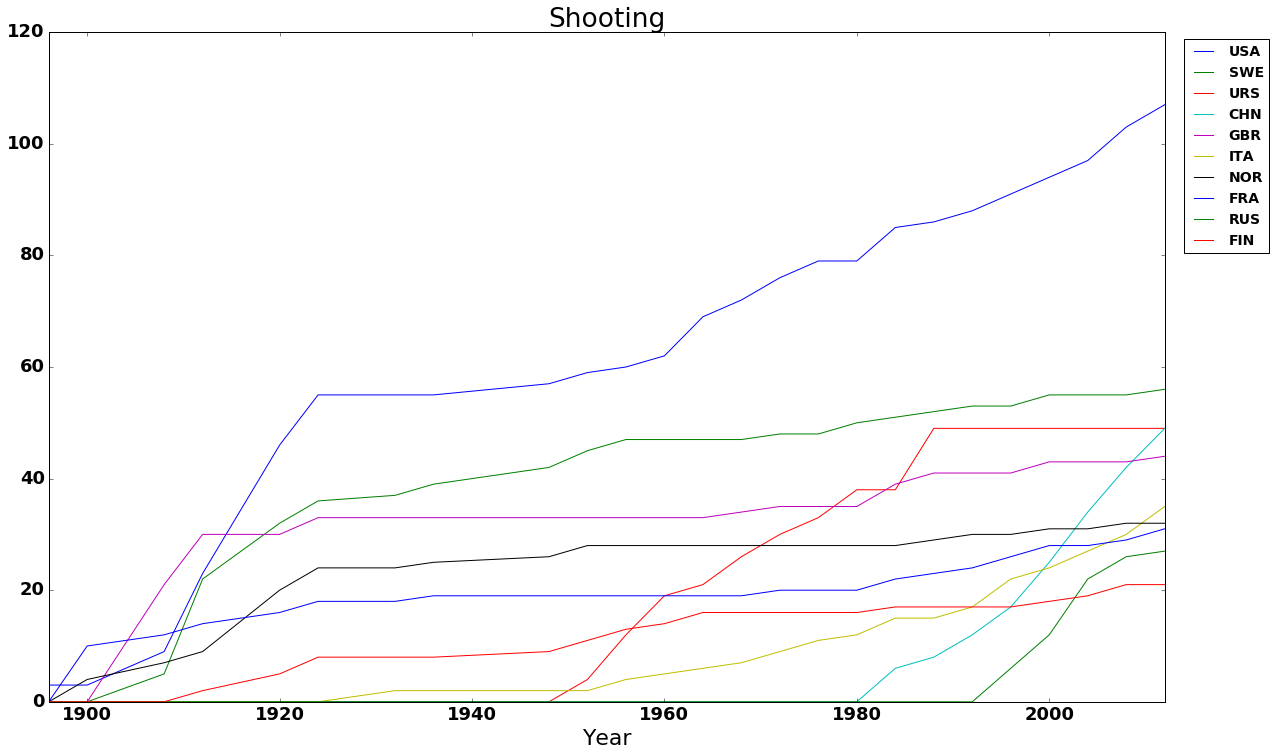

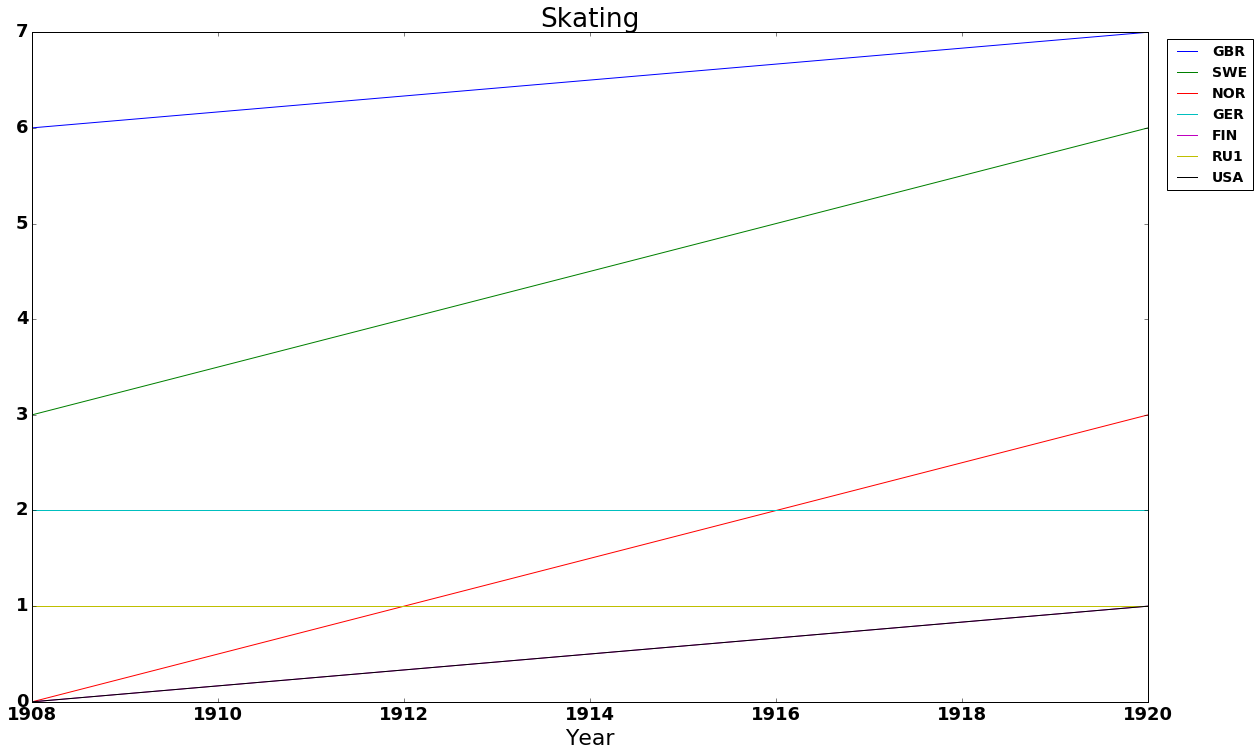

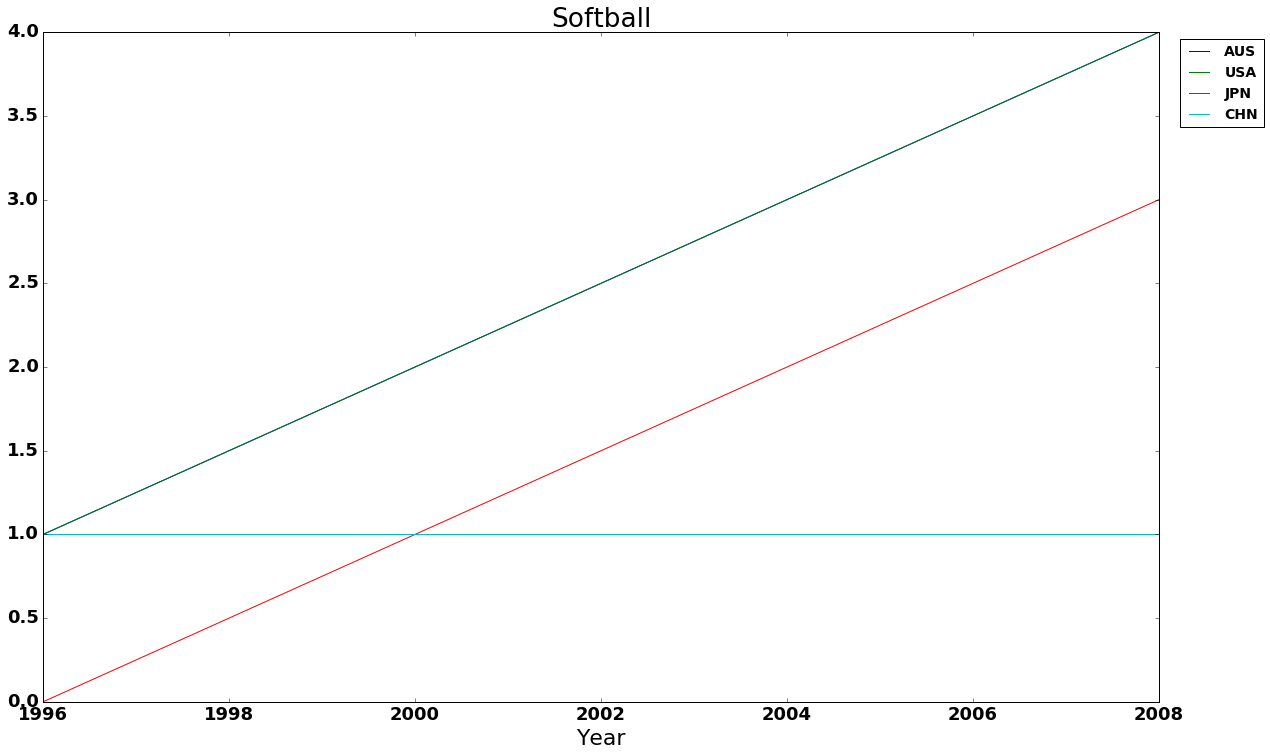

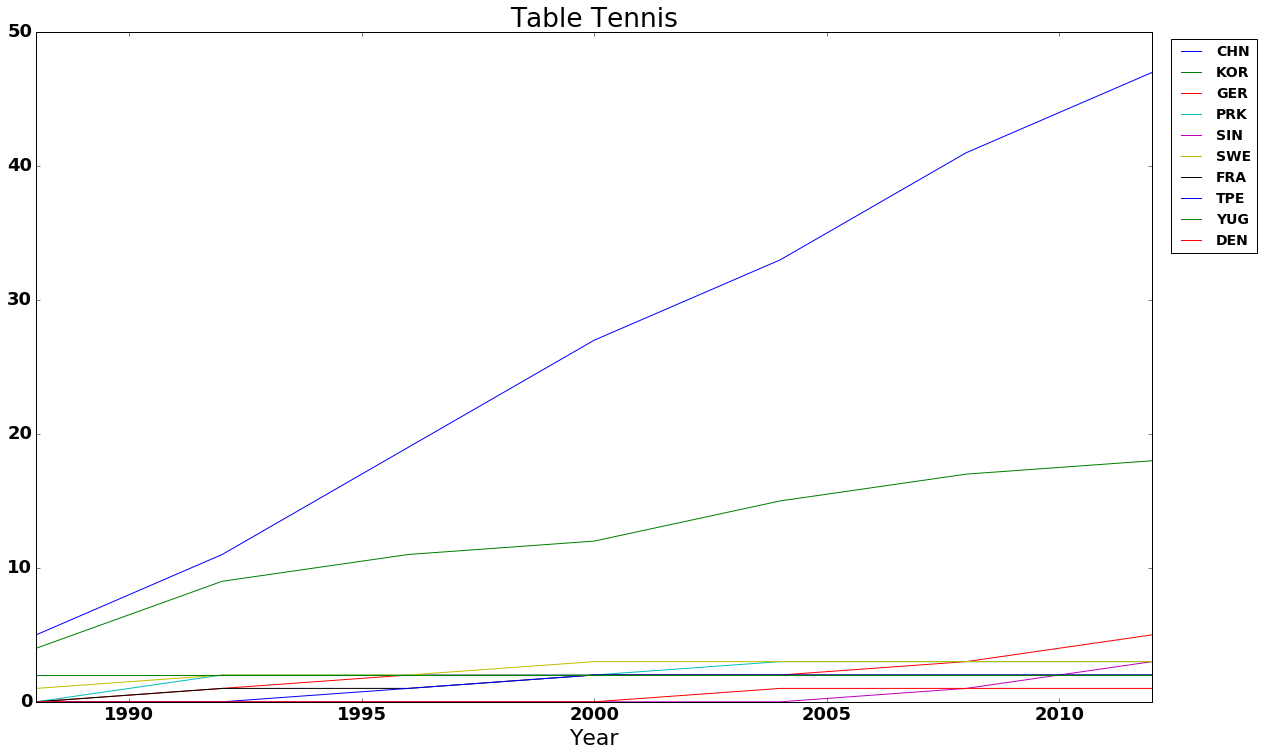

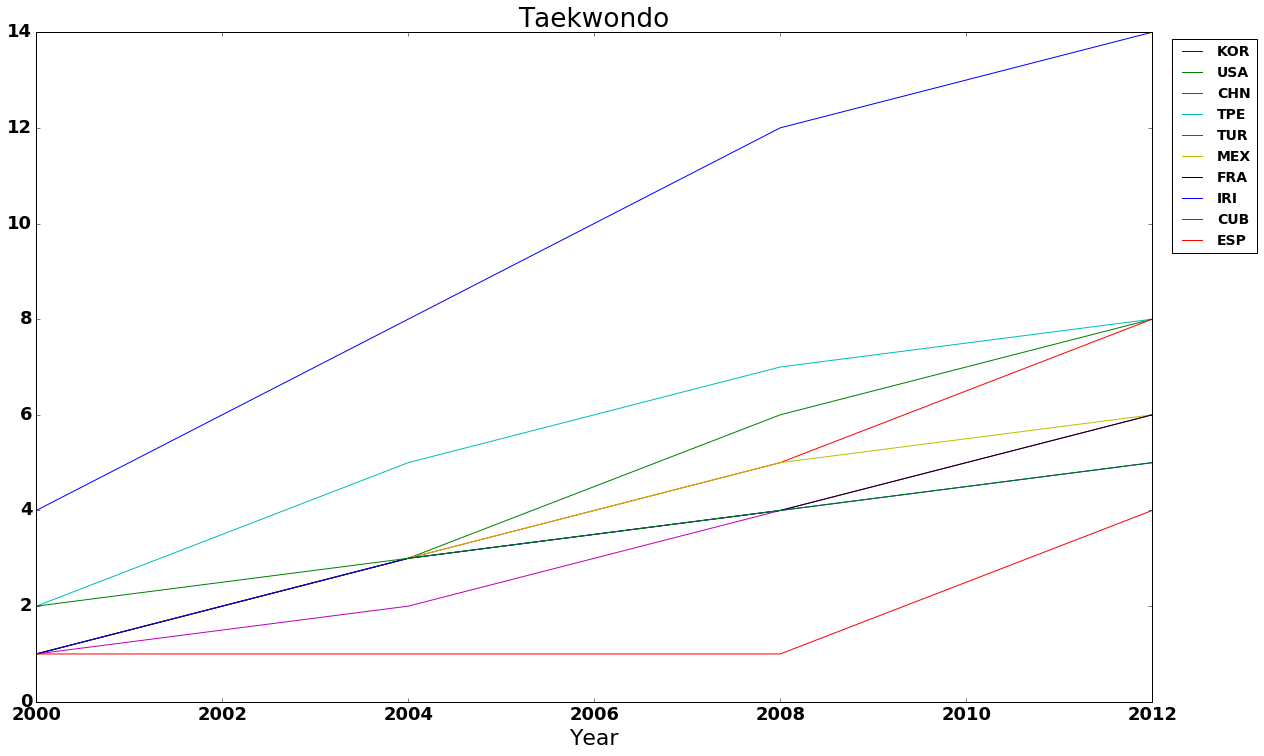

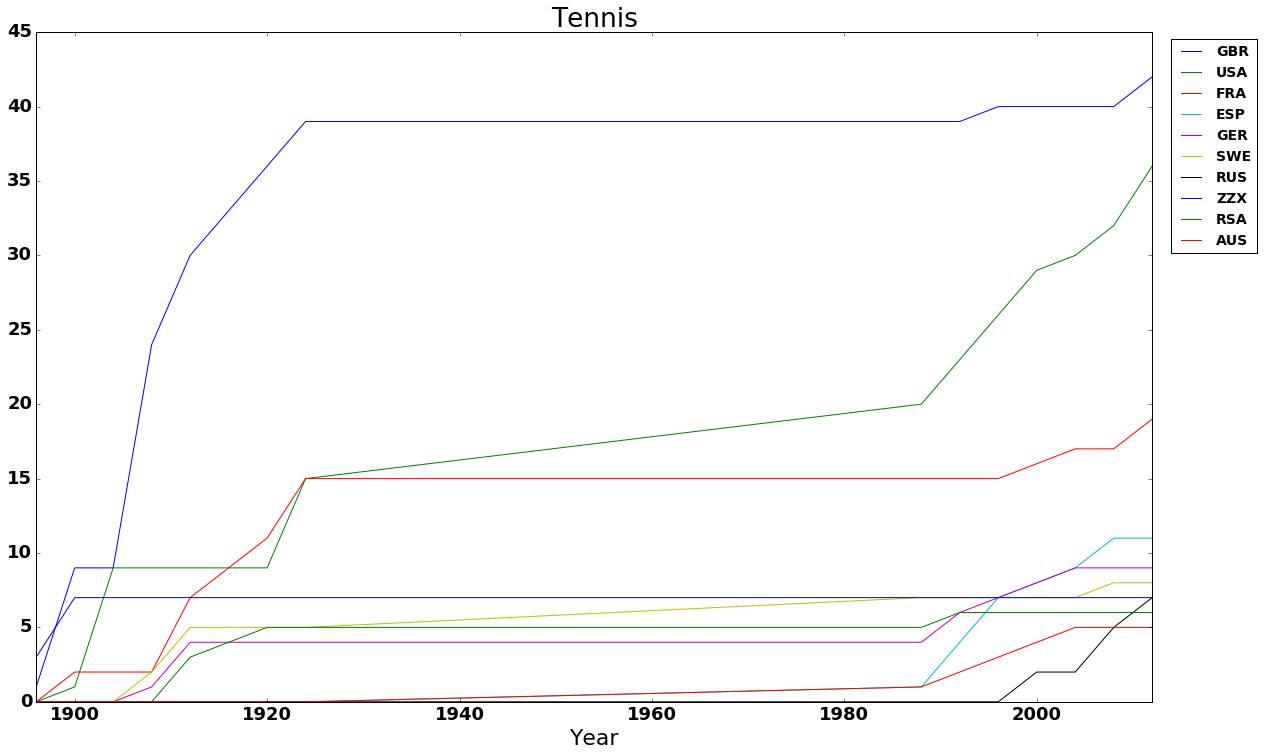

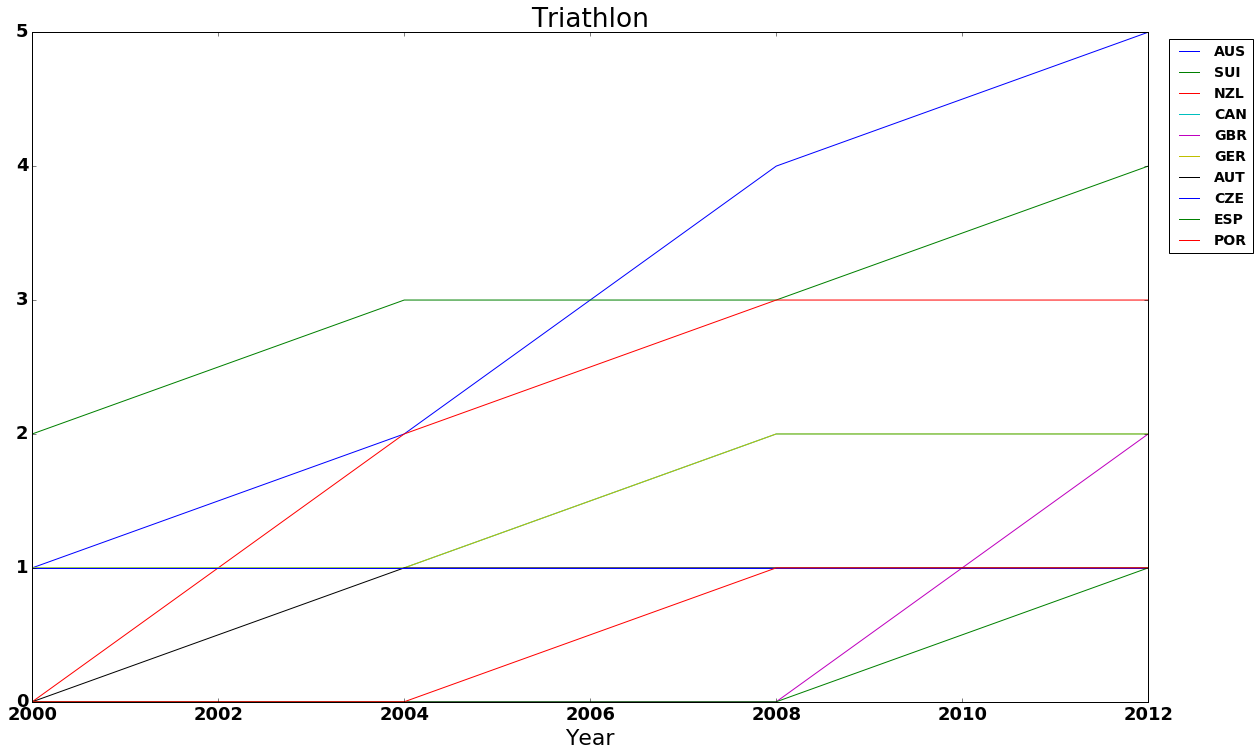

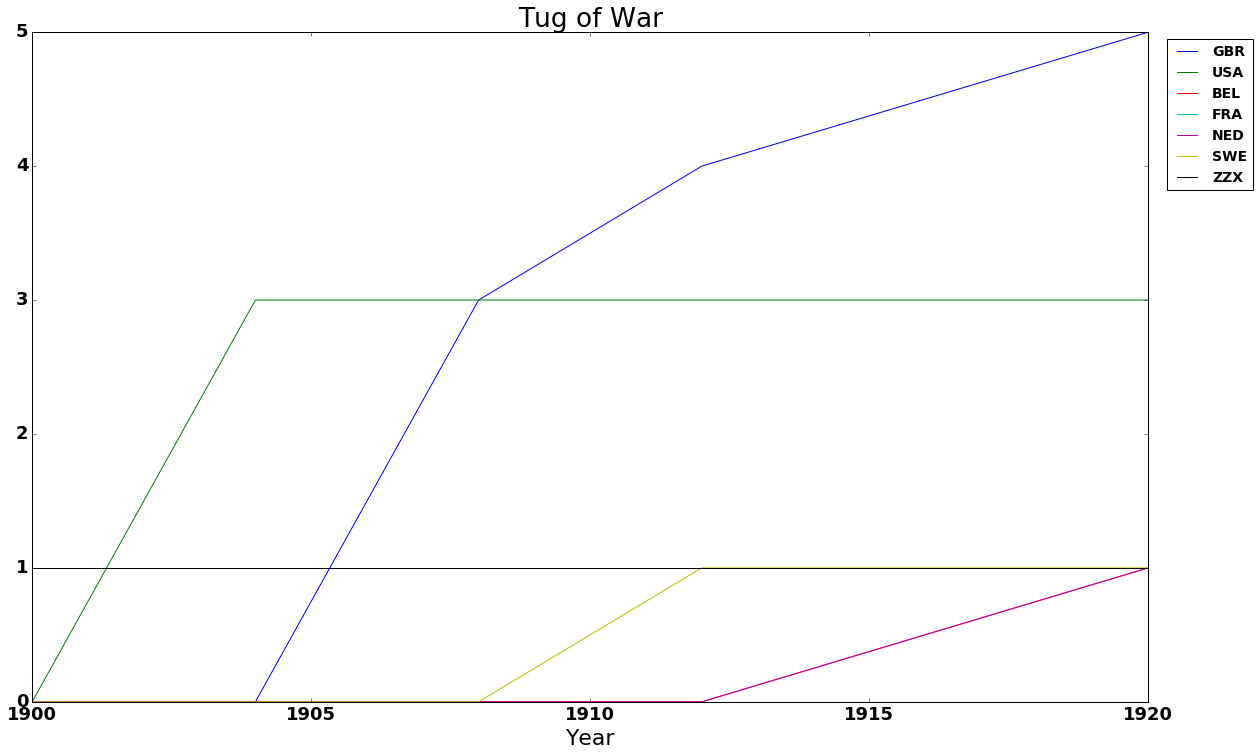

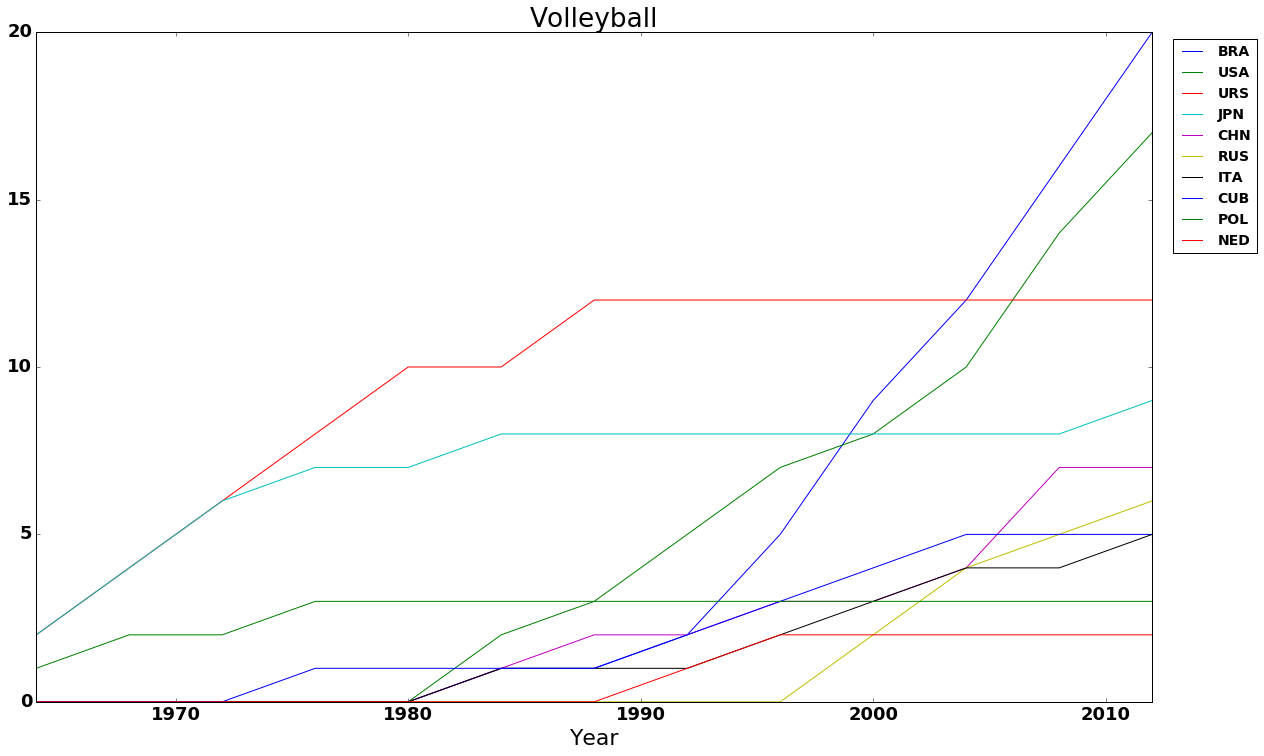

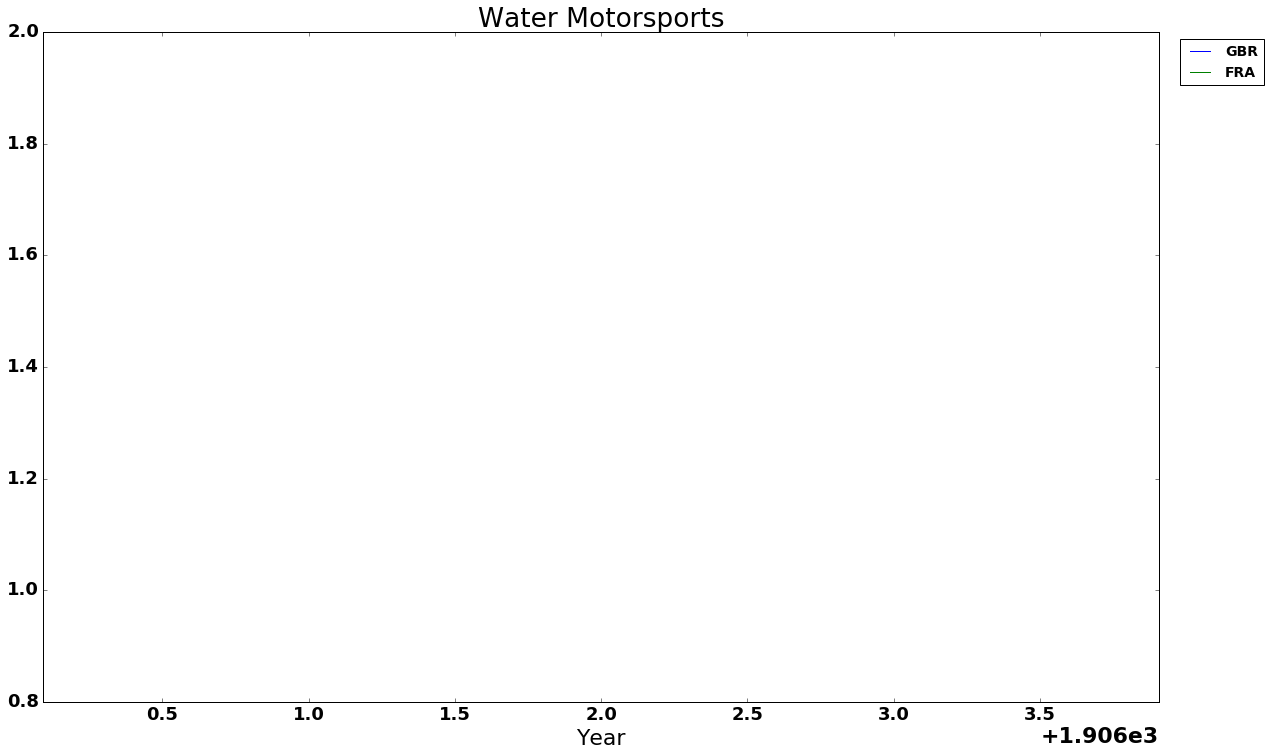

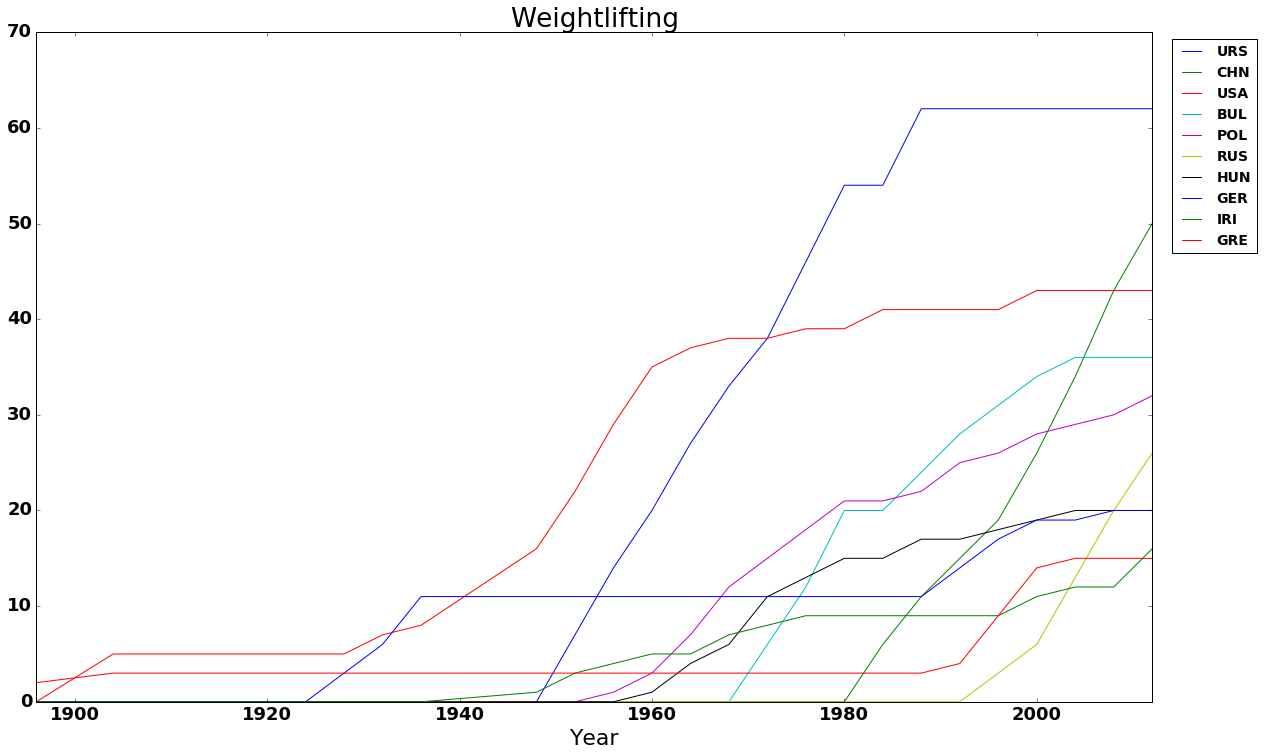

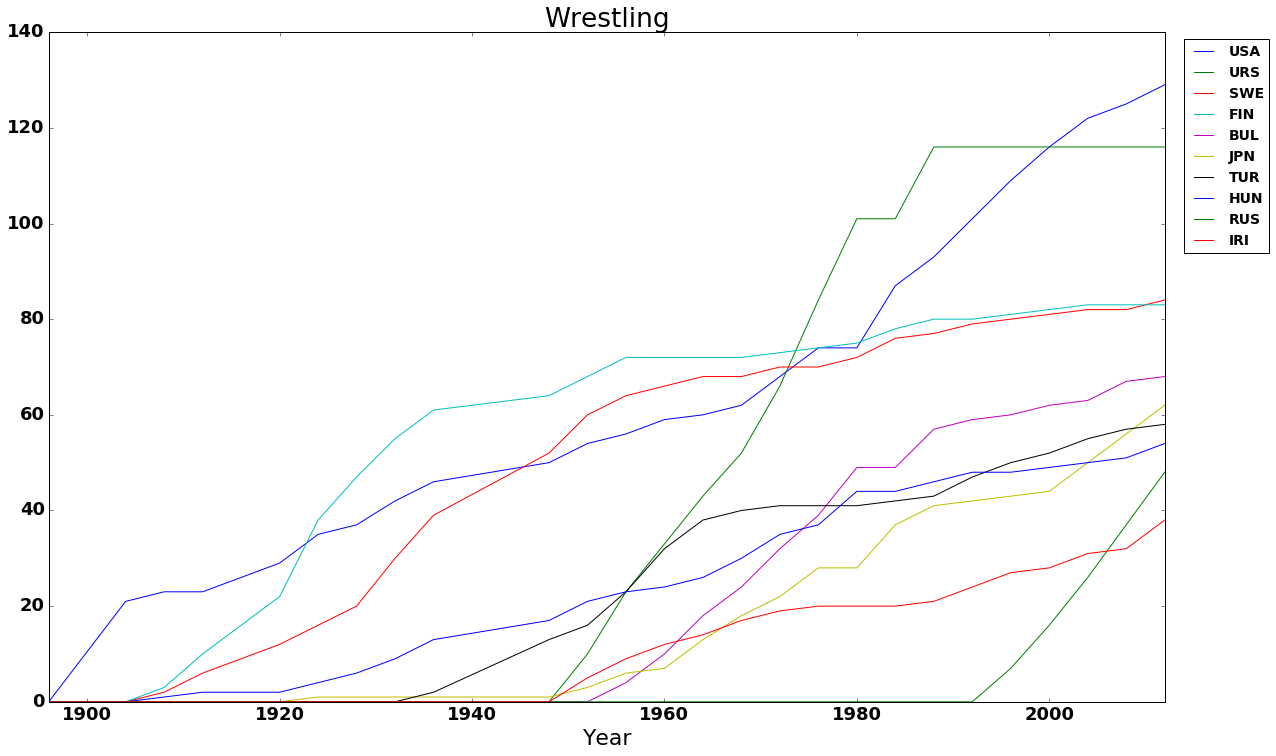

In [6]:
# count the number of sports so we know how many stuffs to plot
sports_count = len(list(set(data['Sport'])))
sports_count

# settings for the plot
fig, axs = plt.subplots(1,sports_count)

# one plot per sport
sports = data.groupby(['Sport'])

for sport in sports:
    
    # sport is a tuple here, we take the name of sports and the dataframe out.
    sport_name = sport[0]
    sport_df = sport[1]

    # the medals in this list will be counted
    # normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
    medal_to_include = ['Gold', 'Silver', 'Bronze']
    medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]

    # build the pivot table
    table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
    table = table.fillna(0).reset_index()

    # remove the multi-level columns
    new_table = table['Medal']
    # set index for as it's country name
    new_table = new_table.set_index(table['NOC'])
    # print(new_table.columns)
    
    for i, year in enumerate(new_table.columns):
        # we add a col to the next column in each loop,
        # to make a cumulative chart
        if i == (len(new_table.columns) - 1):
            continue

        next_year = new_table.columns[i+1]
        if next_year == 'NOC':
            continue

        new_table[next_year] = new_table[year] + new_table[next_year]

    new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
    topten = new_table.iloc[0:10, :]

    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1>Aquatics</h1>
There seems to be some missing data. Check each of the sports in different section.

In [7]:
# Take a look at how each top country did
data[data['Sport'] == 'Aquatics'].groupby(['NOC']).count().sort_values(['Medal'], ascending=False).head()

Year  City  Sport  Discipline  Event  Event gender  Medal
NOC                                                           
USA   674   674    674         674    674           674    674
AUS   193   193    193         193    193           193    193
GDR    99    99     99          99     99            99     99
CHN    99    99     99          99     99            99     99
JPN    85    85     85          85     85            85     85

In [8]:
set(data[(data['Sport'] == 'Aquatics') & (data['NOC'] == 'USA')]['Medal'])

{'Bronze', 'Gold', 'Silver'}

(2047, 8)


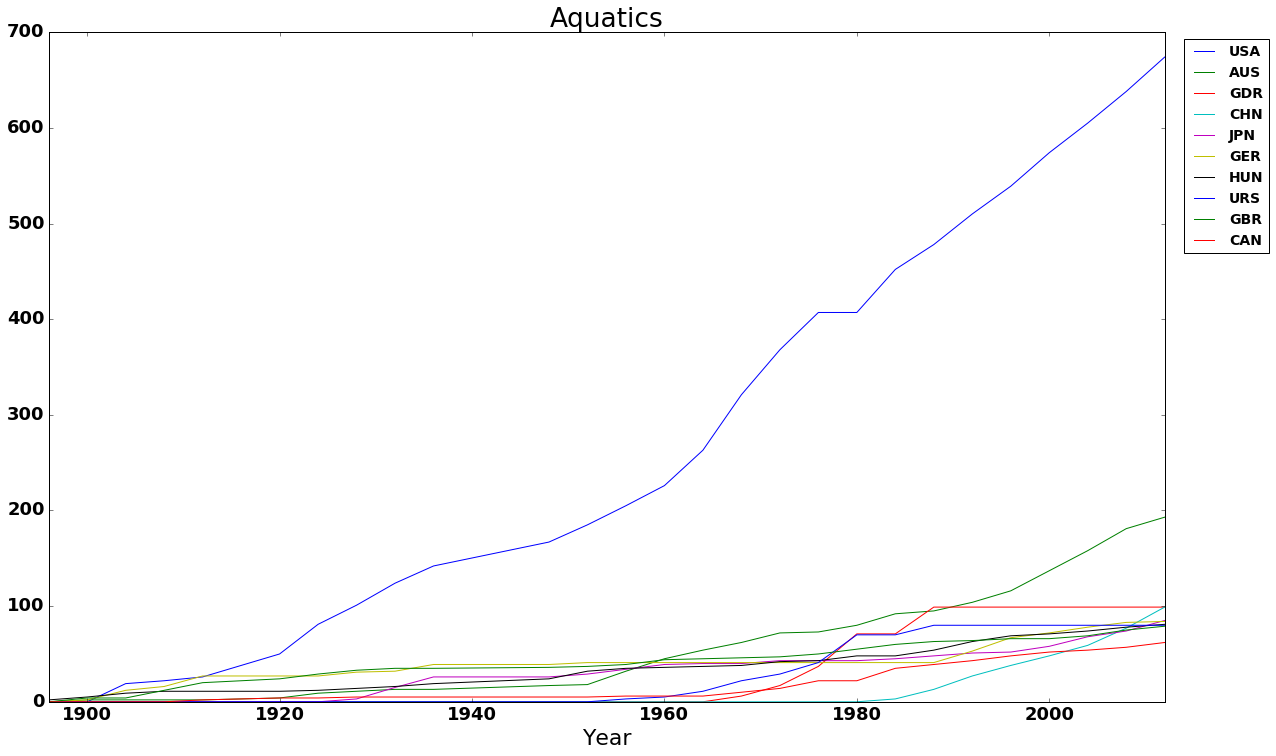

In [9]:
sport_name = 'Aquatics'
sport_df = data[data['Sport'] == sport_name]

# the medals in this list will be counted
# normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
medal_to_include = ['Gold', 'Silver', 'Bronze']
# medal_to_include = ['Gold']

medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]
print(medals_we_care.shape)


# build the pivot table
table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
table = table.fillna(0).reset_index()

# remove the multi-level columns
new_table = table['Medal']
# set index for as it's country name
new_table = new_table.set_index(table['NOC'])
# print(new_table.columns)

for i, year in enumerate(new_table.columns):
    # we add a col to the next column in each loop,
    # to make a cumulative chart
    if i == (len(new_table.columns) - 1):
        continue

    next_year = new_table.columns[i+1]
    if next_year == 'NOC':
        continue

    new_table[next_year] = new_table[year] + new_table[next_year]

new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
topten = new_table.iloc[0:10, :]

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1> Showing Same plots but only with Gold Medals</h1>

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1900.0, right=1900.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1920.0, right=1920.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base

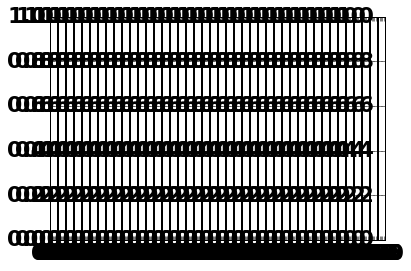

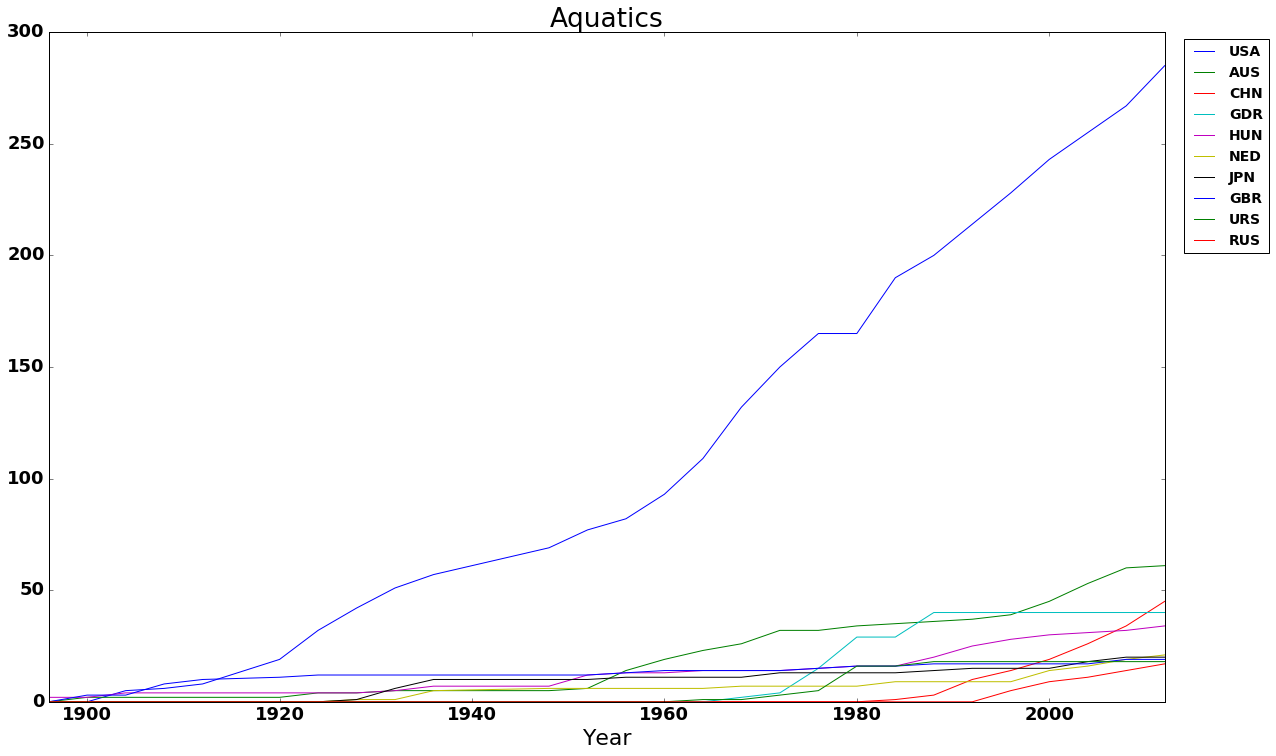

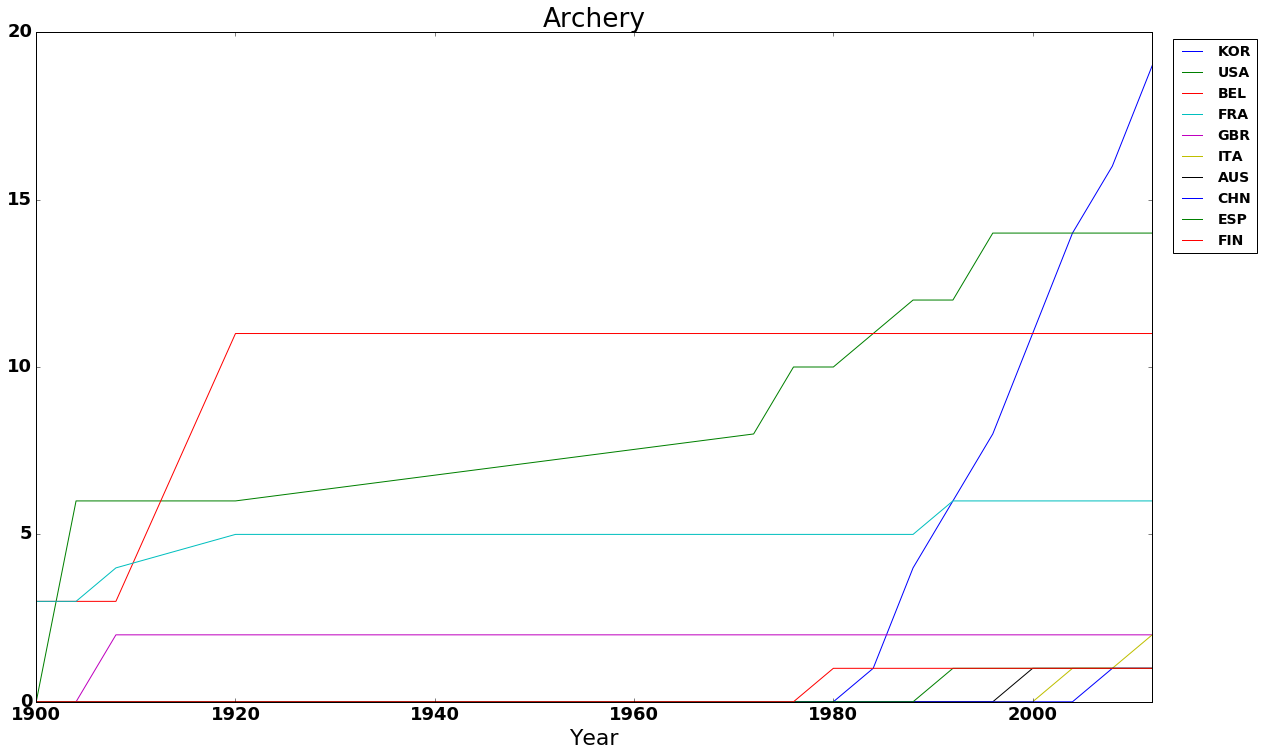

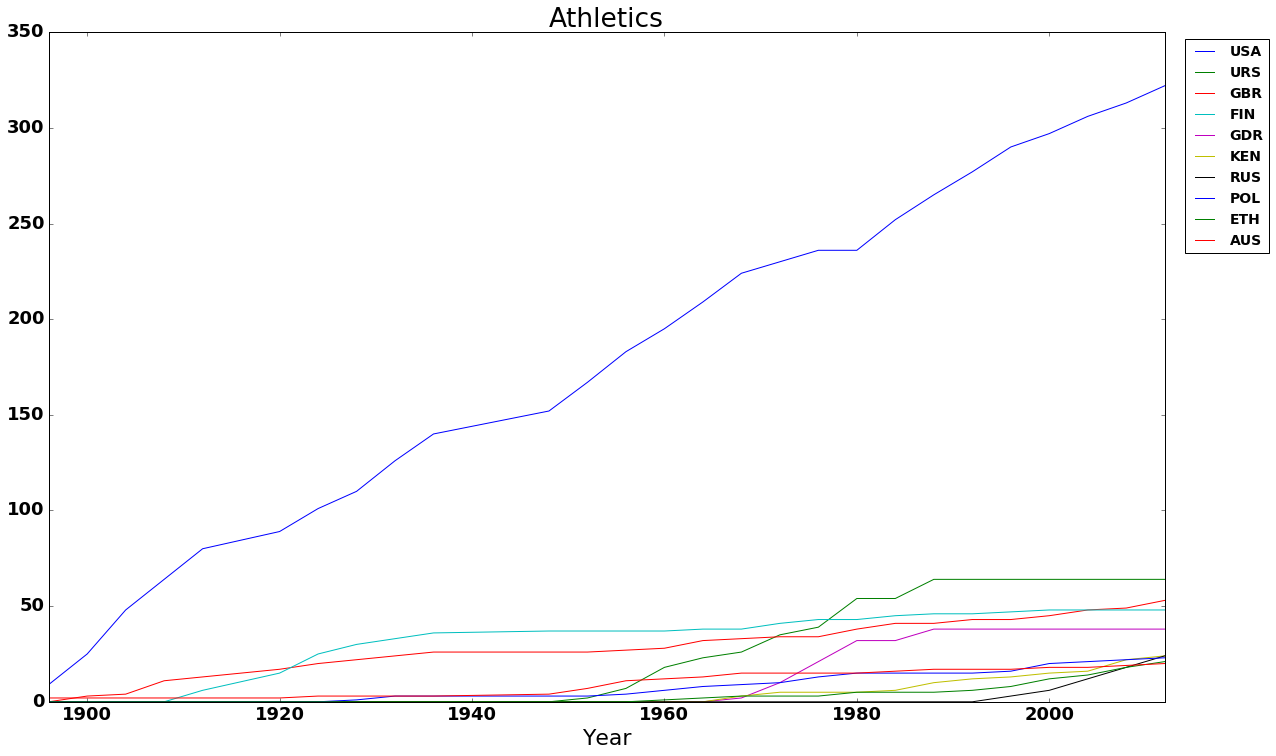

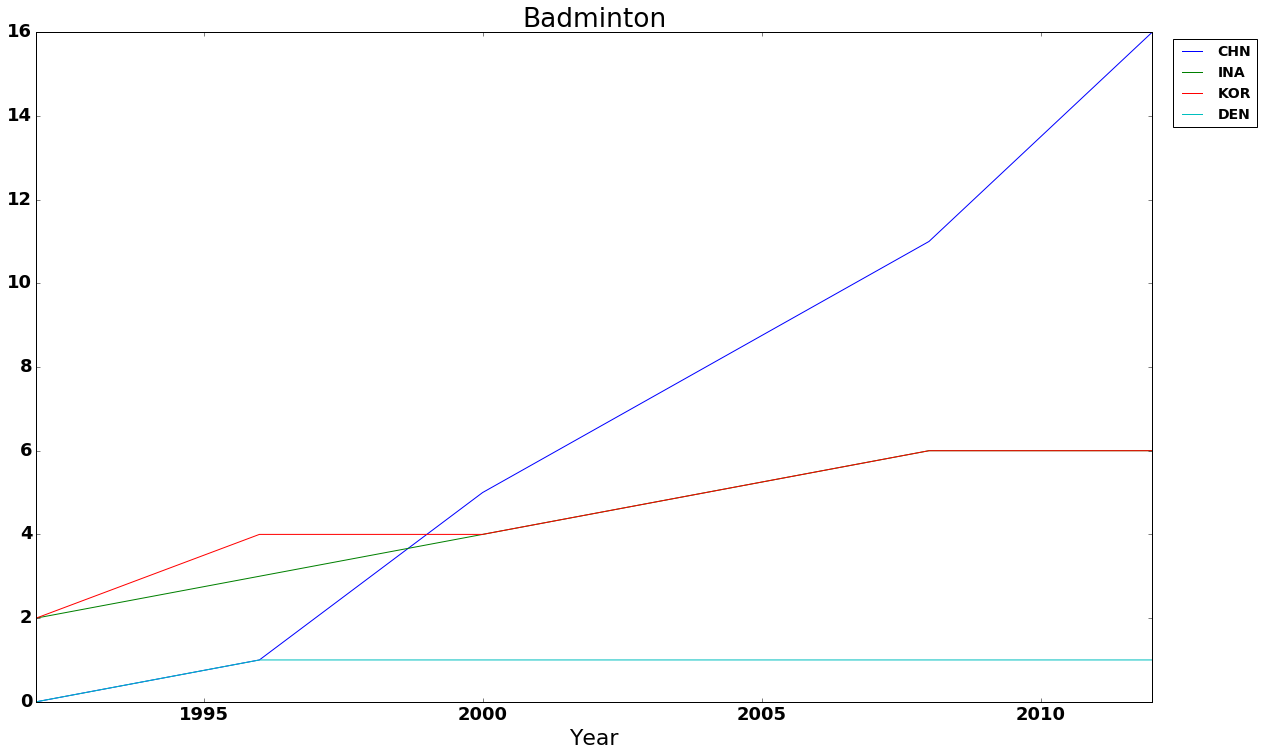

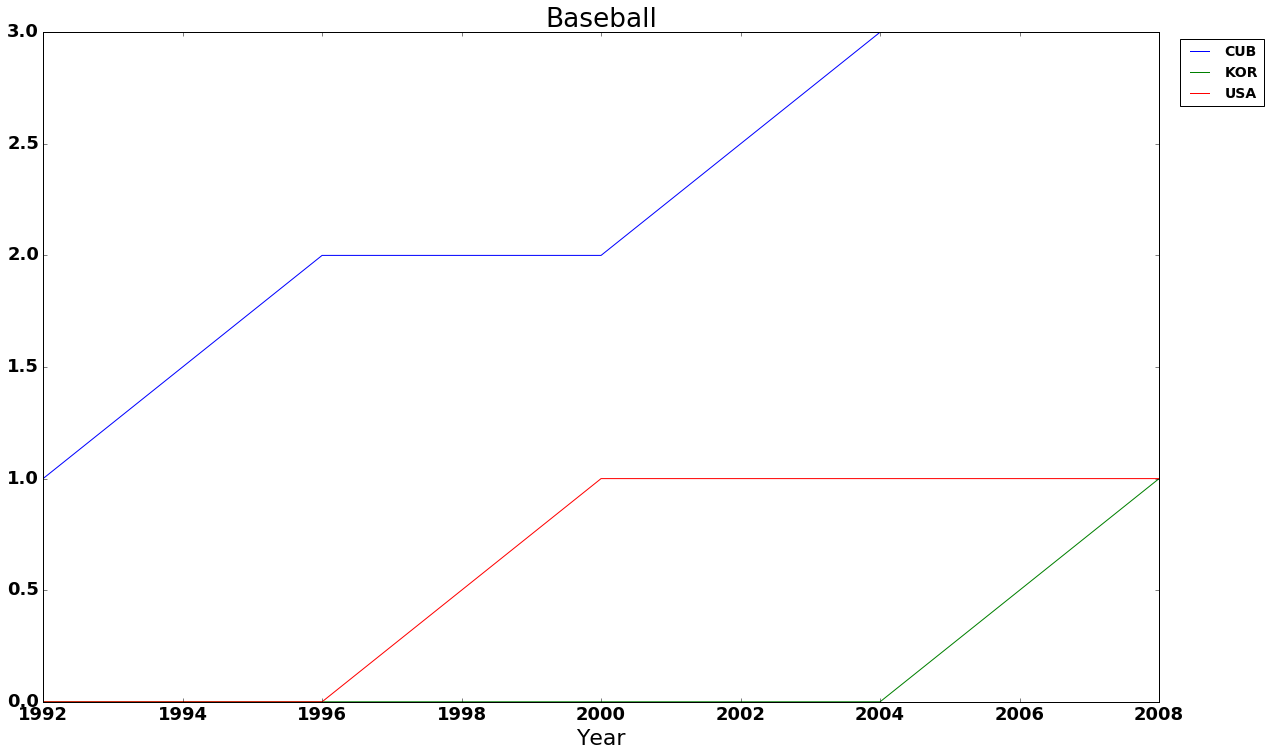

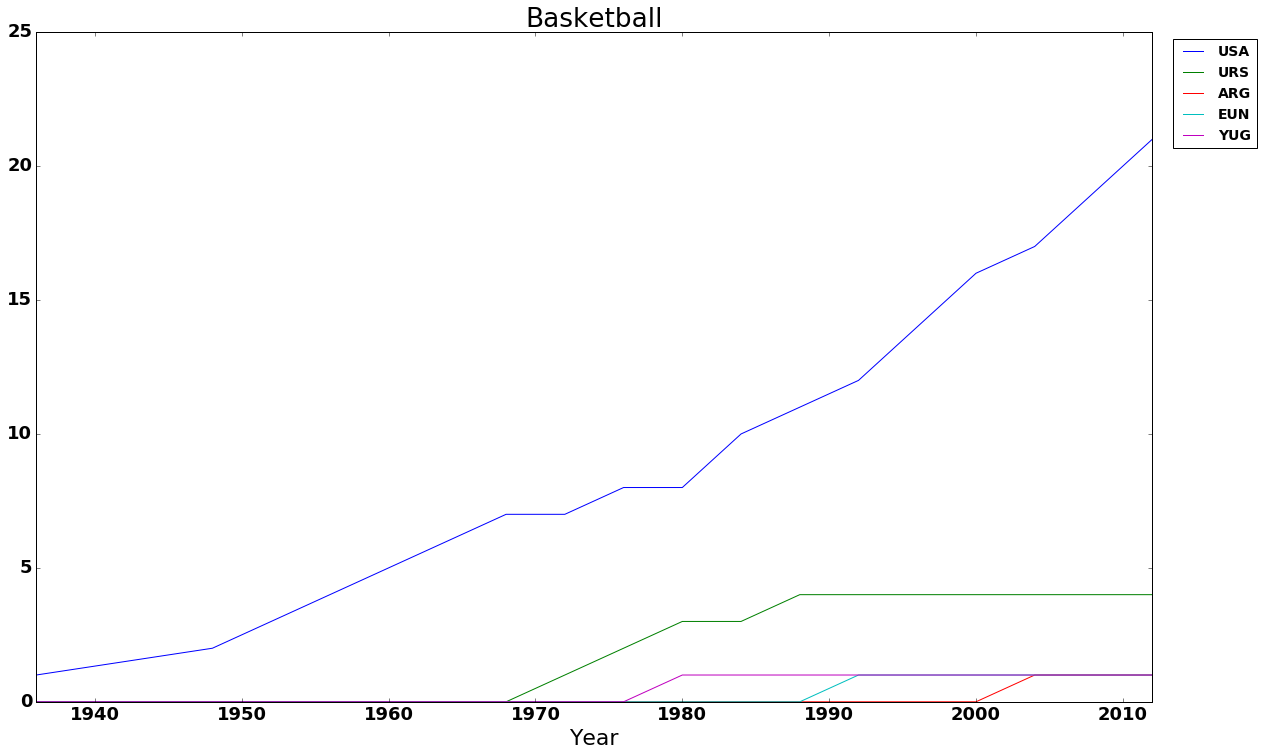

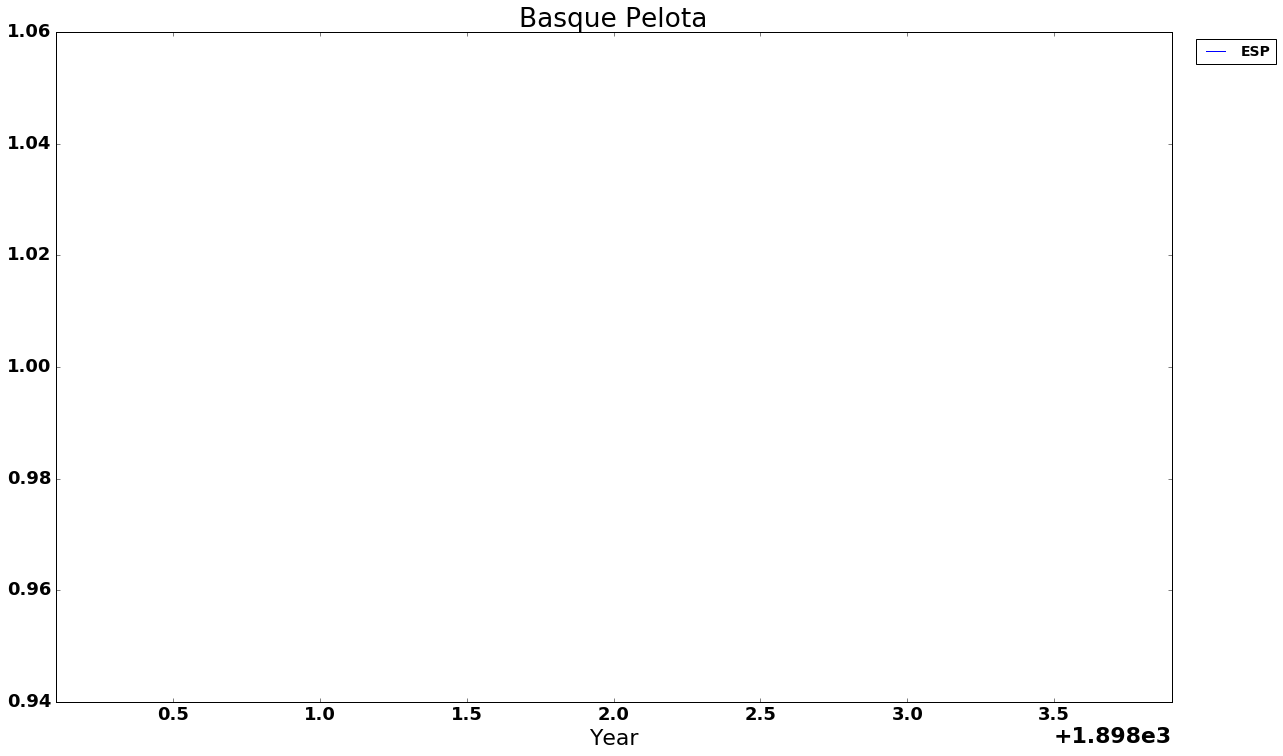

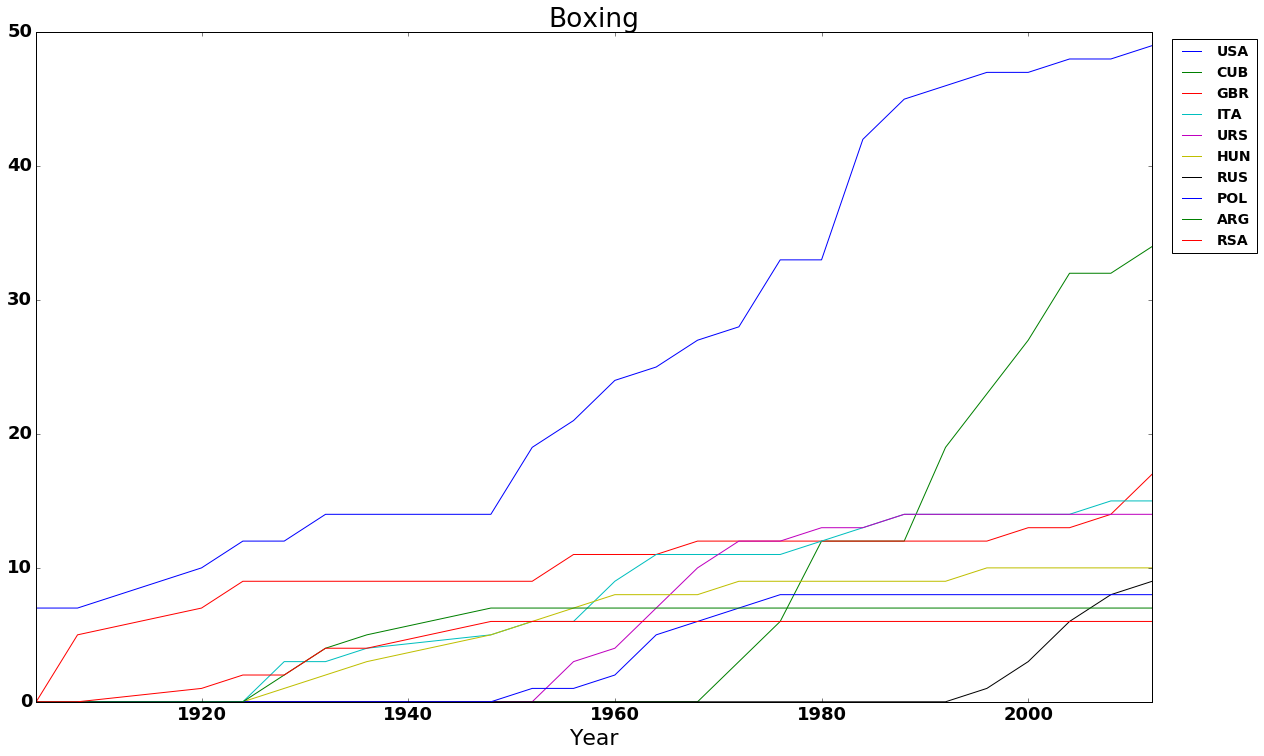

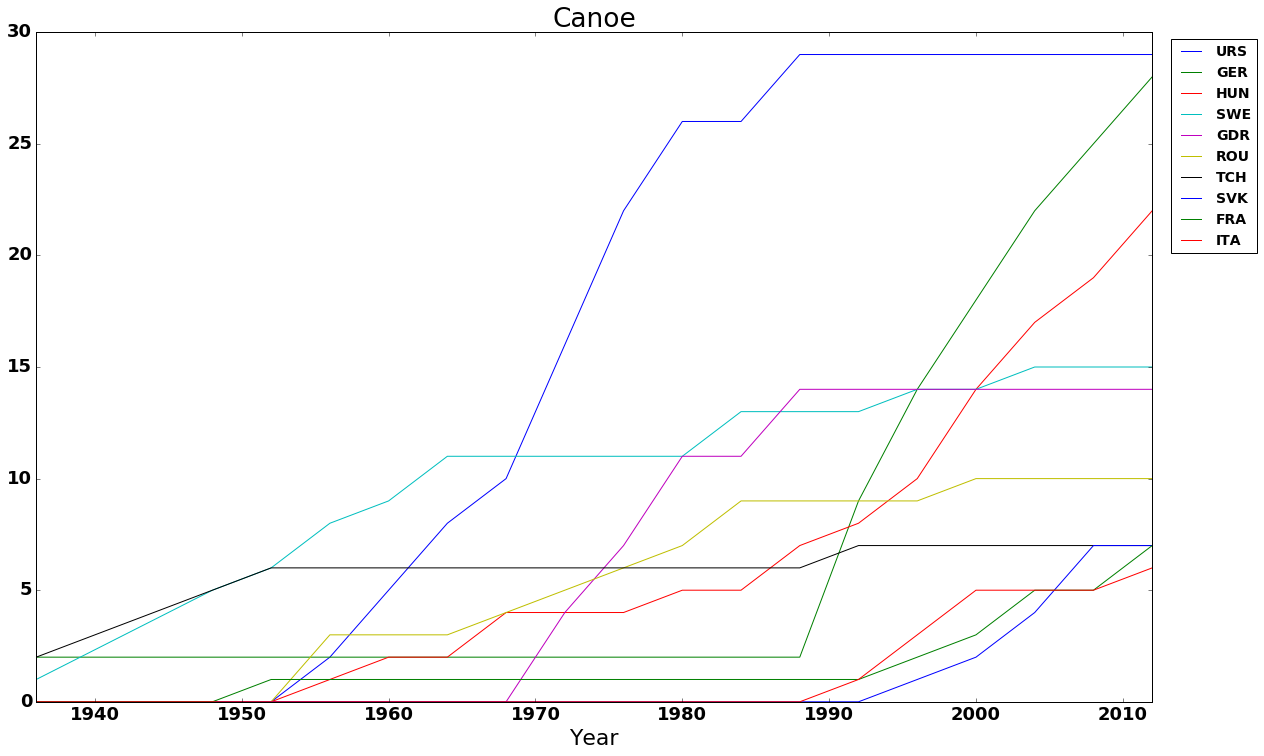

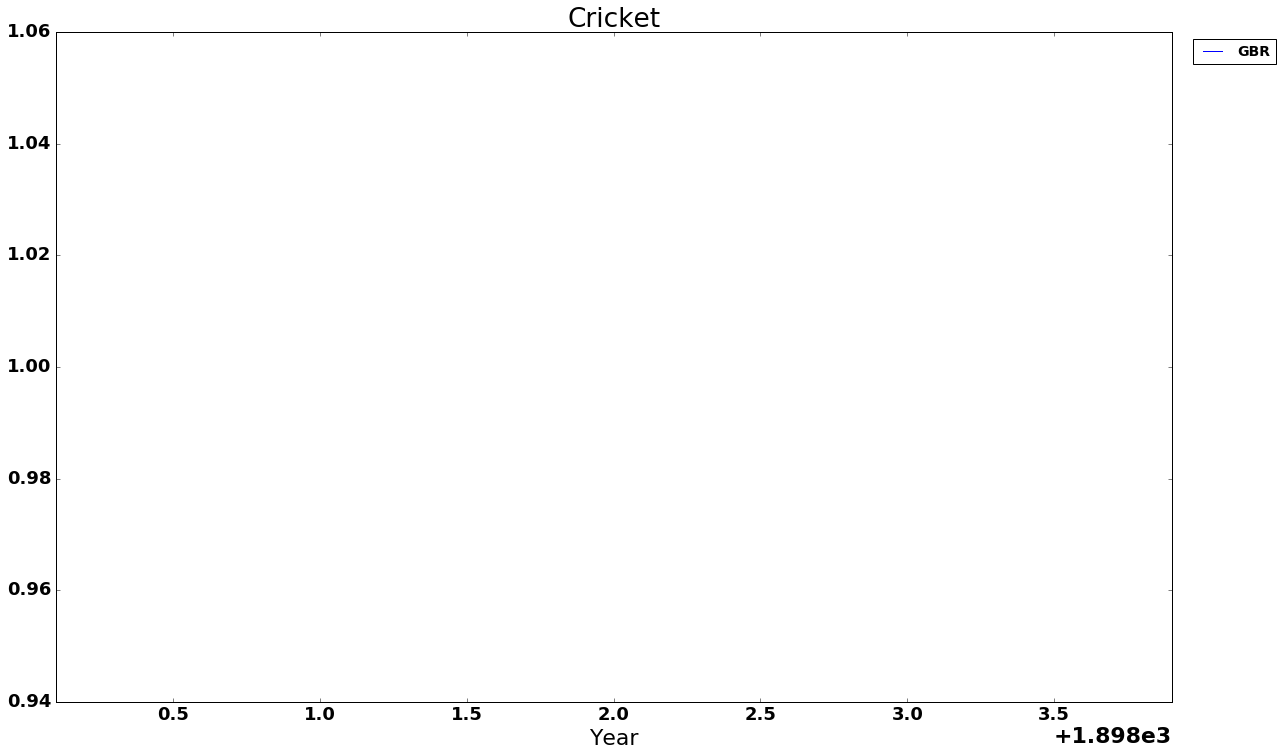

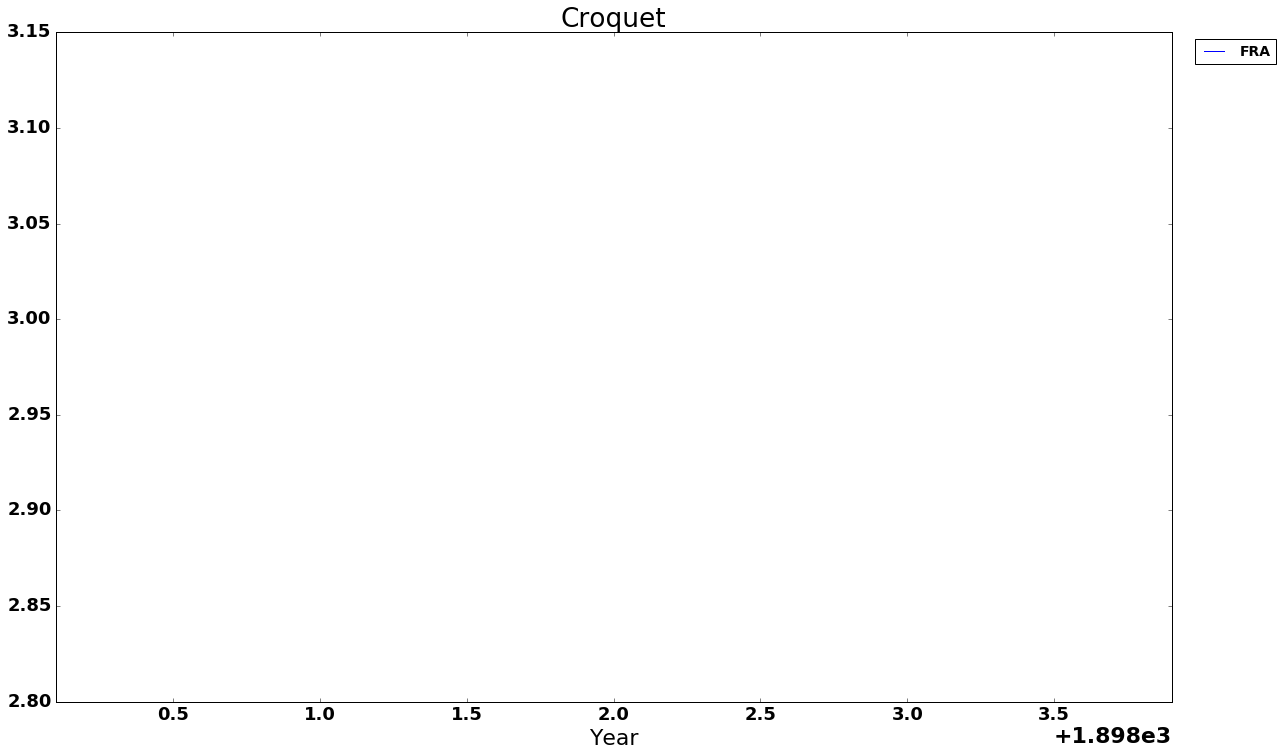

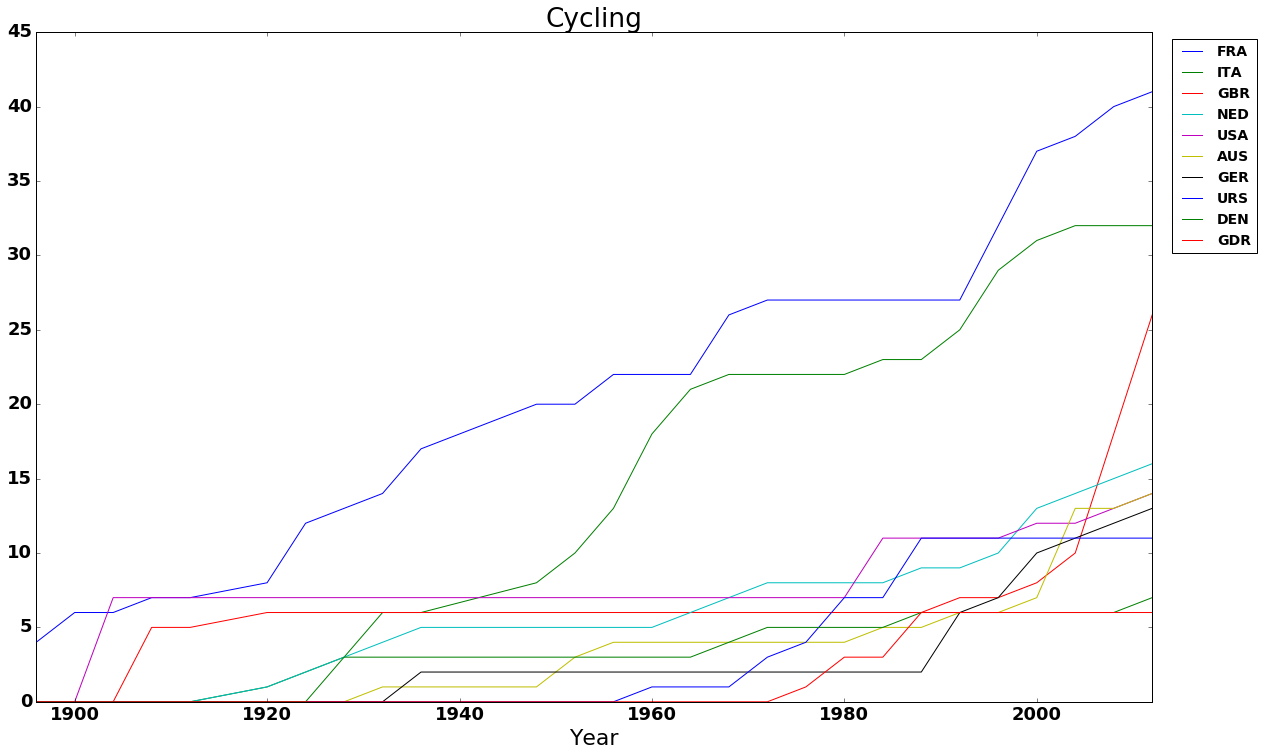

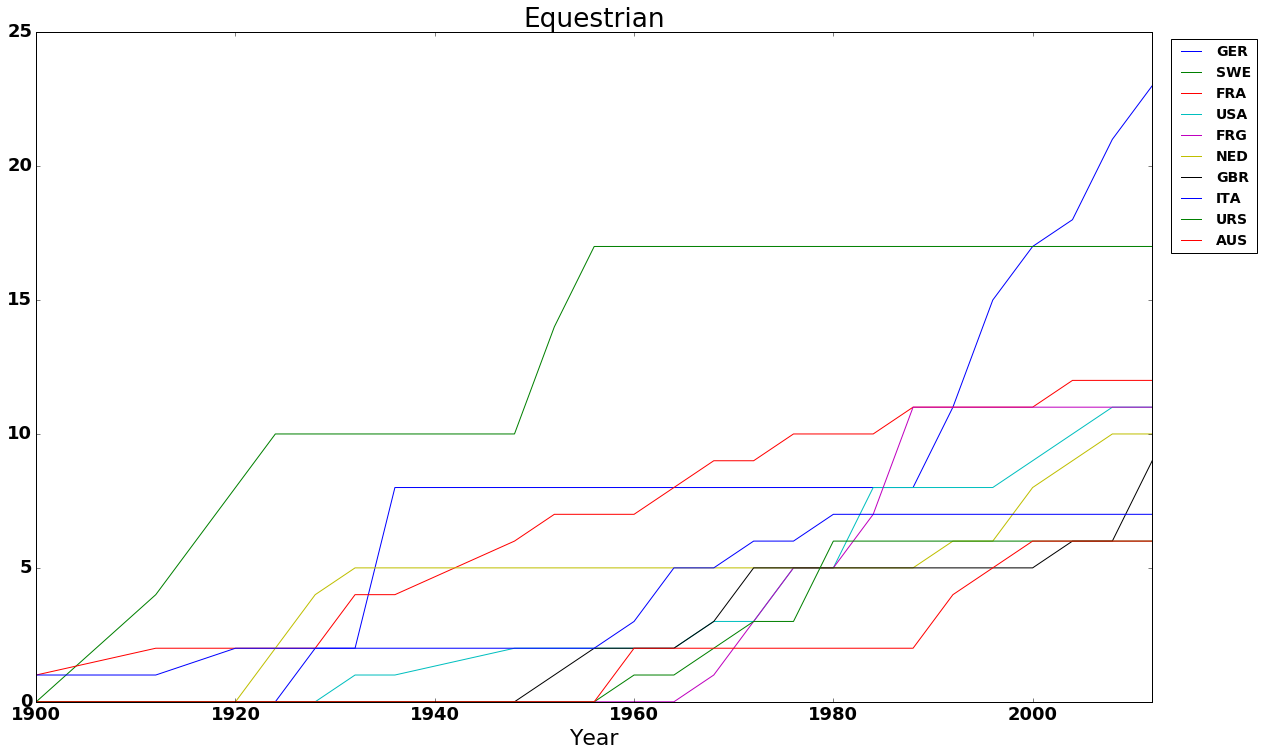

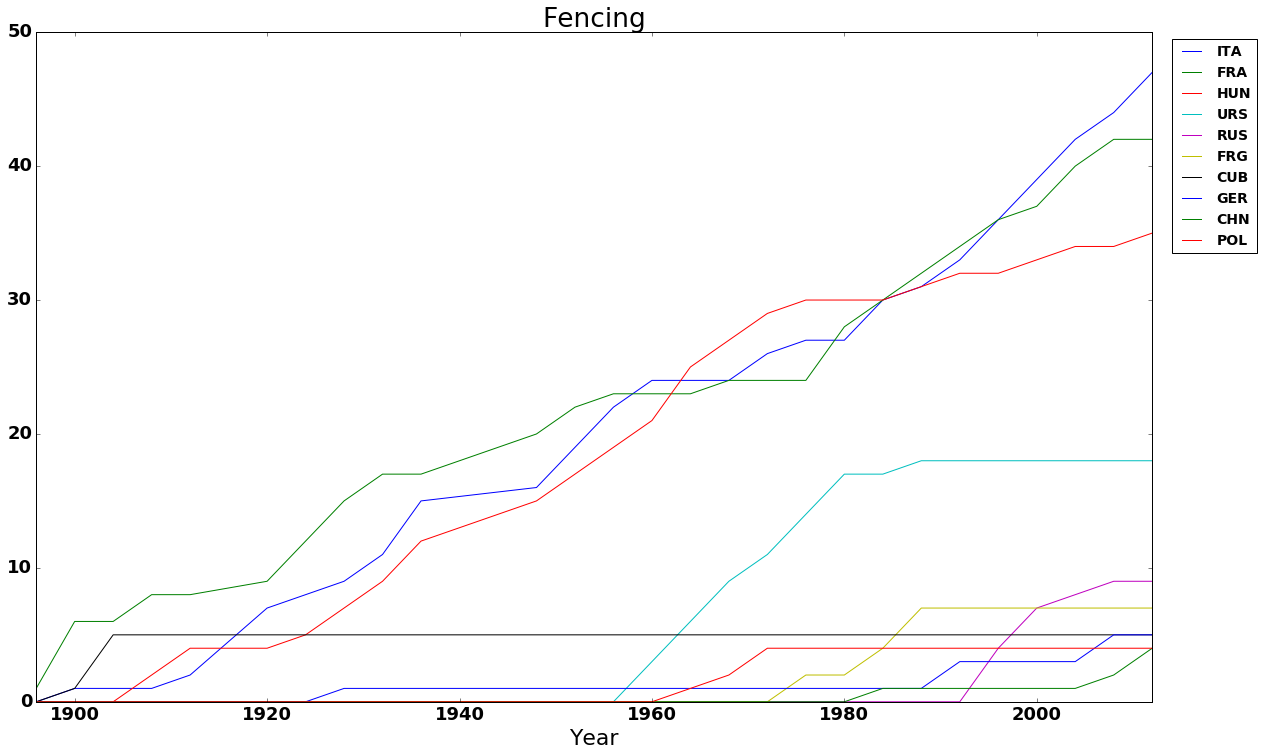

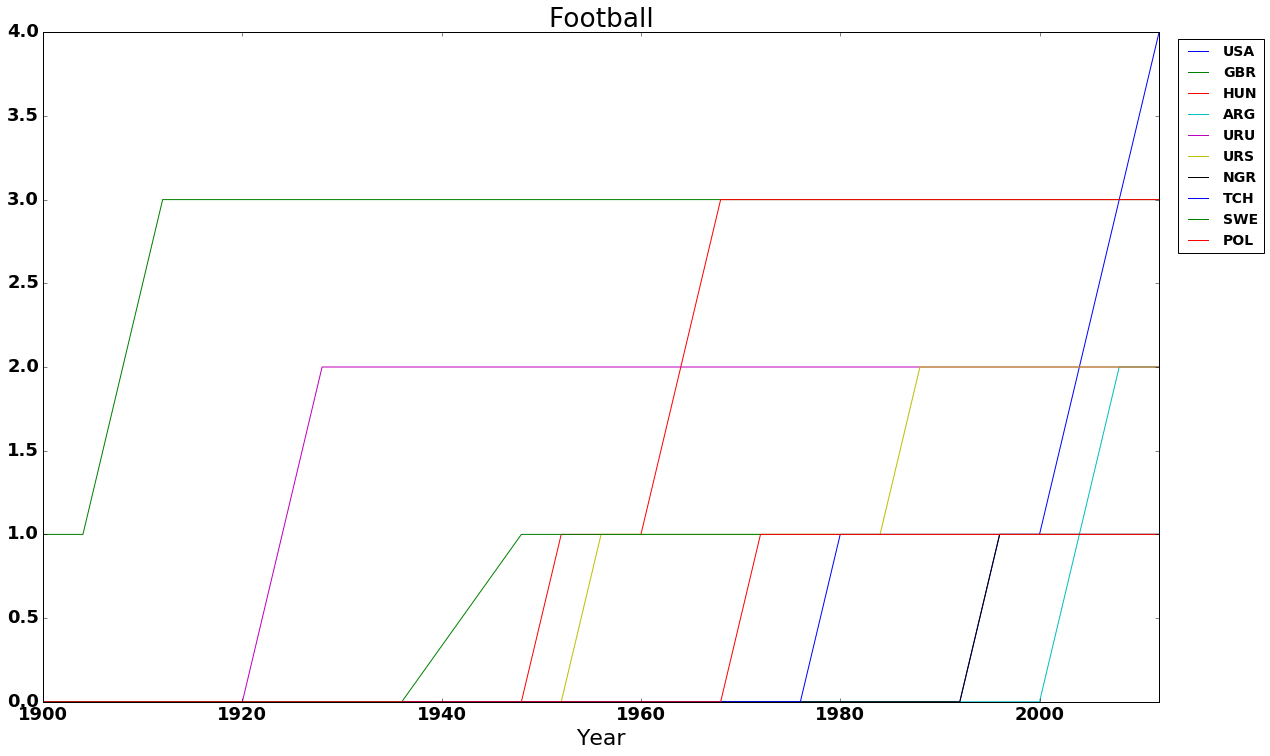

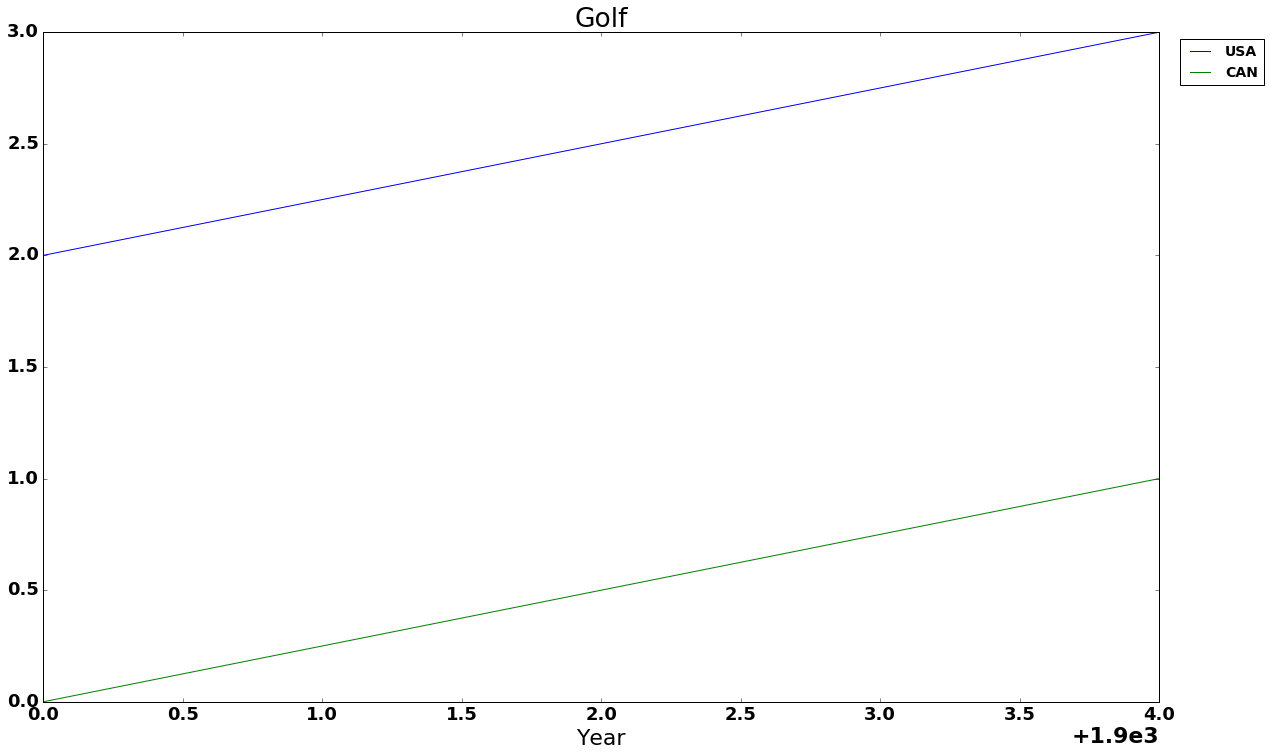

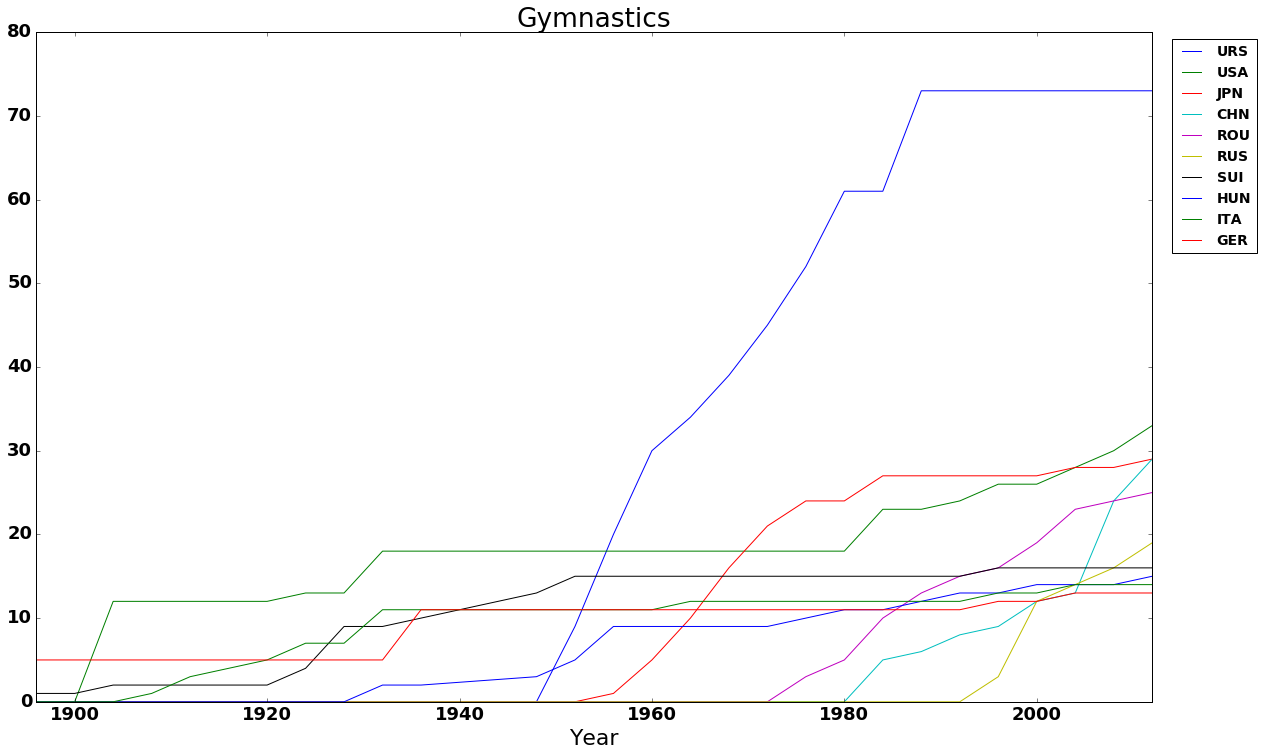

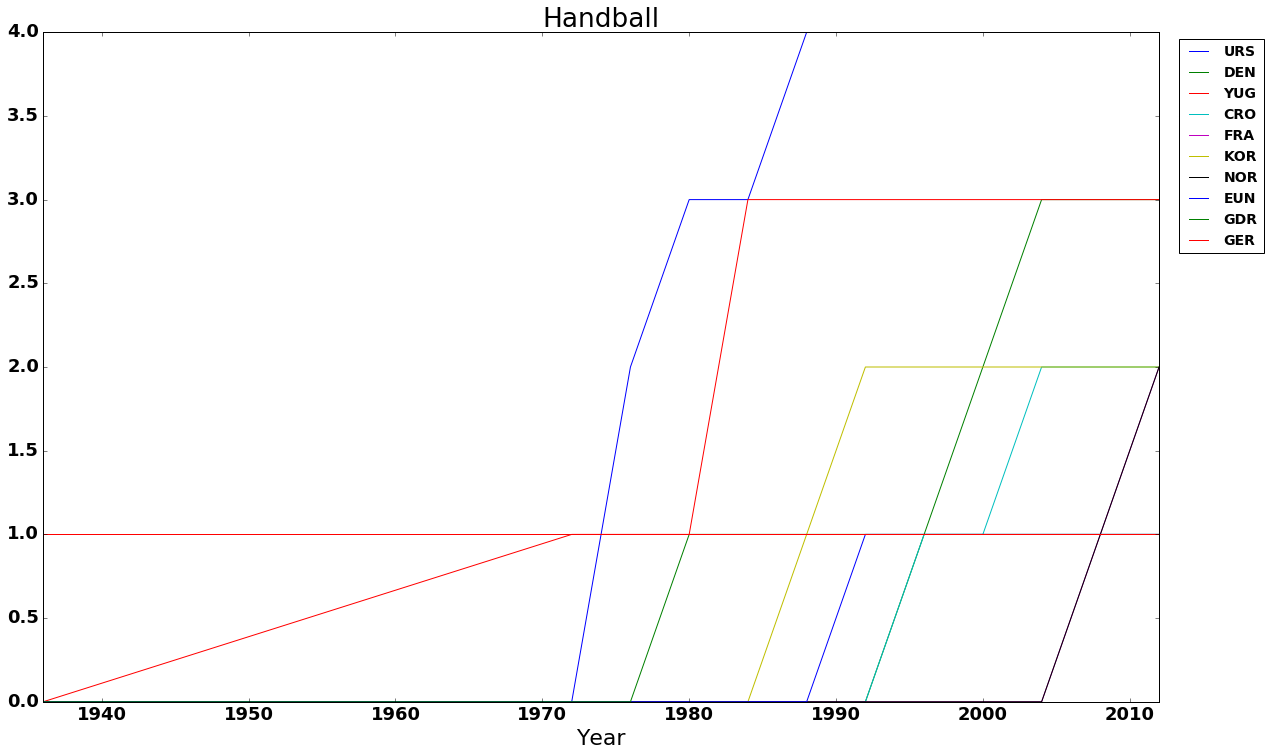

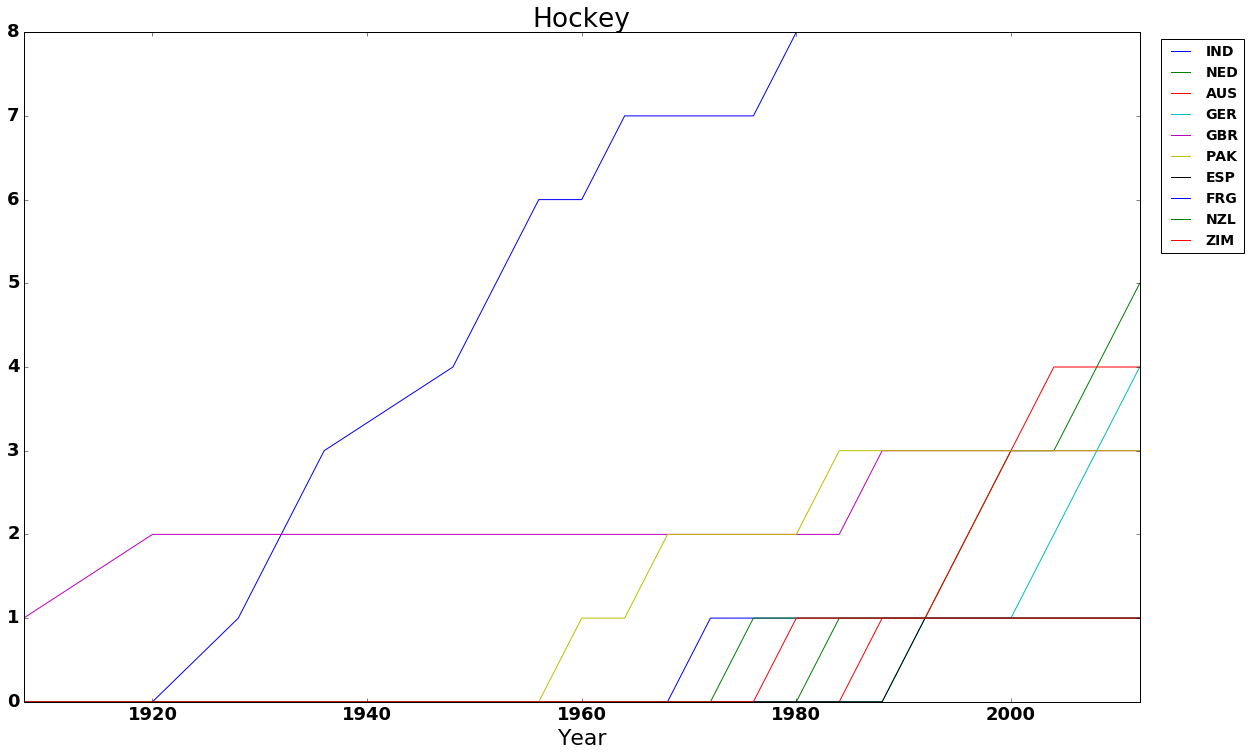

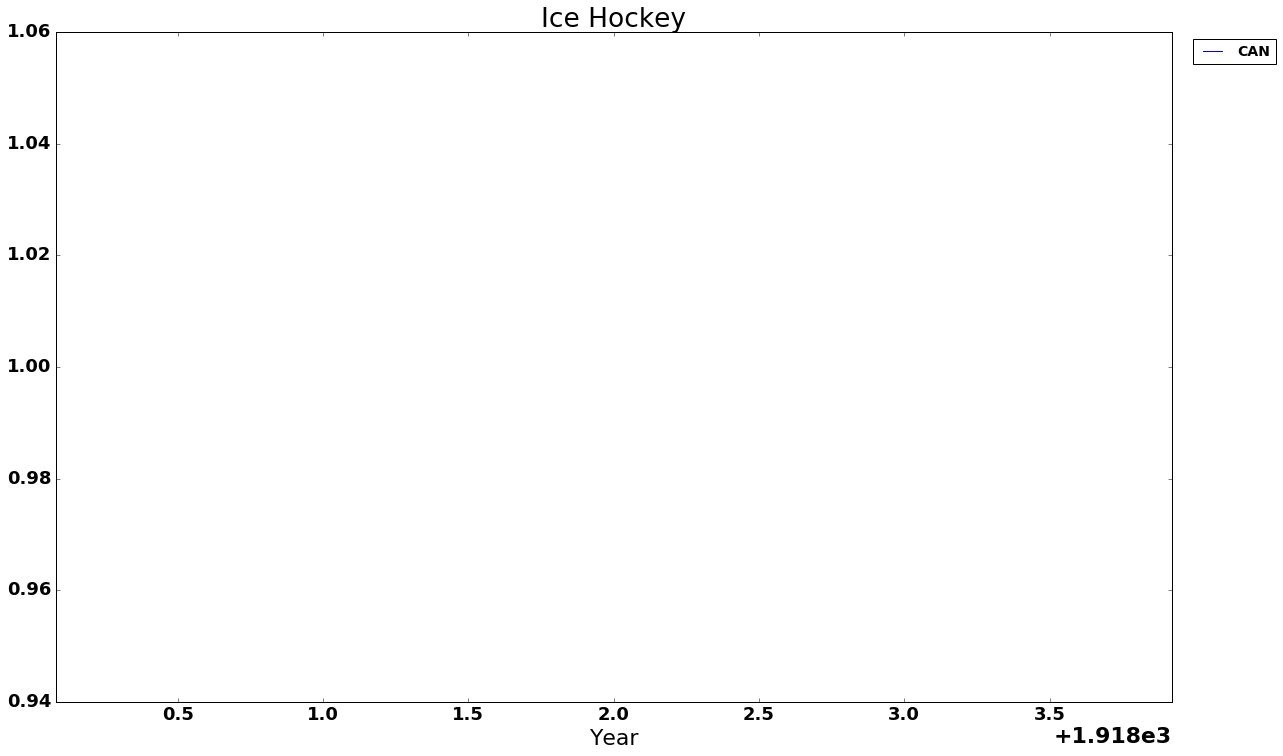

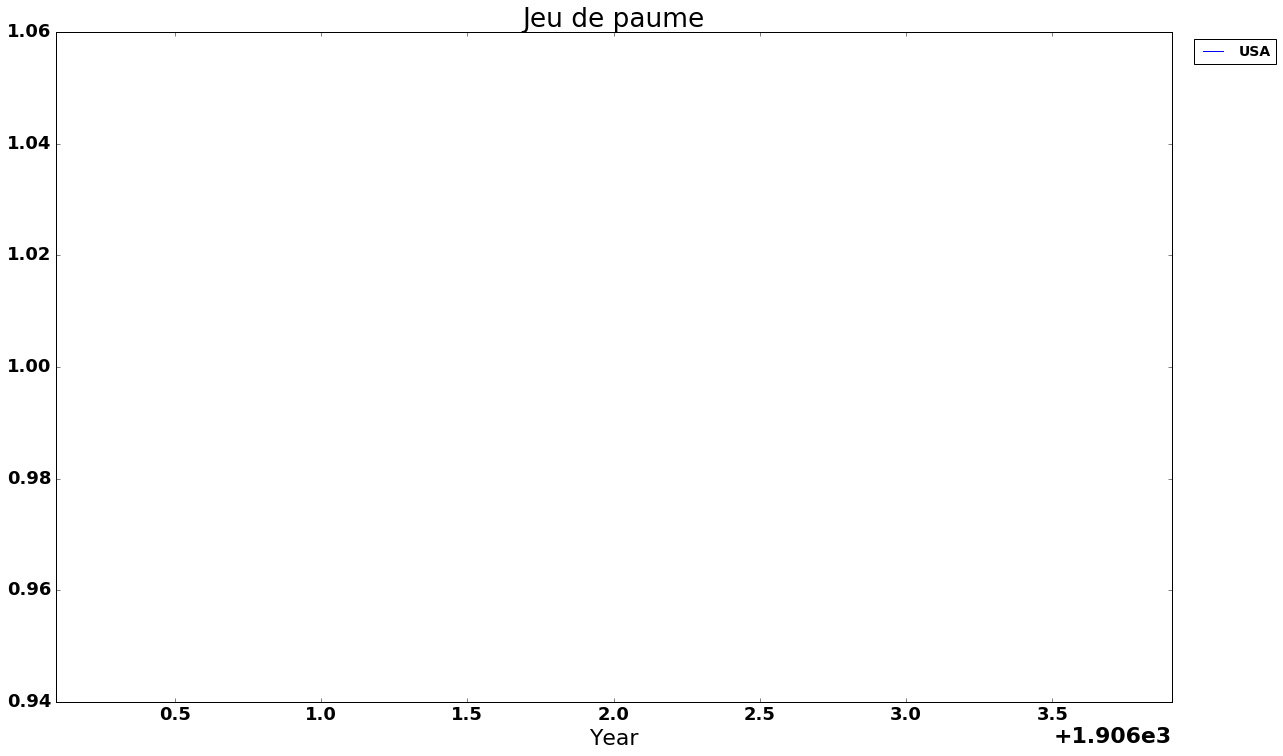

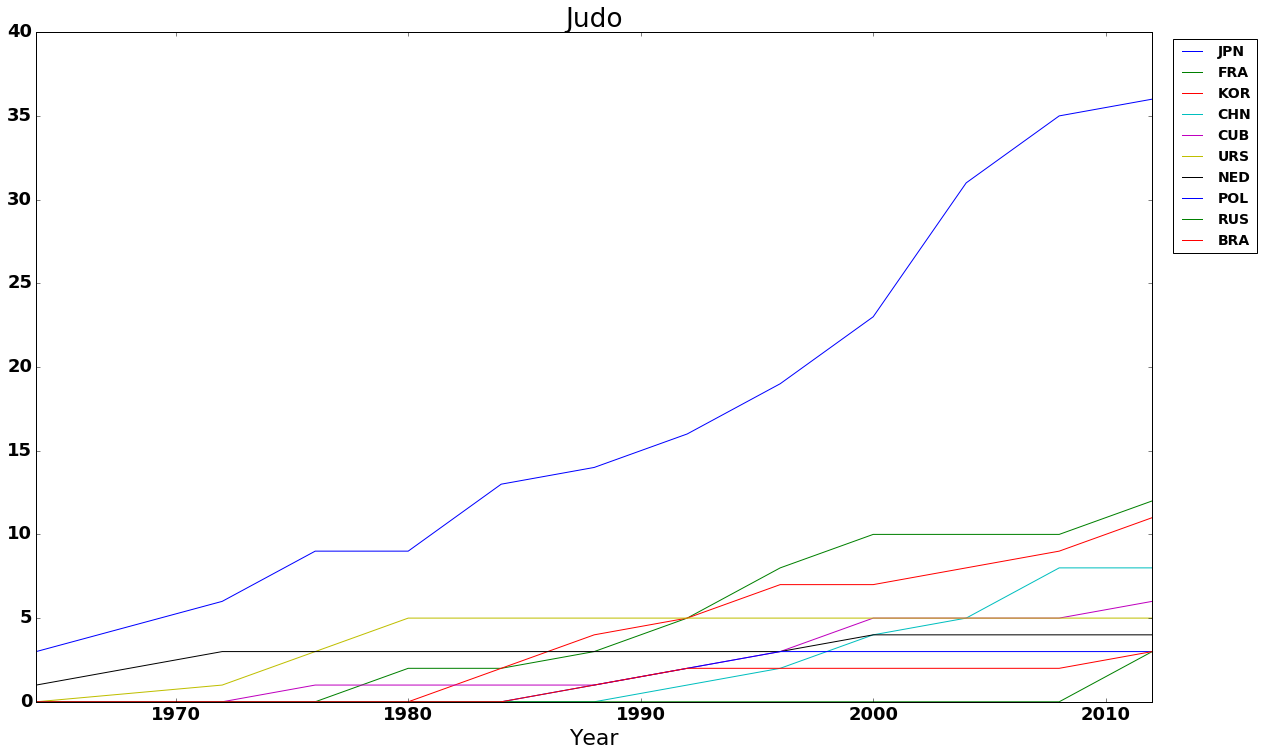

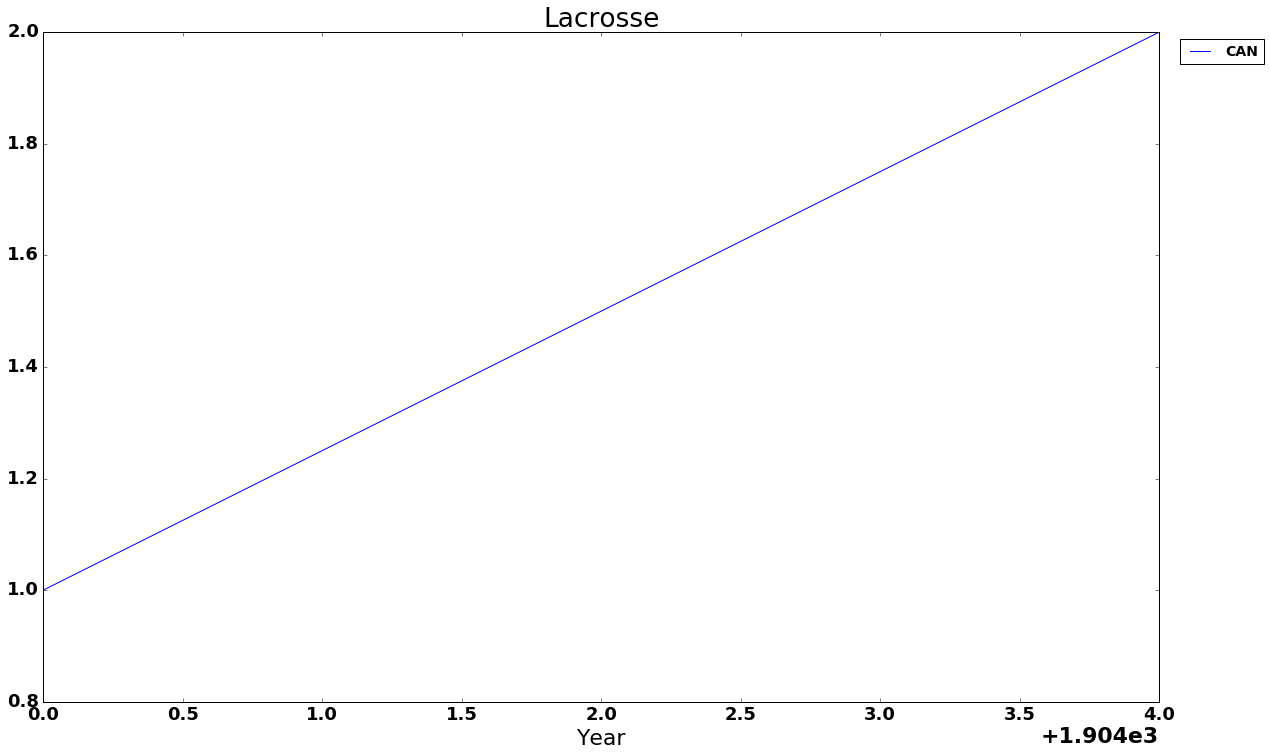

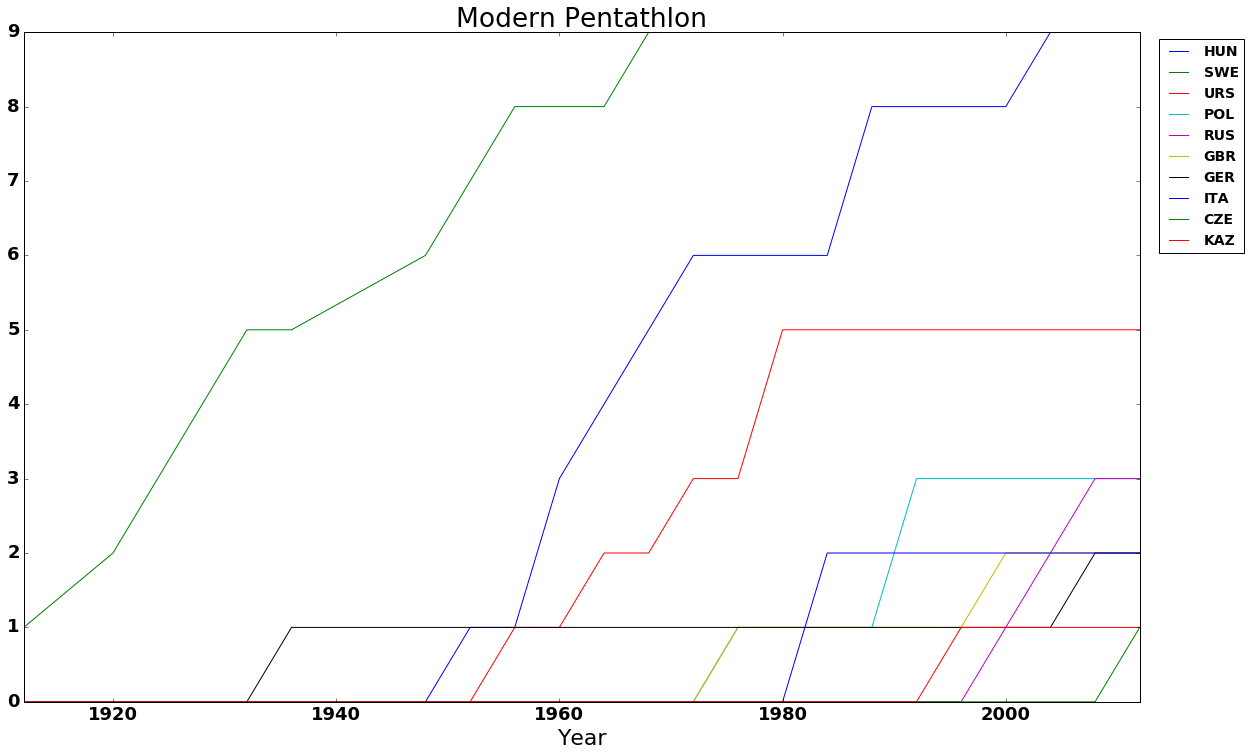

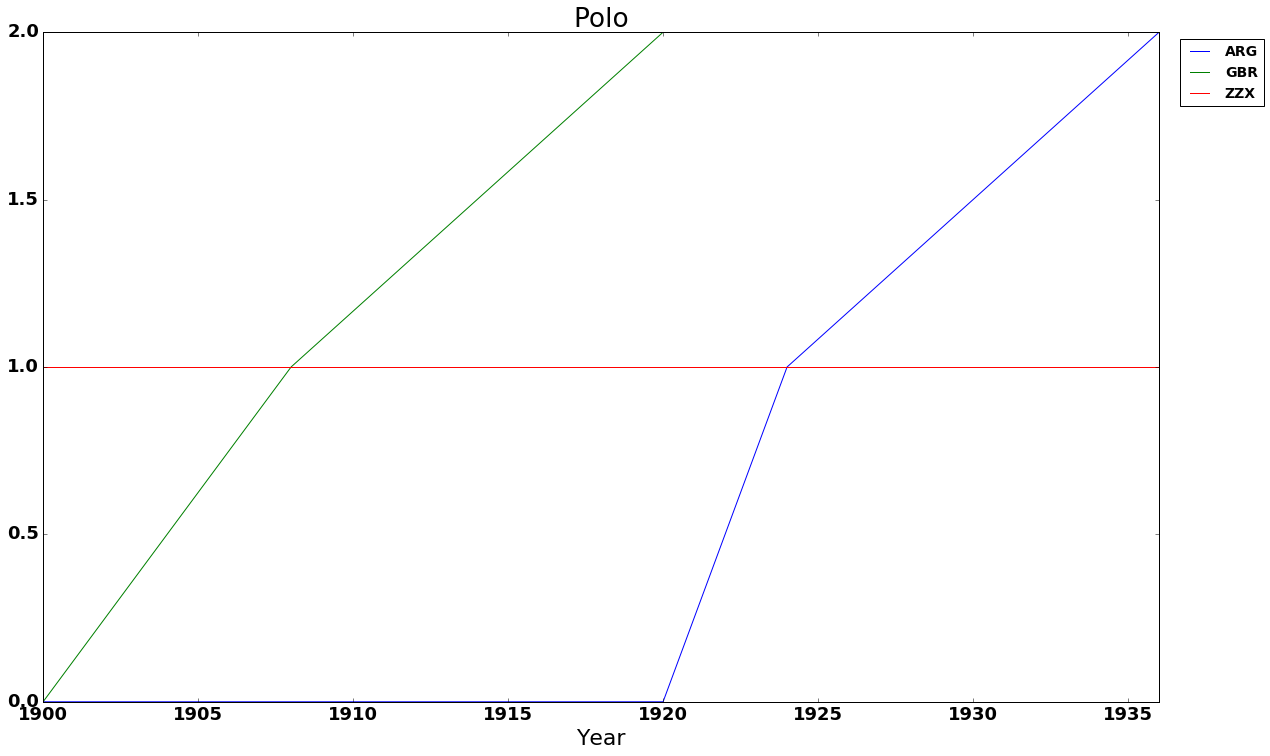

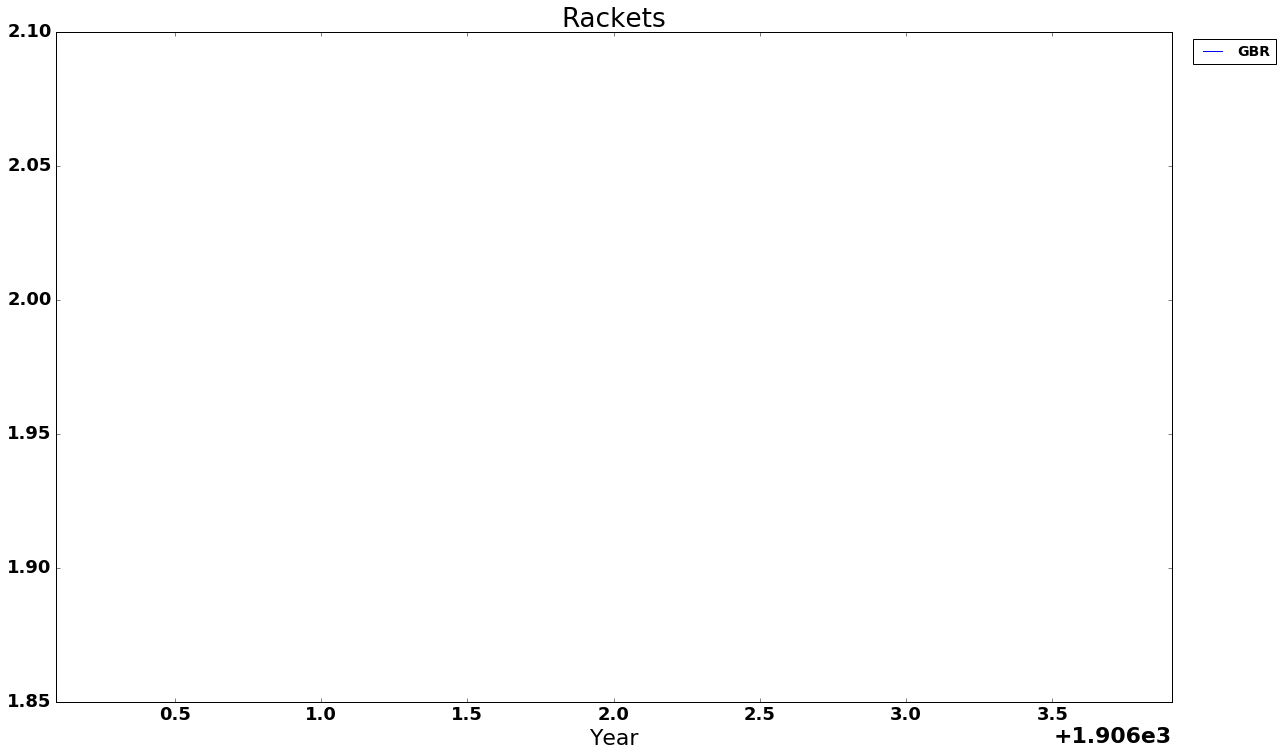

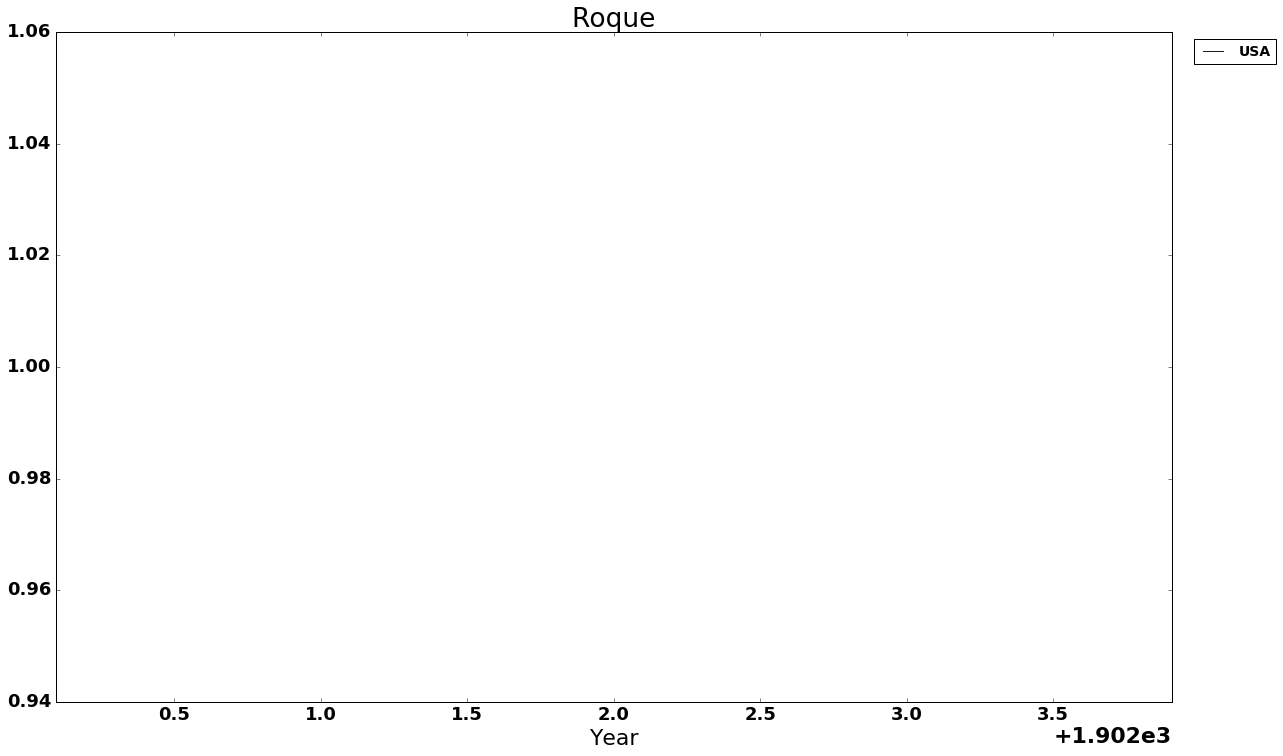

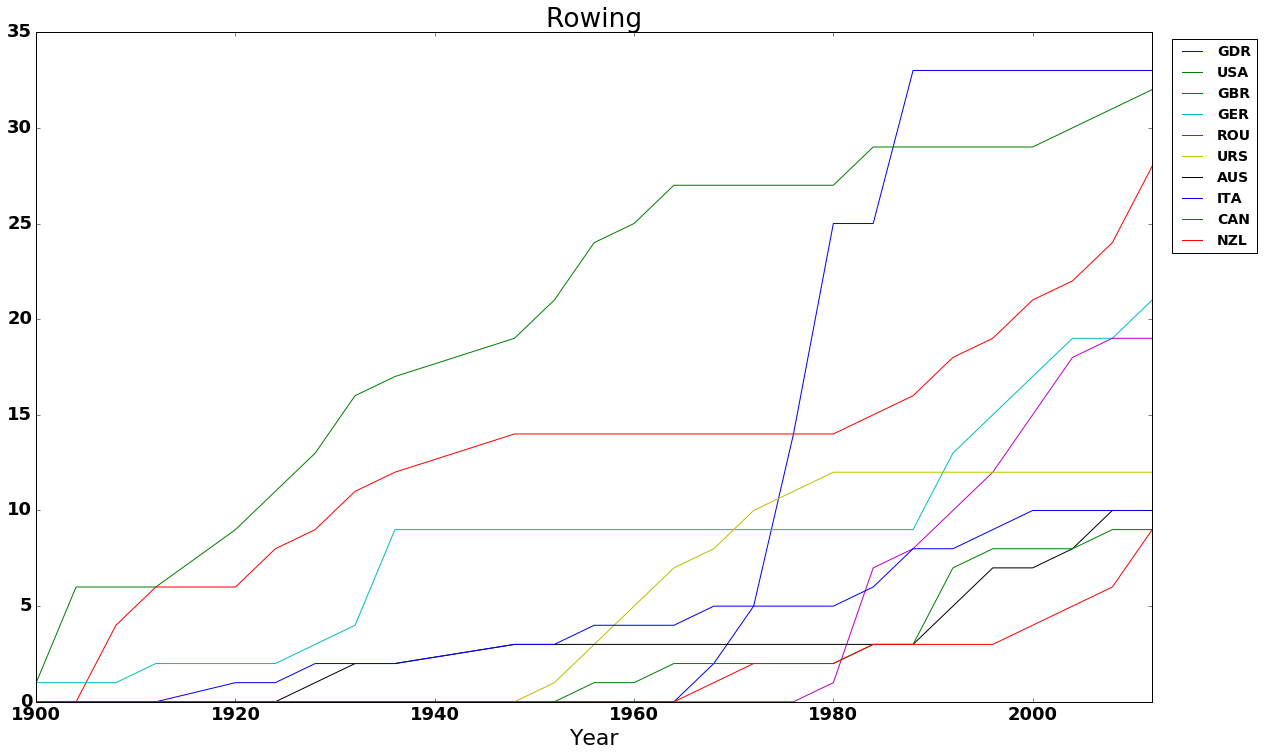

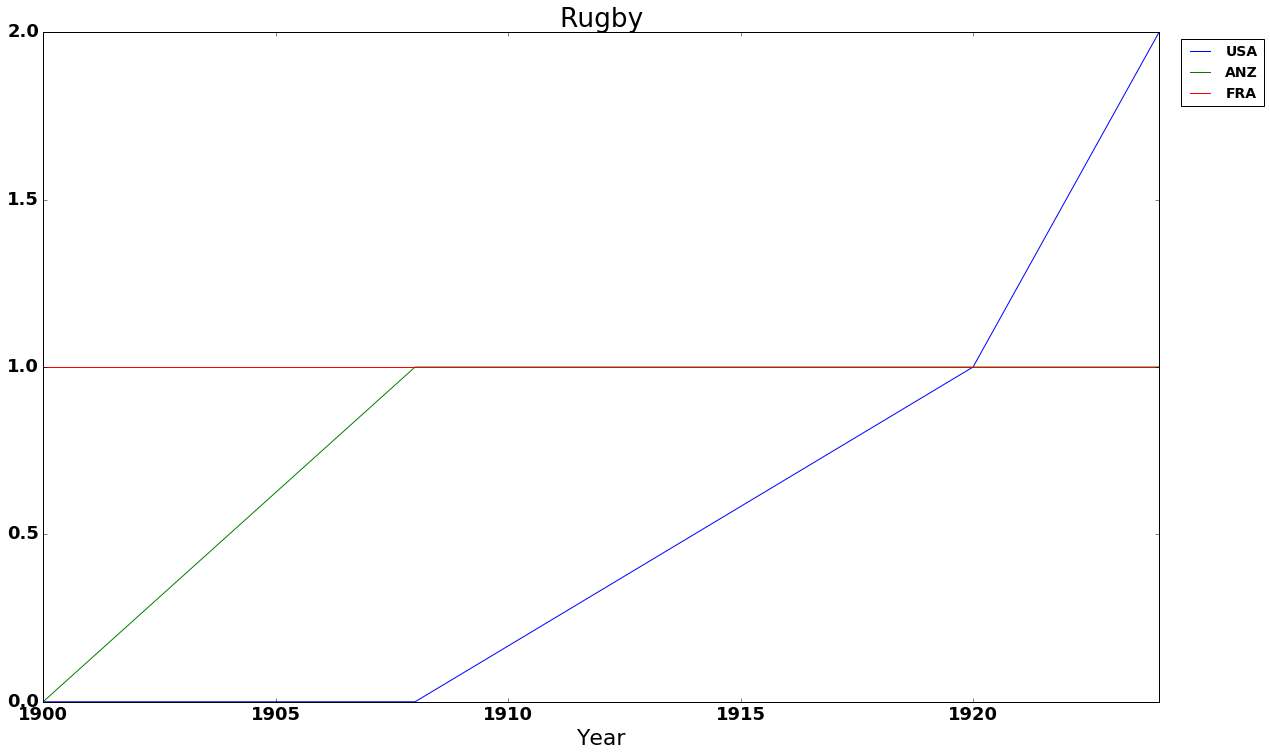

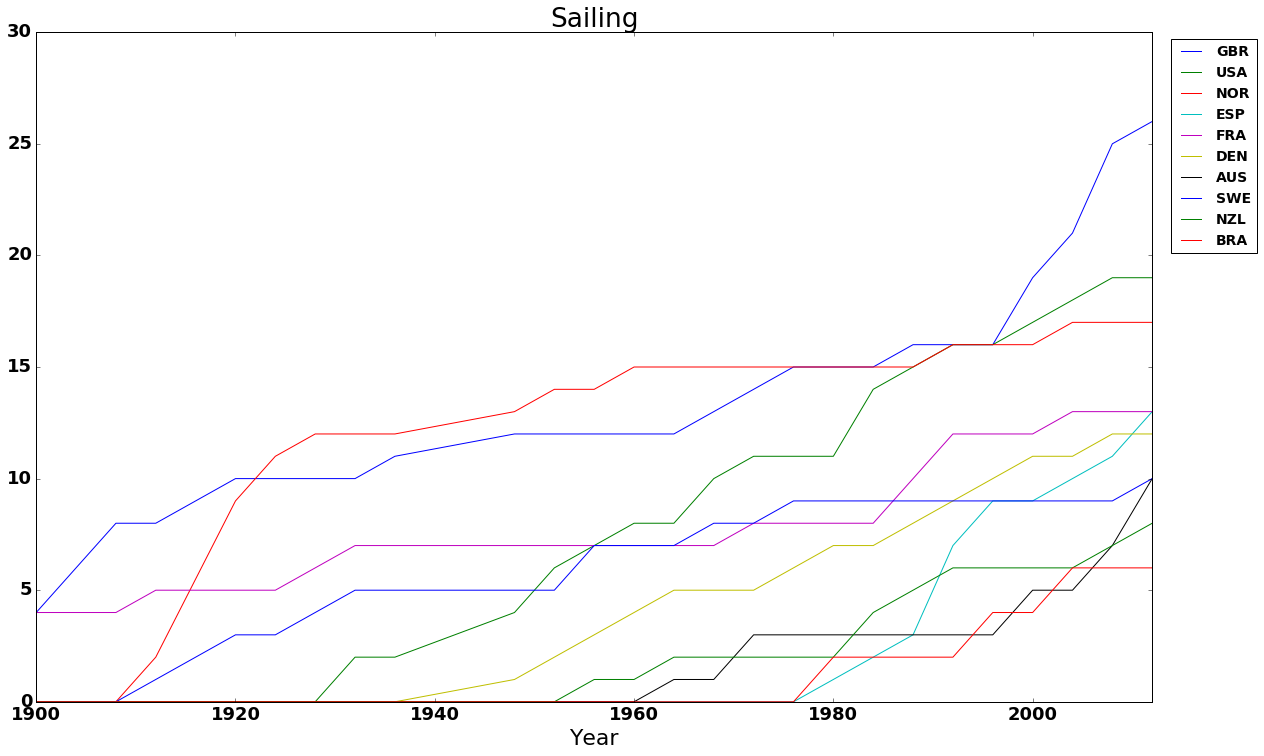

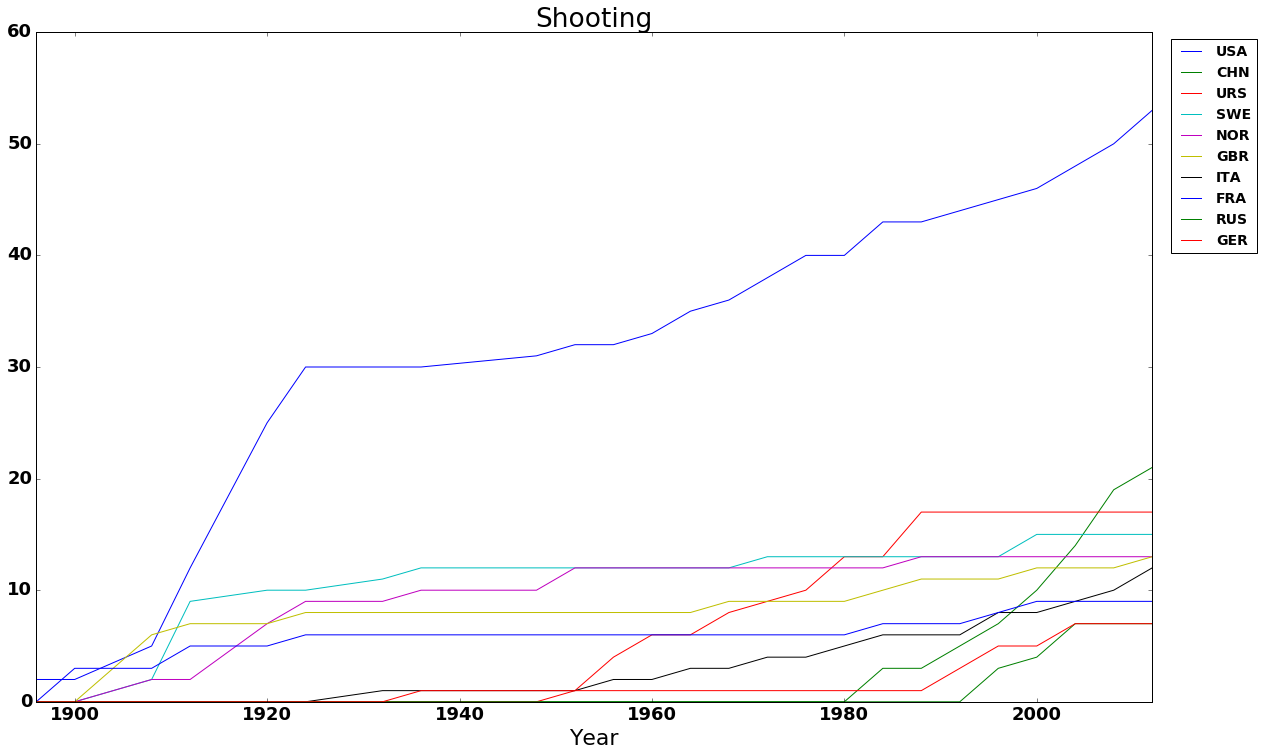

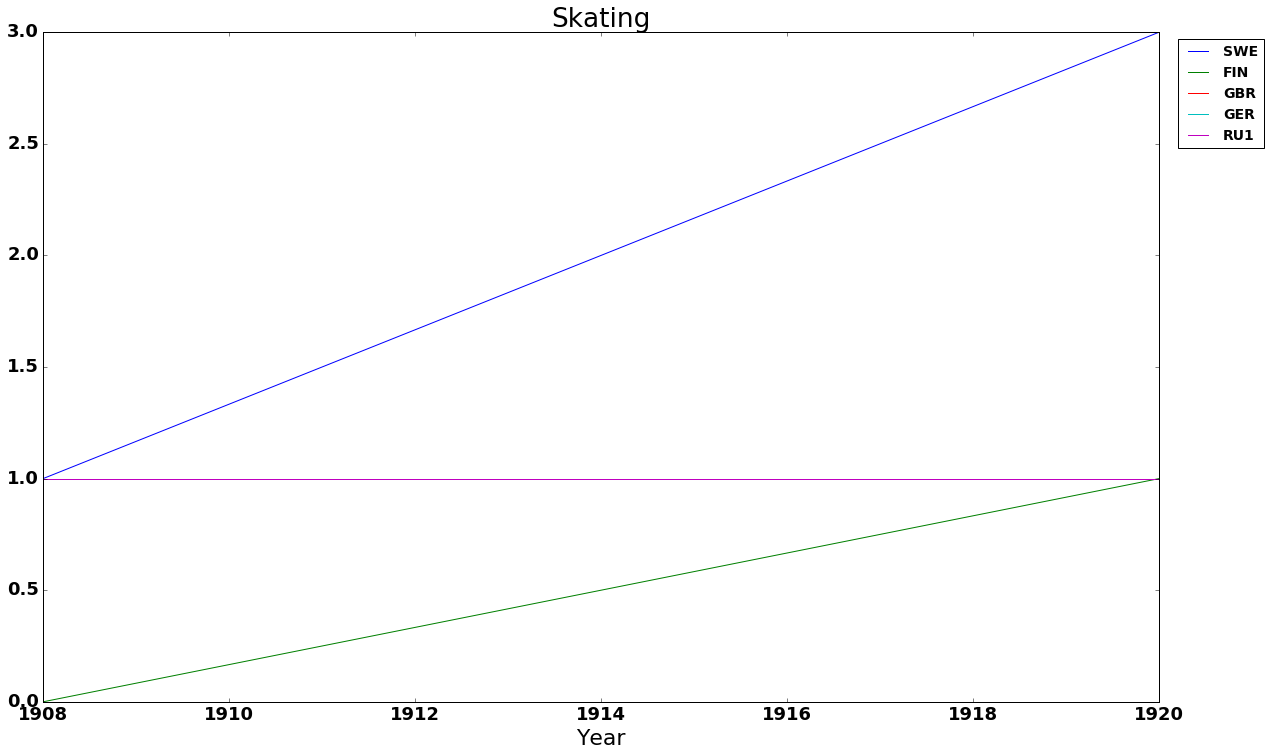

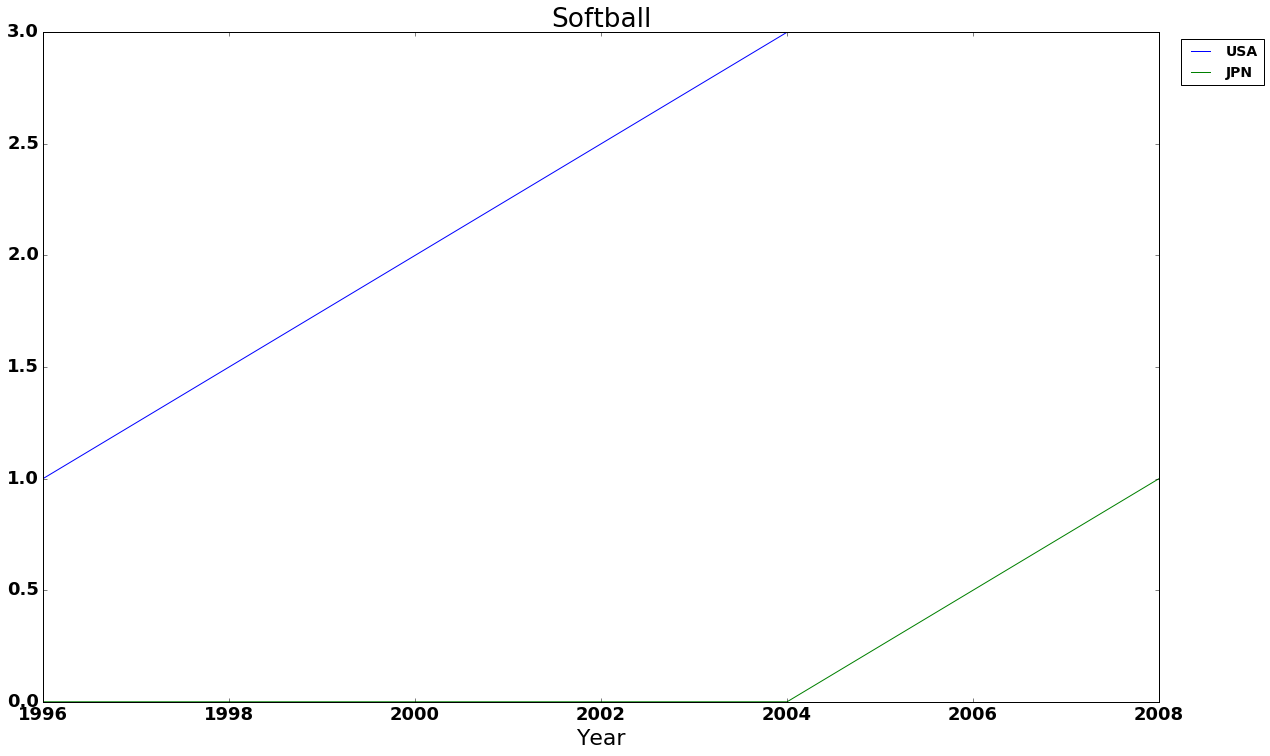

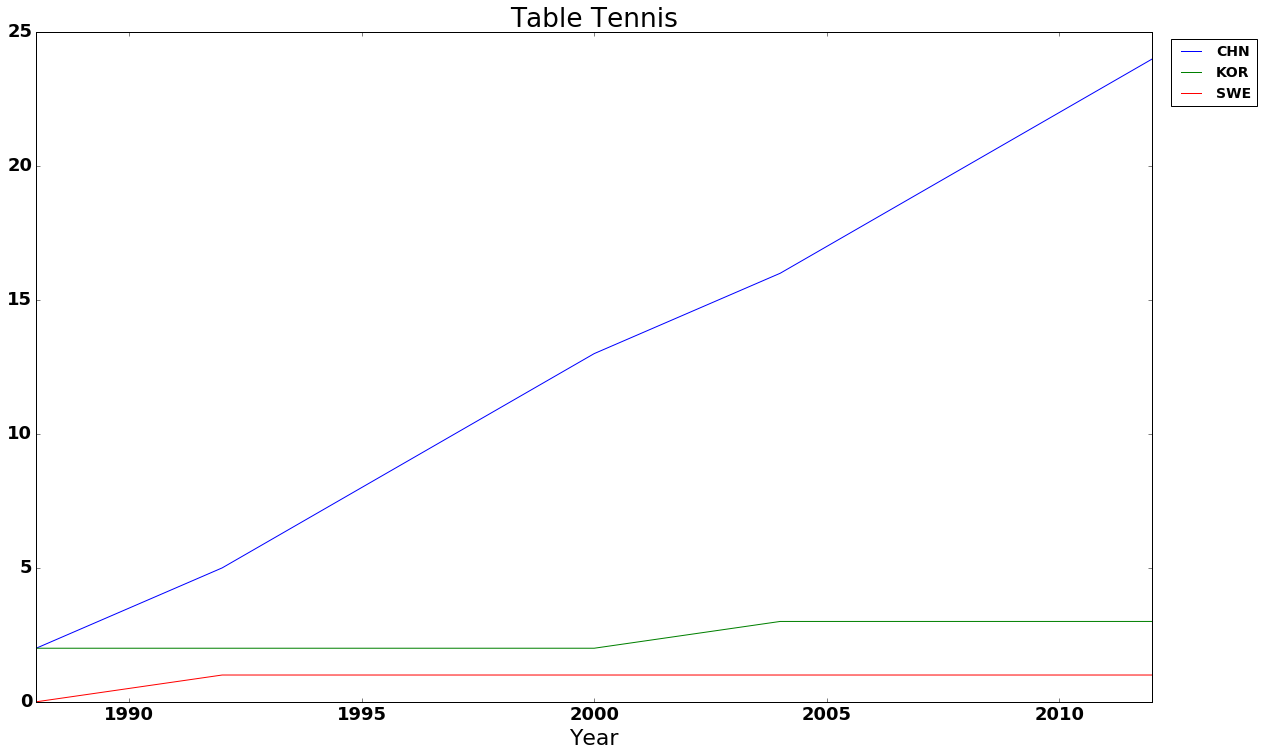

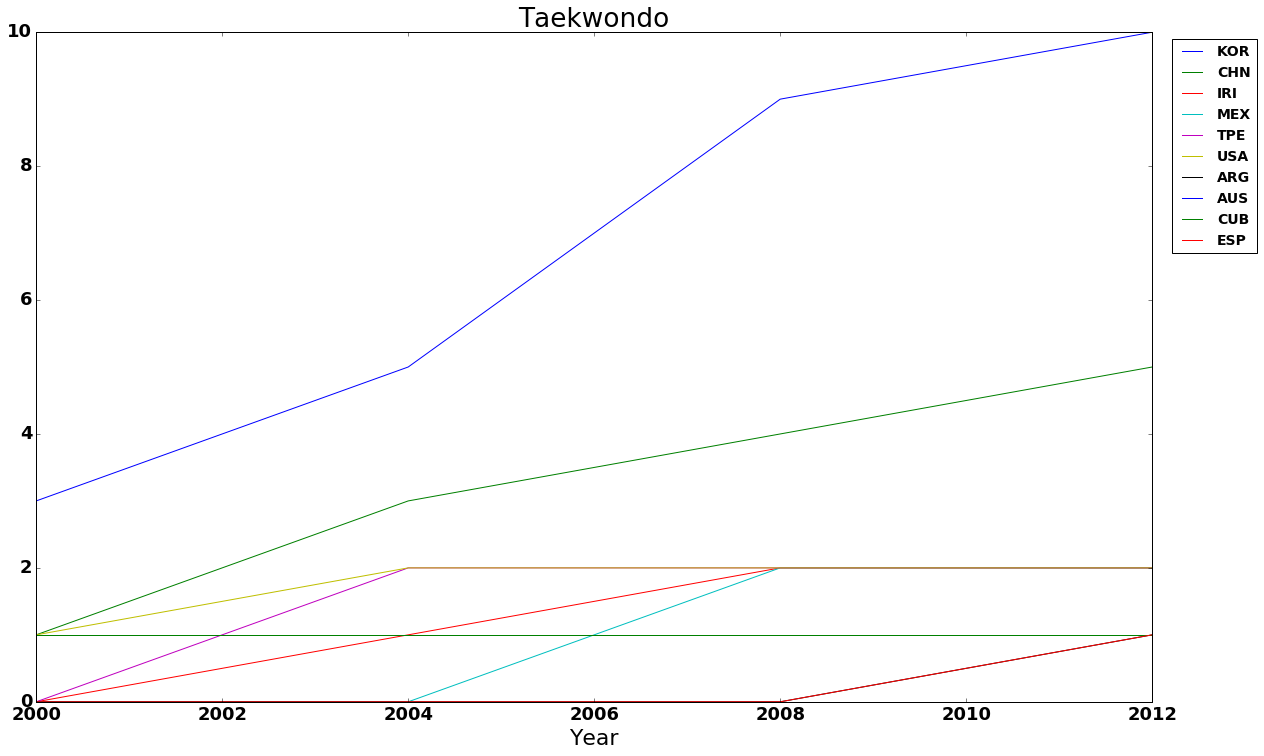

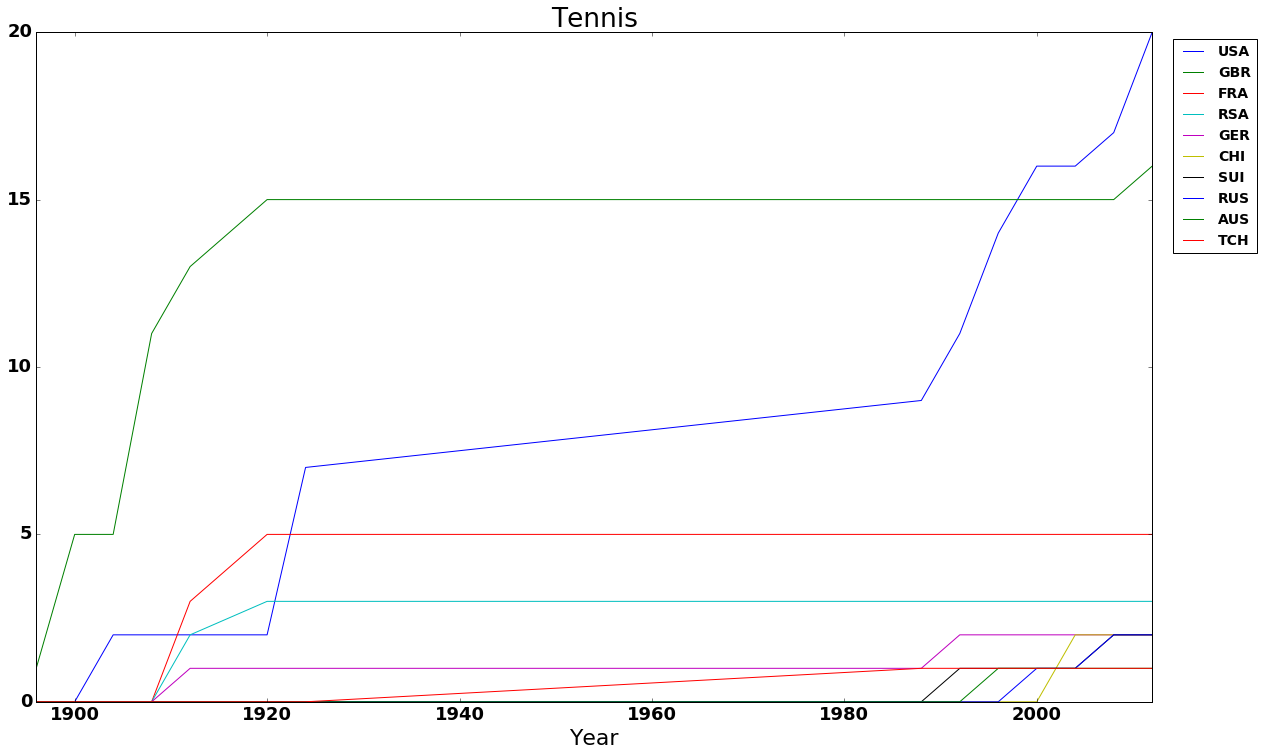

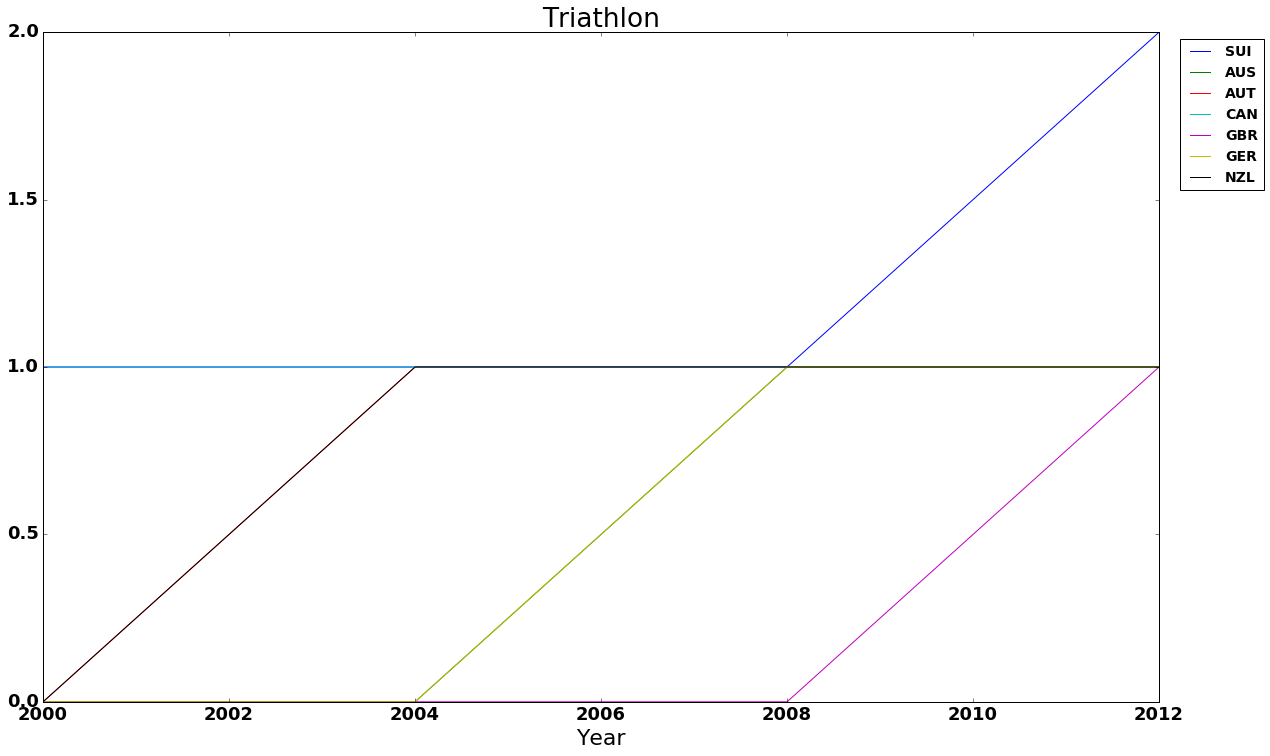

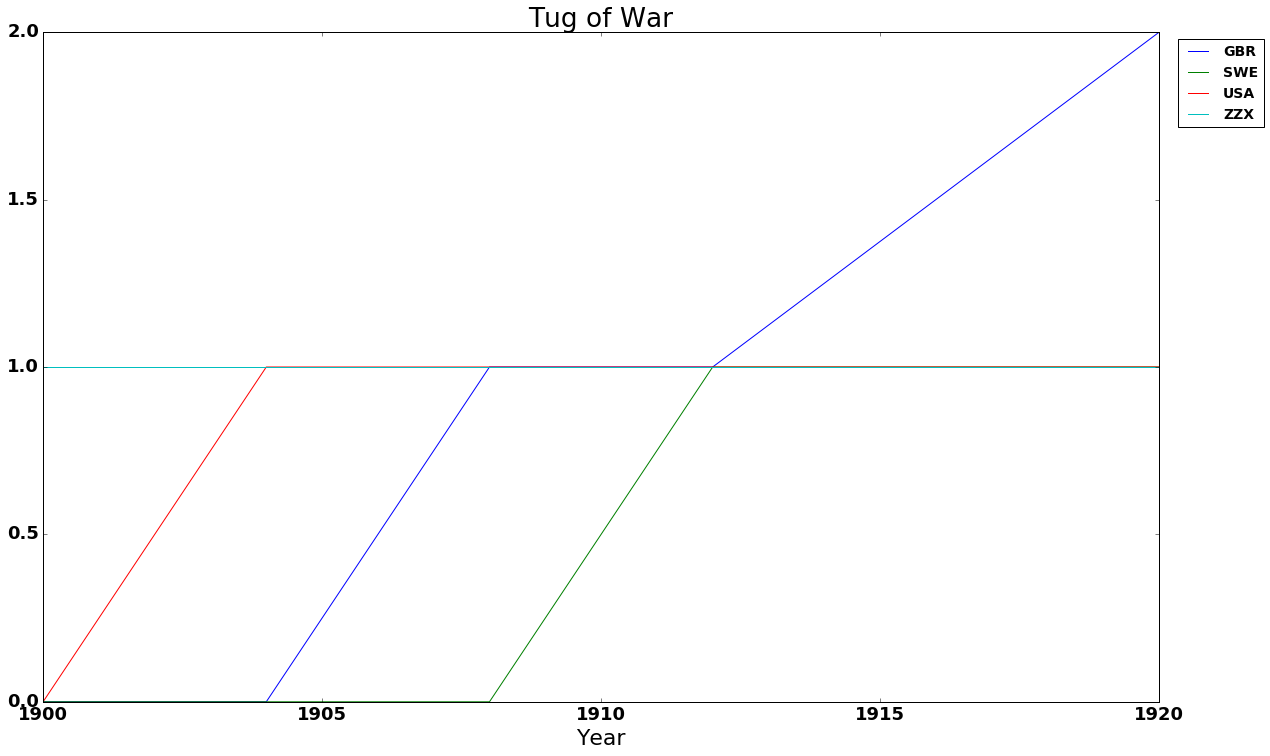

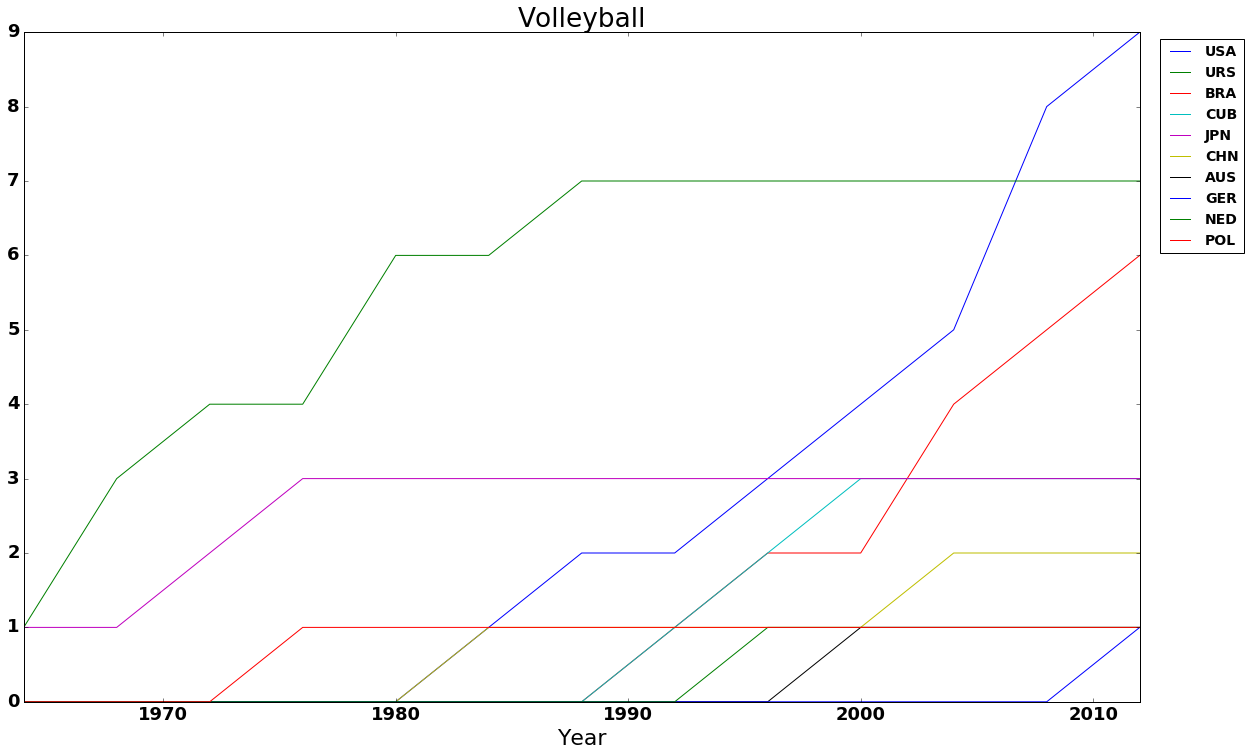

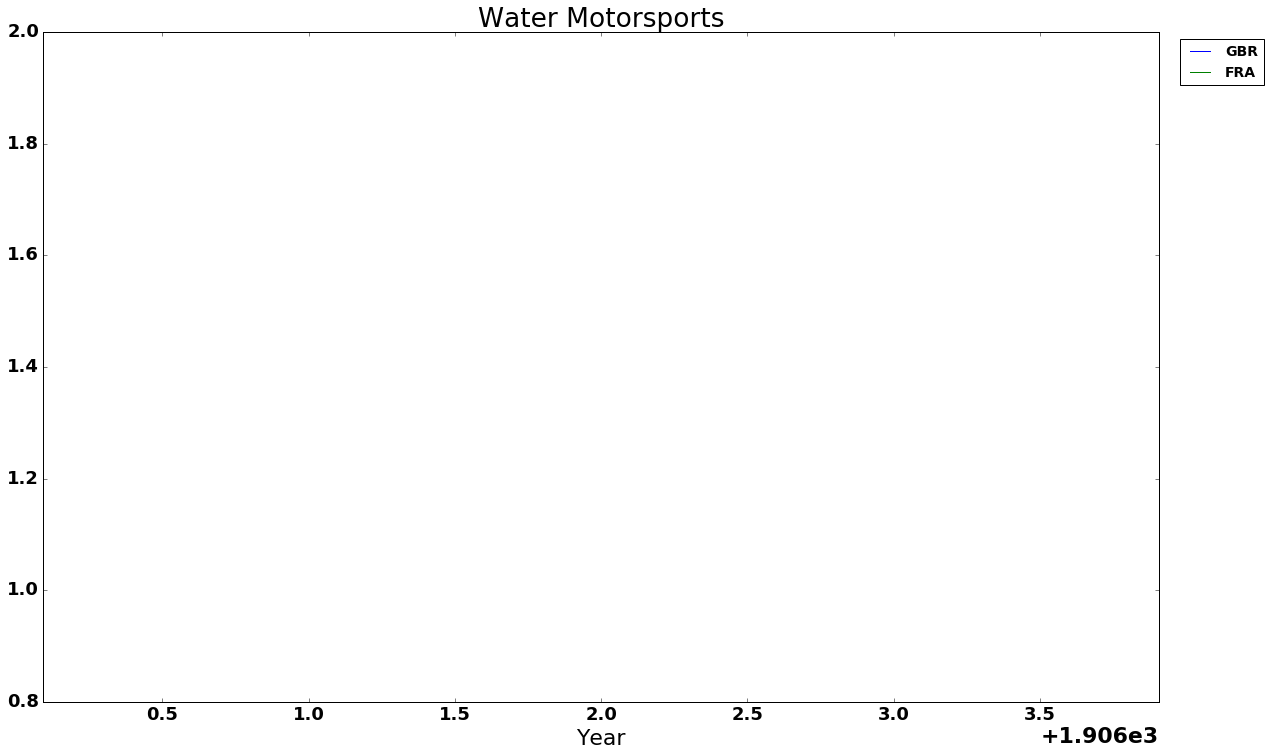

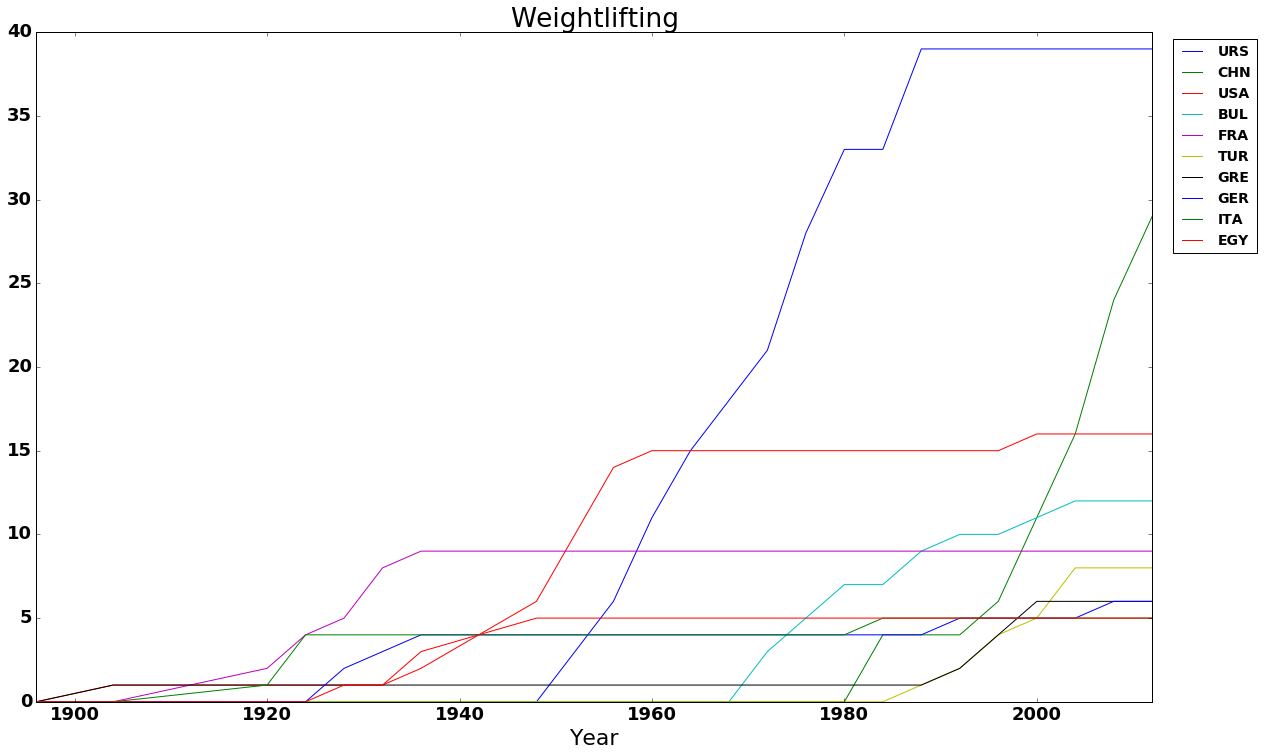

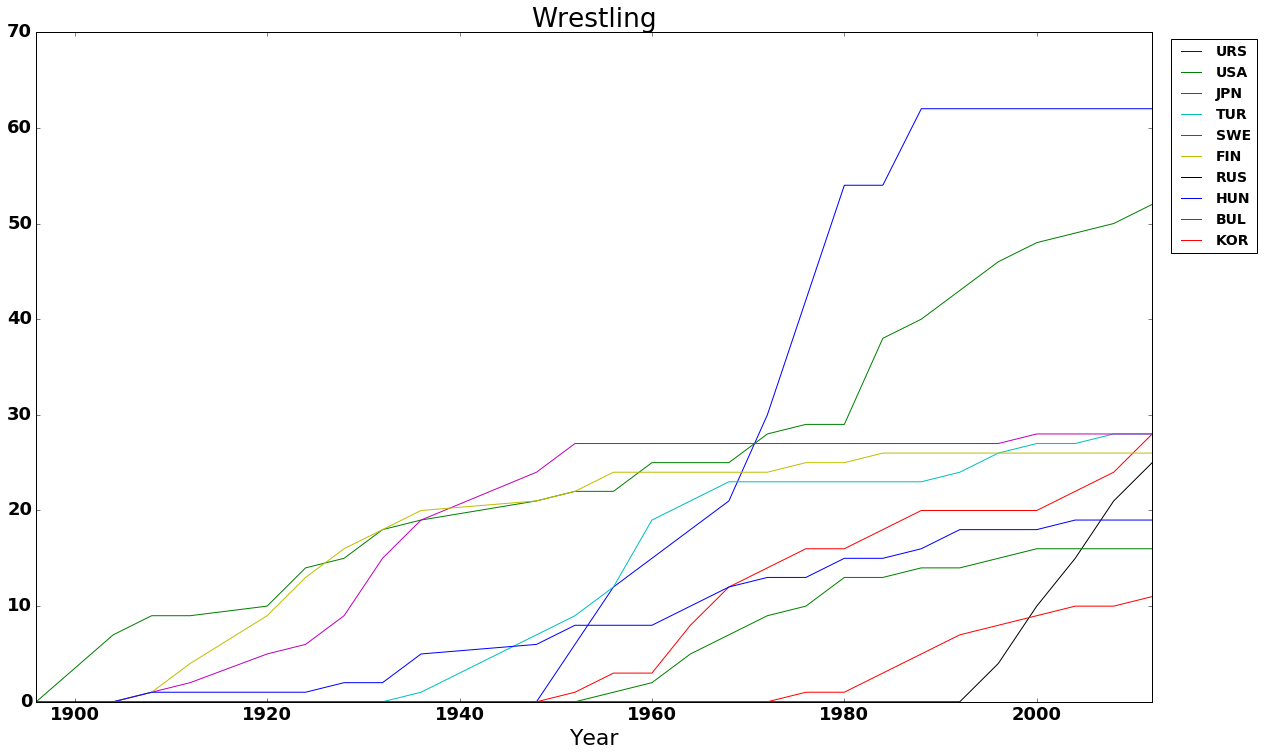

In [10]:
fig, axs = plt.subplots(1,sports_count)

sports = data.groupby(['Sport'])

for sport in sports:
    # sport_df = data[data['Sport'] == 'Weightlifting']
    sport_name = sport[0]
    sport_df = sport[1]

    # if sport_name != 'Weightlifting':
    #     continue

    # the medals in this list will be counted
    # normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
    # medal_to_include = ['Gold', 'Silver', 'Bronze']
    
    medal_to_include = ['Gold']
    medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]

    # build the pivot table
    table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
    table = table.fillna(0).reset_index()

    # remove the multi-level columns
    new_table = table['Medal']
    # set index for as it's country name
    new_table = new_table.set_index(table['NOC'])
    # print(new_table.columns)
    
    for i, year in enumerate(new_table.columns):
        # we add a col to the next column in each loop,
        # to make a cumulative chart
        if i == (len(new_table.columns) - 1):
            continue

        next_year = new_table.columns[i+1]
        if next_year == 'NOC':
            continue

        new_table[next_year] = new_table[year] + new_table[next_year]

    new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
    topten = new_table.iloc[0:10, :]

    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1> Recent Dominance Analysis </h1>
There are some sports recently dominated by certain country, for example table tennis, badminton is dominated by China. Judo is dominated by Japan.
Try to find out here whether there are other cases like this under this section.

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Aquatics passed
Archery passed
Badminton passed
Baseball passed
Basketball passed
Cycling passed
Equestrian passed
Fencing passed
Football passed
Gymnastics passed
Handball passed
Hockey passed
Judo passed
Modern Pentathlon passed
Softball passed
Table Tennis passed
Tennis passed
Triathlon passed
Volleyball passed
Weightlifting passed
20


/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


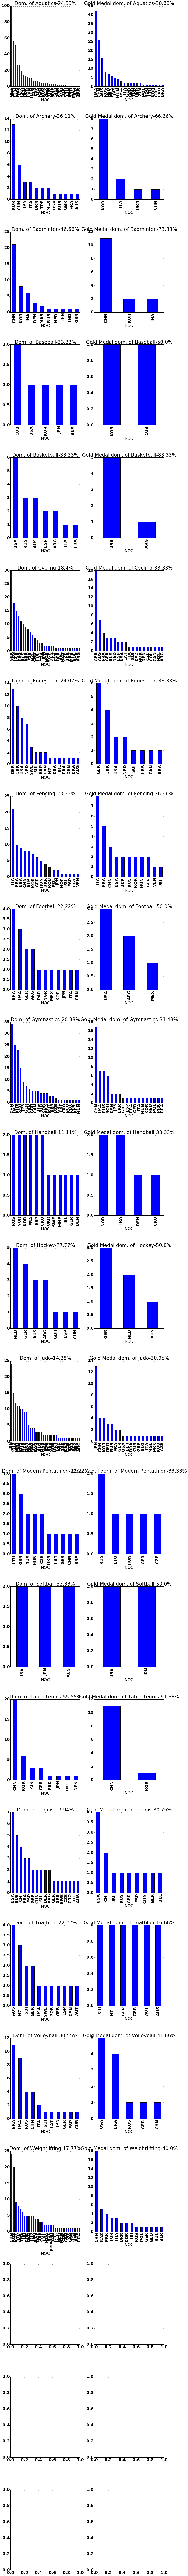

In [12]:
fig, axs = plt.subplots(23, 2, figsize=(15,250))

# print(axs)

fig.subplots_adjust(hspace = .4 )
recent_data = data[(data['Year'] >= 2004)]
plot_count = 0
pass_count = 0

for recent in recent_data.groupby('Sport'):

    recent_df = recent[1]
    dominance = recent_df.groupby(['NOC']).count()['Medal'].sort_values(ascending=False)
    
    dominance_g = recent_df[recent_df['Medal'] == 'Gold']    
    dominance_g = dominance_g.groupby(['NOC']).count()['Medal'].sort_values(ascending=False)
   
    
    # How many percent are occupied by the top country?
    # print(recent[0])
    # print(dominance[0]/sum(dominance))
    # print(dominance_g[0]/sum(dominance_g))
    # print('')
        
    if not ((dominance[0]/sum(dominance) >= 0.2) or (dominance_g[0]/sum(dominance_g) >= 0.3)):
        continue
    else:
        print(recent[0] + ' passed')
        pass_count = pass_count + 1
    
    # if the dominance is enough, we plot it.
    dominance.plot.bar( ax=axs[plot_count/2, 0], title='Dom. of ' + recent[0] + '-' + str( int(dominance[0]/sum(dominance)*10000)/100 ) + '%')

    dominance_g.plot.bar( ax=axs[plot_count/2, 1], title='Gold Medal dom. of ' + recent[0] + '-' + str( int(dominance_g[0]/sum(dominance_g)*10000)/100  )+ '%')
    
    # How many percent are occupied by the top country?
    plot_count = plot_count + 2


print(pass_count)


<h1> Simple Version of Sports Dominance Data</h1>
The blue bar charts were kind of too fancy, let's just make a simple table and show numeric data.
<font color='red'>ATTENTION: the data for this table is different from the blue bars, this one contains 2000-2012</font>

In [14]:
result_table = pd.DataFrame()

recent_data = data[data['Year'] >= 2000]
for recent in recent_data.groupby('Sport'):
    
    sport_name = recent[0]
    recent_df = recent[1]
    
    # take the top ten of total medals count
    dominance = recent_df.groupby(['NOC']).count().sort_values(['Medal'], ascending=False)
    dominance['dominance-all'] = np.around( list(dominance['Medal']/np.sum(dominance['Medal'])) , decimals=4)
    dominance = dominance[0:10]
    dominance['dominance-all'] = dominance['dominance-all']*100
    # print(dominance)
    
    # take the top ten of total gold medals count
    dominance_g = recent_df[recent_df['Medal'] == 'Gold']    
    dominance_g = dominance_g.groupby(['NOC']).count().sort_values(['Medal'], ascending=False)
    dominance_g['dominance-gold'] = dominance_g['Medal']/np.sum(dominance_g['Medal']) * 100
    dominance_g = dominance_g[0:10]
    dominance_g['dominance-gold'] = np.around(list(dominance_g['dominance-gold']), decimals=2)
    
    # Append four rows
    # 1. name of total medal counts NOC sorted by dominance
    # 2. dominance (in percentage)
    # 3. name of gold medal counts NOC sorted by gold dominance
    # 4. gold medal dominance (in percentage)
    
    result_table = result_table.append([ [sport_name] + list(dominance.index[0:10])])
    result_table = result_table.append([ [sport_name + ' - all medal dom.'] + list(dominance['dominance-all'])])
    result_table = result_table.append([ [sport_name] + list(dominance_g.index[0:10])])
    result_table = result_table.append([ [sport_name + ' - gold medal dom.'] + list(dominance_g['dominance-gold'])])

result_table.head()

0      1      2      3      4      5     6   \
0                          Aquatics    USA    AUS    CHN    RUS    JPN   NED   
0         Aquatics - all medal dom.  24.82  14.15  11.21   6.99   6.07  4.04   
0                          Aquatics    USA    CHN    AUS    NED    RUS   FRA   
0        Aquatics - gold medal dom.  31.49  17.13  12.15   6.63   6.63  3.31   
0                           Archery    KOR    CHN    ITA    JPN    UKR   USA   
0          Archery - all medal dom.   37.5   12.5   8.33   6.25   6.25  6.25   
0                           Archery    KOR    ITA    AUS    CHN    UKR   NaN   
0         Archery - gold medal dom.  68.75   12.5   6.25   6.25   6.25   NaN   
0                         Athletics    USA    RUS    KEN    JAM    ETH   GBR   
0        Athletics - all medal dom.  16.46  11.45   6.98   6.62   5.19  3.58   
0                         Athletics    USA    RUS    ETH    JAM    KEN   GBR   
0       Athletics - gold medal dom.   17.3  11.35   7.03   6.49   5.95  5.41   
0                         Badminton    CHN    KOR    INA    DEN    GBR   MAS   
0        Badminton - all medal dom.  48.33  16.67     15   6.67   3.33  3.33   
0                         Badminton    CHN    INA    KOR    NaN    NaN   NaN   
0       Badminton - gold medal dom.     75     15     10    NaN    NaN   NaN   
0                          Baseball    CUB    KOR    USA    AUS    JPN   NaN   
0         Baseball - all medal dom.  33.33  22.22  22.22  11.11  11.11   NaN   
0                          Baseball    CUB    KOR    USA    NaN    NaN   NaN   
0        Baseball - gold medal dom.  33.33  33.33  33.33    NaN    NaN   NaN   
0                        Basketball    USA    AUS    RUS    ARG    ESP   FRA   
0       Basketball - all medal dom.  33.33  16.67   12.5   8.33   8.33  8.33   
0                        Basketball    USA    ARG    NaN    NaN    NaN   NaN   
0      Basketball - gold medal dom.   87.5   12.5    NaN    NaN    NaN   NaN   
0                            Boxing    CUB    RUS    KAZ    UKR    GBR   USA   
0           Boxing - all medal dom.  13.83   11.7   6.91   6.38   5.32  4.79   
0                            Boxing    CUB    RUS    GBR    KAZ    CHN   THA   
0          Boxing - gold medal dom.   23.4  17.02  10.64  10.64   6.38  6.38   
0                             Canoe    GER    HUN    SVK    GBR    AUS   FRA   
0            Canoe - all medal dom.  17.19  11.98   6.77   6.25   5.73  5.21   
..                              ...    ...    ...    ...    ...    ...   ...   
0                          Softball    USA    JPN    NaN    NaN    NaN   NaN   
0        Softball - gold medal dom.  66.67  33.33    NaN    NaN    NaN   NaN   
0                      Table Tennis    CHN    KOR    GER    SIN    DEN   FRA   
0     Table Tennis - all medal dom.  58.33  14.58   6.25   6.25   2.08  2.08   
0                      Table Tennis    CHN    KOR    NaN    NaN    NaN   NaN   
0    Table Tennis - gold medal dom.  93.75   6.25    NaN    NaN    NaN   NaN   
0                         Taekwondo    KOR    USA    CHN    TPE    TUR   MEX   
0        Taekwondo - all medal dom.   12.5   7.14   7.14   7.14   5.36  5.36   
0                         Taekwondo    KOR    CHN    IRI    MEX    TPE   USA   
0       Taekwondo - gold medal dom.  31.25  15.62   6.25   6.25   6.25  6.25   
0                            Tennis    USA    RUS    CHI    FRA    ESP   CHN   
0           Tennis - all medal dom.  19.61  13.73   7.84   7.84   7.84  3.92   
0                            Tennis    USA    CHI    RUS    BEL    BLR   CAN   
0          Tennis - gold medal dom.  35.29  11.76  11.76   5.88   5.88  5.88   
0                         Triathlon    AUS    SUI    NZL    CAN    GBR   GER   
0        Triathlon - all medal dom.  20.83  16.67   12.5   8.33   8.33  8.33   
0                         Triathlon    SUI    AUS    AUT    CAN    GBR   GER   
0       Triathlon - gold medal dom.     25   12.5   12.5   12.5   12.5  12.5   
0                        Volleyba

In [15]:
result_table.to_csv('generated data/olympics-domination-new-data.csv', index=False)

In [6]:
data[data['Sport'] == 'Table Tennis'].sort_values(['Year'])

Discipline    Event Event gender   Medal  NOC         Sport  Year
5290   Table Tennis  singles            M    Gold  GBR  Table Tennis  1896
18349  Table Tennis  doubles            M    Gold  ZZX  Table Tennis  1896
18348  Table Tennis  doubles            M  Bronze  ZZX  Table Tennis  1896
7705   Table Tennis  singles            M  Bronze  HUN  Table Tennis  1896
7614   Table Tennis  singles            M  Silver  GRE  Table Tennis  1896
7613   Table Tennis  singles            M  Bronze  GRE  Table Tennis  1896
18350  Table Tennis  doubles            M  Silver  ZZX  Table Tennis  1896
4099   Table Tennis  doubles            M  Bronze  FRA  Table Tennis  1900
4391   Table Tennis  singles            W  Silver  FRA  Table Tennis  1900
16249  Table Tennis  singles            W  Bronze  USA  Table Tennis  1900
5296   Table Tennis  singles            M  Bronze  GBR  Table Tennis  1900
5297   Table Tennis  singles            M    Gold  GBR  Table Tennis  1900
5298   Table Tennis  singles            M  Silver  GBR  Table Tennis  1900
5299   Table Tennis  singles            W    Gold  GBR  Table Tennis  1900
1088   Table Tennis  singles            W  Bronze  BOH  Table Tennis  1900
18355  Table Tennis  doubles            M  Silver  ZZX  Table Tennis  1900
5379   Table Tennis  doubles            M  Bronze  GBR  Table Tennis  1900
5380   Table Tennis  doubles            M    Gold  GBR  Table Tennis  1900
16256  Table Tennis  singles            M  Silver  USA  Table Tennis  1904
16658  Table Tennis  doubles            M  Bronze  USA  Table Tennis  1904
16659  Table Tennis  doubles            M    Gold  USA  Table Tennis  1904
16660  Table Tennis  doubles            M  Silver  USA  Table Tennis  1904
16254  Table Tennis  singles            M  Bronze  USA  Table Tennis  1904
16809  Table Tennis     team            M    Gold  USA  Table Tennis  1904
16810  Table Tennis     team            M  Silver  USA  Table Tennis  1904
16255  Table Tennis  singles            M    Gold  USA  Table Tennis  1904
5388   Table Tennis  doubles            M  Silver  GBR  Table Tennis  1908
5387   Table Tennis  doubles            M    Gold  GBR  Table Tennis  1908
5386   Table Tennis  doubles            M  Bronze  GBR  Table Tennis  1908
5310   Table Tennis  singles            M    Gold  GBR  Table Tennis  1908
...             ...      ...          ...     ...  ...           ...   ...
12302  Table Tennis     team            W    Gold  RUS  Table Tennis  2008
2222   Table Tennis  singles            M  Bronze  CHN  Table Tennis  2008
2453   Table Tennis     team            M    Gold  CHN  Table Tennis  2008
16688  Table Tennis  doubles            W    Gold  USA  Table Tennis  2008
8226   Table Tennis  doubles            M    Gold  INA  Table Tennis  2008
10063  Table Tennis     team            M  Bronze  KOR  Table Tennis  2008
9915   Table Tennis  doubles            X    Gold  KOR  Table Tennis  2008
9914   Table Tennis  doubles            W  Silver  KOR  Table Tennis  2008
9913   Table Tennis  doubles            M  Bronze  KOR  Table Tennis  2008
10064  Table Tennis     team            W  Bronze  KOR  Table Tennis  2008
10157  Table Tennis  singles            M  Silver  MAS  Table Tennis  2008
13560  Table Tennis  doubles            M  Silver  SWE  Table Tennis  2008
10511  Table Tennis     team            X  Silver  NED  Table Tennis  2008
2995   Table Tennis     team            X  Bronze  DEN  Table Tennis  2008
3060   Table Tennis     team            W  Silver  ESP  Table Tennis  2008
2143   Table Tennis  doubles            M  Silver  CHN  Table Tennis  2008
3113   Table Tennis  doubles            W  Silver  ESP  Table Tennis  2008
1914   Table Tennis  singles            M  Silver  CHI  Table Tennis  2008
2144   Table Tennis  doubles            W  Bronze  CHN  Table Tennis  2008
2145   Table Tennis  doubles            W    Gold  CHN  Table Tennis  2008
2146   Table Tennis  doubles            X  Bronze  CHN  Table Tennis  2008
3145   Table Tennis  singles      

In [22]:
data[(data['Sport'] == 'Table Tennis') & (data['Medal'] == 'Gold') & (data['Year'] >= 2000)]

Year     City         Sport    Discipline  NOC    Event Event gender  \
11720  2000   Sydney  Table Tennis  Table Tennis  CHN  doubles            M   
11723  2000   Sydney  Table Tennis  Table Tennis  CHN  doubles            W   
11726  2000   Sydney  Table Tennis  Table Tennis  CHN  singles            M   
11729  2000   Sydney  Table Tennis  Table Tennis  CHN  singles            W   
12643  2004   Athens  Table Tennis  Table Tennis  CHN  doubles            M   
12646  2004   Athens  Table Tennis  Table Tennis  CHN  doubles            W   
12649  2004   Athens  Table Tennis  Table Tennis  KOR  singles            M   
12652  2004   Athens  Table Tennis  Table Tennis  CHN  singles            W   
13576  2008  Beijing  Table Tennis  Table Tennis  CHN  singles            M   
13579  2008  Beijing  Table Tennis  Table Tennis  CHN  singles            W   
13582  2008  Beijing  Table Tennis  Table Tennis  CHN     team            M   
13585  2008  Beijing  Table Tennis  Table Tennis  CHN     team            W   
14534  2012   London  Table Tennis  Table Tennis  CHN  singles            M   
14537  2012   London  Table Tennis  Table Tennis  CHN  singles            W   
14540  2012   London  Table Tennis  Table Tennis  CHN     team            M   
14543  2012   London  Table Tennis  Table Tennis  CHN     team            W   

      Medal  
11720  Gold  
11723  Gold  
11726  Gold  
11729  Gold  
12643  Gold  
12646  Gold  
12649  Gold  
12652  Gold  
13576  Gold  
13579  Gold  
13582  Gold  
13585  Gold  
14534  Gold  
14537  Gold  
14540  Gold  
14543  Gold

In [19]:
data.dtypes

Year             int64
City            object
Sport           object
Discipline      object
NOC             object
Event           object
Event gender    object
Medal           object
dtype: object

In [ ]:
<h1>Russia Atheltics Analysis</h1>
Trying to find out whether the result of Russia matches the time they start d

In [23]:
# plotting for Russian(RUS) and Soviet Union(URS)
rus_data = data[data['NOC'] == 'RUS']
urs_data = data[data['NOC'] == 'URS']

In [27]:
# what kind of sports the RUS has received medal in...
rus_data.head()
set(rus_data['Sport'])

{'Aquatics',
 'Archery',
 'Athletics',
 'Badminton',
 'Basketball',
 'Boxing',
 'Canoe',
 'Cycling',
 'Fencing',
 'Gymnastics',
 'Handball',
 'Judo',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Taekwondo',
 'Tennis',
 'Volleyball',
 'Weightlifting',
 'Wrestling'}

In [28]:
urs_data.head()
set(urs_data['Sport'])

{'Aquatics',
 'Archery',
 'Athletics',
 'Basketball',
 'Boxing',
 'Canoe',
 'Cycling',
 'Equestrian',
 'Fencing',
 'Football',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rowing',
 'Sailing',
 'Shooting',
 'Volleyball',
 'Weightlifting',
 'Wrestling'}

In [29]:
rus_athletics = rus_data[rus_data['Sport'] == 'Athletics']
rus_athletics.head()

Year     City      Sport Discipline  NOC        Event Event gender  \
10241  1996  Atlanta  Athletics  Athletics  RUS  10000m walk            W   
10259  1996  Atlanta  Athletics  Athletics  RUS        1500m            W   
10269  1996  Atlanta  Athletics  Athletics  RUS    20km walk            M   
10305  1996  Atlanta  Athletics  Athletics  RUS    50km walk            M   
10310  1996  Atlanta  Athletics  Athletics  RUS         800m            W   

        Medal  
10241    Gold  
10259    Gold  
10269  Silver  
10305  Silver  
10310    Gold

In [31]:
urs_athletics = urs_data[urs_data['Sport'] == 'Athletics']
urs_athletics.head()

Year      City      Sport Discipline  NOC            Event Event gender  \
3650  1952  Helsinki  Athletics  Athletics  URS           10000m            M   
3653  1952  Helsinki  Athletics  Athletics  URS      10000m walk            M   
3671  1952  Helsinki  Athletics  Athletics  URS             200m            W   
3676  1952  Helsinki  Athletics  Athletics  URS  3000m steeplech            M   
3682  1952  Helsinki  Athletics  Athletics  URS     400m hurdles            M   

       Medal  
3650  Bronze  
3653  Bronze  
3671  Bronze  
3676  Silver  
3682  Silver

In [32]:
rus_data.describe()
# rus start from 1996 - 2012

Year
count   393.000000
mean   2004.142494
std       5.441718
min    1996.000000
25%    2000.000000
50%    2004.000000
75%    2008.000000
max    2012.000000

In [33]:
urs_data.describe()
# the urs started from 1952 - 1988

Year
count  1010.000000
mean   1970.827723
std      11.032164
min    1952.000000
25%    1960.000000
50%    1972.000000
75%    1980.000000
max    1988.000000

In [43]:
# URS medals count
urs_athletics.drop(['City', 'Event gender', 'Discipline', 'Sport', 'NOC'], 1).pivot_table(index=['Medal'], columns=['Year'], aggfunc='count')

Event                                        
Year    1952 1956 1960 1964 1968 1972 1976 1980 1988
Medal                                               
Bronze     7   10    5   11    8    1   10   12   10
Gold       2    5   11    5    3    9    4   15   10
Silver     8    7    5    2    2    7    4   14    6

In [44]:
# RUS medals count
rus_athletics.drop(['City', 'Event gender', 'Discipline', 'Sport', 'NOC'], 1).pivot_table(index=['Medal'], columns=['Year'], aggfunc='count')

Event                    
Year    1996 2000 2004 2008 2012
Medal                           
Bronze     1    6    6    7    5
Gold       3    3    6    6    6
Silver     6    4    7    5    3

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


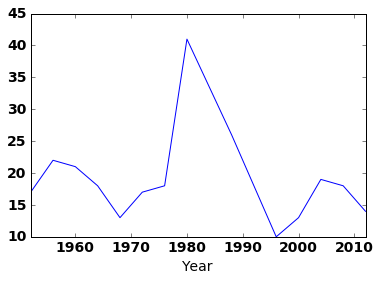

In [49]:
# I am not sure whether putting them as the same country make sense here
# but, I'm doing it. LOL

# setting the font size for plot
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

urs_rus_athletics = urs_athletics.drop(['NOC'], 1).append(rus_athletics.drop(['NOC'], 1))
urs_rus_athletics.groupby(['Year']).count()['Medal'].plot()


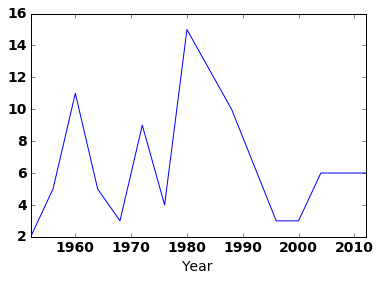

In [53]:
urs_rus_athletics[urs_rus_athletics['Medal'] == 'Gold'].groupby(['Year']).count()['Medal'].plot(title='Gold medal trends in Atheletics Events for Russia and Soviet Union')

In [54]:
data[data['NOC'] == 'SOV']

Empty DataFrame
Columns: [Year, City, Sport, Discipline, NOC, Event, Event gender, Medal]
Index: []

In [56]:
# They also have name RU1 which stands for the Russian Empire...
# but they didn't win any thing in athletics...
# check out the name lists here
# https://en.wikipedia.org/wiki/List_of_IOC_country_codes
data[data['NOC'] == 'RU1']

Year       City      Sport             Discipline  NOC            Event  \
949   1908     London    Skating         Figure skating  RU1  special figures   
992   1908     London  Wrestling  Wrestling Greco-Roman  RU1         - 66.6kg   
995   1908     London  Wrestling  Wrestling Greco-Roman  RU1           + 93kg   
1203  1912  Stockholm     Rowing                 Rowing  RU1    single sculls   
1206  1912  Stockholm    Sailing                Sailing  RU1              10m   
1241  1912  Stockholm   Shooting               Shooting  RU1  30m army pistol   
1269  1912  Stockholm   Shooting               Shooting  RU1       trap (125)   
1309  1912  Stockholm  Wrestling  Wrestling Greco-Roman  RU1      67.5 - 75kg   

     Event gender   Medal  
949             M    Gold  
992             M  Silver  
995             M  Silver  
1203            M  Bronze  
1206            X  Bronze  
1241            M  Silver  
1269            M  Bronze  
1309            M  Silver

In [59]:
# Export the data for these two in the folder 'generated data'.
rus_athletics.to_csv('generated data/rus_athletics.csv', index=False)
urs_athletics.to_csv('generated data/urs_athletics.csv', index=False)